In [ ]:
import pickle
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
def hex_to_normalized_int(hex_str):
    return int(hex_str, 16) / 255.0

def process_line(line):
    # Extracting hexadecimal values; this may need adjustment based on the exact file structure
    hex_values = line.split('|')[2:]  # Split and ignore the initial part of the line
    hex_values = [value.strip() for value in hex_values if value.strip()]  # Remove empty strings and strip spaces
    return [hex_to_normalized_int(value) for value in hex_values]

def read_starting_from_line_and_every_nth_line(file_path, start_line, step):
    lines = []
    with open(file_path, 'r') as file:
        for index, line in enumerate(file):
            if index < 1000000 and index >= start_line - 1 and (index - start_line + 1) % step == 0:
                print(index)
                processed_line = process_line(line)
                lines.append(processed_line)
    return lines

load = False
if not load:
    file_path = 'default_cap_1.txt'  # Replace 'your_file.txt' with the path to your text file
    start_line = 3
    step = 4
    result = read_starting_from_line_and_every_nth_line(file_path, start_line, step)

    with open("cap_1_array.pkl", "wb") as f:
        pickle.dump(result, f)
else:
    with open("cap_1_array.pkl", "rb") as f:
        result = pickle.load(f)


max_length = max(len(item) for item in result)

load = False
if not load:
    # Initialize an empty list to hold the padded data
    padded_data = []

    # Pad each array and print the progress
    for index, item in enumerate(result):
        padded_item = item + [0] * (max_length - len(item))
        padded_data.append(padded_item)
        
        # Print the progress
        progress = (index + 1) / len(result) * 100
        print(f"Progress: {progress:.2f}%")

    # Convert the list to a NumPy array for consistency in data structure
    # padded_data = np.array(padded_data)
    # test
    # Show the results
    print("First 5 elements of the padded first item:", padded_data[0])
  
    print("Max length:", max_length)
    
    with open("cap_1_array_padded.pkl", "wb") as f:
        pickle.dump(padded_data, f)
else:
    with open("cap_1_array_padded.pkl", "rb") as f:
        padded_data = pickle.load(f)


padded_data_numpy = np.array(padded_data)
train_data, val_data = train_test_split(padded_data_numpy, test_size=0.2)
input_dim = max_length  # max_length from your padded data
print("STARTING TRAINNING")
# Define the model


# Assume input_dim is defined as the length of your padded data
input_dim = max_length  # max_length from your padded data

# Define encoder layers
input_layer = Input(shape=(input_dim,))
encoder = Dense(128, activation='relu')(input_layer)
encoder = Dense(64, activation='relu')(encoder)
encoder = Dense(32, activation='relu')(encoder)  # Encoded representation

# Define decoder layers (mirror the encoder)
decoder = Dense(64, activation='relu')(encoder)
decoder = Dense(128, activation='relu')(decoder)
decoder_output = Dense(input_dim, activation='sigmoid')(decoder)  # Reconstruction of input

# Create autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoder_output)
autoencoder.compile(optimizer='adam', loss='mse')

# Summary of the autoencoder architecture
autoencoder.summary()

history = autoencoder.fit(train_data, train_data,
                            epochs=100,
                            batch_size=256,
                            shuffle=True,
                            validation_data=(val_data, val_data)
                            )
import numpy as np
import random

def modify_data(data_point):
    modified_data = data_point.copy()
    for i in range(len(modified_data) // 5):
        nbr1 = random.randint(1, 1000) / 1000.0
        nbr2 = random.randint(0, len(modified_data) - 1)
        modified_data[nbr2] = nbr1
    return modified_data

# Select 100 random indices from the training data
random_indices = np.random.randint(20, len(train_data), size=200)

evaluation_results = []

for idx in random_indices:
    original_data = train_data[idx]
    modified_data = modify_data(original_data)
    modified_data_reshaped = np.array([modified_data])
    evaluation = autoencoder.evaluate(modified_data_reshaped, modified_data_reshaped, verbose=0)
    evaluation_results.append(evaluation)

mean_random_error = np.mean(evaluation_results)
print(f"Mean random error over 100 evaluations: {mean_random_error}")

2
6
10
14
18
22
26
30
34
38
42
46
50
54
58
62
66
70
74
78
82
86
90
94
98
102
106
110
114
118
122
126
130
134
138
142
146
150
154
158
162
166
170
174
178
182
186
190
194
198
202
206
210
214
218
222
226
230
234
238
242
246
250
254
258
262
266
270
274
278
282
286
290
294
298
302
306
310
314
318
322
326
330
334
338
342
346
350
354
358
362
366
370
374
378
382
386
390
394
398
402
406
410
414
418
422
426
430
434
438
442
446
450
454
458
462
466
470
474
478
482
486
490
494
498
502
506
510
514
518
522
526
530
534
538
542
546
550
554
558
562
566
570
574
578
582
586
590
594
598
602
606
610
614
618
622
626
630
634
638
642
646
650
654
658
662
666
670
674
678
682
686
690
694
698
702
706
710
714
718
722
726
730
734
738
742
746
750
754
758
762
766
770
774
778
782
786
790
794
798
802
806
810
814
818
822
826
830
834
838
842
846
850
854
858
862
866
870
874
878
882
886
890
894
898
902
906
910
914
918
922
926
930
934
938
942
946
950
954
958
962
966
970
974
978
982
986
990
994
998
1002
1006
1010
1014
1018
10

10210
10214
10218
10222
10226
10230
10234
10238
10242
10246
10250
10254
10258
10262
10266
10270
10274
10278
10282
10286
10290
10294
10298
10302
10306
10310
10314
10318
10322
10326
10330
10334
10338
10342
10346
10350
10354
10358
10362
10366
10370
10374
10378
10382
10386
10390
10394
10398
10402
10406
10410
10414
10418
10422
10426
10430
10434
10438
10442
10446
10450
10454
10458
10462
10466
10470
10474
10478
10482
10486
10490
10494
10498
10502
10506
10510
10514
10518
10522
10526
10530
10534
10538
10542
10546
10550
10554
10558
10562
10566
10570
10574
10578
10582
10586
10590
10594
10598
10602
10606
10610
10614
10618
10622
10626
10630
10634
10638
10642
10646
10650
10654
10658
10662
10666
10670
10674
10678
10682
10686
10690
10694
10698
10702
10706
10710
10714
10718
10722
10726
10730
10734
10738
10742
10746
10750
10754
10758
10762
10766
10770
10774
10778
10782
10786
10790
10794
10798
10802
10806
10810
10814
10818
10822
10826
10830
10834
10838
10842
10846
10850
10854
10858
10862
10866
10870
1087

21110
21114
21118
21122
21126
21130
21134
21138
21142
21146
21150
21154
21158
21162
21166
21170
21174
21178
21182
21186
21190
21194
21198
21202
21206
21210
21214
21218
21222
21226
21230
21234
21238
21242
21246
21250
21254
21258
21262
21266
21270
21274
21278
21282
21286
21290
21294
21298
21302
21306
21310
21314
21318
21322
21326
21330
21334
21338
21342
21346
21350
21354
21358
21362
21366
21370
21374
21378
21382
21386
21390
21394
21398
21402
21406
21410
21414
21418
21422
21426
21430
21434
21438
21442
21446
21450
21454
21458
21462
21466
21470
21474
21478
21482
21486
21490
21494
21498
21502
21506
21510
21514
21518
21522
21526
21530
21534
21538
21542
21546
21550
21554
21558
21562
21566
21570
21574
21578
21582
21586
21590
21594
21598
21602
21606
21610
21614
21618
21622
21626
21630
21634
21638
21642
21646
21650
21654
21658
21662
21666
21670
21674
21678
21682
21686
21690
21694
21698
21702
21706
21710
21714
21718
21722
21726
21730
21734
21738
21742
21746
21750
21754
21758
21762
21766
21770
2177

26942
26946
26950
26954
26958
26962
26966
26970
26974
26978
26982
26986
26990
26994
26998
27002
27006
27010
27014
27018
27022
27026
27030
27034
27038
27042
27046
27050
27054
27058
27062
27066
27070
27074
27078
27082
27086
27090
27094
27098
27102
27106
27110
27114
27118
27122
27126
27130
27134
27138
27142
27146
27150
27154
27158
27162
27166
27170
27174
27178
27182
27186
27190
27194
27198
27202
27206
27210
27214
27218
27222
27226
27230
27234
27238
27242
27246
27250
27254
27258
27262
27266
27270
27274
27278
27282
27286
27290
27294
27298
27302
27306
27310
27314
27318
27322
27326
27330
27334
27338
27342
27346
27350
27354
27358
27362
27366
27370
27374
27378
27382
27386
27390
27394
27398
27402
27406
27410
27414
27418
27422
27426
27430
27434
27438
27442
27446
27450
27454
27458
27462
27466
27470
27474
27478
27482
27486
27490
27494
27498
27502
27506
27510
27514
27518
27522
27526
27530
27534
27538
27542
27546
27550
27554
27558
27562
27566
27570
27574
27578
27582
27586
27590
27594
27598
27602
2760

37450
37454
37458
37462
37466
37470
37474
37478
37482
37486
37490
37494
37498
37502
37506
37510
37514
37518
37522
37526
37530
37534
37538
37542
37546
37550
37554
37558
37562
37566
37570
37574
37578
37582
37586
37590
37594
37598
37602
37606
37610
37614
37618
37622
37626
37630
37634
37638
37642
37646
37650
37654
37658
37662
37666
37670
37674
37678
37682
37686
37690
37694
37698
37702
37706
37710
37714
37718
37722
37726
37730
37734
37738
37742
37746
37750
37754
37758
37762
37766
37770
37774
37778
37782
37786
37790
37794
37798
37802
37806
37810
37814
37818
37822
37826
37830
37834
37838
37842
37846
37850
37854
37858
37862
37866
37870
37874
37878
37882
37886
37890
37894
37898
37902
37906
37910
37914
37918
37922
37926
37930
37934
37938
37942
37946
37950
37954
37958
37962
37966
37970
37974
37978
37982
37986
37990
37994
37998
38002
38006
38010
38014
38018
38022
38026
38030
38034
38038
38042
38046
38050
38054
38058
38062
38066
38070
38074
38078
38082
38086
38090
38094
38098
38102
38106
38110
3811

48362
48366
48370
48374
48378
48382
48386
48390
48394
48398
48402
48406
48410
48414
48418
48422
48426
48430
48434
48438
48442
48446
48450
48454
48458
48462
48466
48470
48474
48478
48482
48486
48490
48494
48498
48502
48506
48510
48514
48518
48522
48526
48530
48534
48538
48542
48546
48550
48554
48558
48562
48566
48570
48574
48578
48582
48586
48590
48594
48598
48602
48606
48610
48614
48618
48622
48626
48630
48634
48638
48642
48646
48650
48654
48658
48662
48666
48670
48674
48678
48682
48686
48690
48694
48698
48702
48706
48710
48714
48718
48722
48726
48730
48734
48738
48742
48746
48750
48754
48758
48762
48766
48770
48774
48778
48782
48786
48790
48794
48798
48802
48806
48810
48814
48818
48822
48826
48830
48834
48838
48842
48846
48850
48854
48858
48862
48866
48870
48874
48878
48882
48886
48890
48894
48898
48902
48906
48910
48914
48918
48922
48926
48930
48934
48938
48942
48946
48950
48954
48958
48962
48966
48970
48974
48978
48982
48986
48990
48994
48998
49002
49006
49010
49014
49018
49022
4902

58494
58498
58502
58506
58510
58514
58518
58522
58526
58530
58534
58538
58542
58546
58550
58554
58558
58562
58566
58570
58574
58578
58582
58586
58590
58594
58598
58602
58606
58610
58614
58618
58622
58626
58630
58634
58638
58642
58646
58650
58654
58658
58662
58666
58670
58674
58678
58682
58686
58690
58694
58698
58702
58706
58710
58714
58718
58722
58726
58730
58734
58738
58742
58746
58750
58754
58758
58762
58766
58770
58774
58778
58782
58786
58790
58794
58798
58802
58806
58810
58814
58818
58822
58826
58830
58834
58838
58842
58846
58850
58854
58858
58862
58866
58870
58874
58878
58882
58886
58890
58894
58898
58902
58906
58910
58914
58918
58922
58926
58930
58934
58938
58942
58946
58950
58954
58958
58962
58966
58970
58974
58978
58982
58986
58990
58994
58998
59002
59006
59010
59014
59018
59022
59026
59030
59034
59038
59042
59046
59050
59054
59058
59062
59066
59070
59074
59078
59082
59086
59090
59094
59098
59102
59106
59110
59114
59118
59122
59126
59130
59134
59138
59142
59146
59150
59154
5915

64194
64198
64202
64206
64210
64214
64218
64222
64226
64230
64234
64238
64242
64246
64250
64254
64258
64262
64266
64270
64274
64278
64282
64286
64290
64294
64298
64302
64306
64310
64314
64318
64322
64326
64330
64334
64338
64342
64346
64350
64354
64358
64362
64366
64370
64374
64378
64382
64386
64390
64394
64398
64402
64406
64410
64414
64418
64422
64426
64430
64434
64438
64442
64446
64450
64454
64458
64462
64466
64470
64474
64478
64482
64486
64490
64494
64498
64502
64506
64510
64514
64518
64522
64526
64530
64534
64538
64542
64546
64550
64554
64558
64562
64566
64570
64574
64578
64582
64586
64590
64594
64598
64602
64606
64610
64614
64618
64622
64626
64630
64634
64638
64642
64646
64650
64654
64658
64662
64666
64670
64674
64678
64682
64686
64690
64694
64698
64702
64706
64710
64714
64718
64722
64726
64730
64734
64738
64742
64746
64750
64754
64758
64762
64766
64770
64774
64778
64782
64786
64790
64794
64798
64802
64806
64810
64814
64818
64822
64826
64830
64834
64838
64842
64846
64850
64854
6485

69854
69858
69862
69866
69870
69874
69878
69882
69886
69890
69894
69898
69902
69906
69910
69914
69918
69922
69926
69930
69934
69938
69942
69946
69950
69954
69958
69962
69966
69970
69974
69978
69982
69986
69990
69994
69998
70002
70006
70010
70014
70018
70022
70026
70030
70034
70038
70042
70046
70050
70054
70058
70062
70066
70070
70074
70078
70082
70086
70090
70094
70098
70102
70106
70110
70114
70118
70122
70126
70130
70134
70138
70142
70146
70150
70154
70158
70162
70166
70170
70174
70178
70182
70186
70190
70194
70198
70202
70206
70210
70214
70218
70222
70226
70230
70234
70238
70242
70246
70250
70254
70258
70262
70266
70270
70274
70278
70282
70286
70290
70294
70298
70302
70306
70310
70314
70318
70322
70326
70330
70334
70338
70342
70346
70350
70354
70358
70362
70366
70370
70374
70378
70382
70386
70390
70394
70398
70402
70406
70410
70414
70418
70422
70426
70430
70434
70438
70442
70446
70450
70454
70458
70462
70466
70470
70474
70478
70482
70486
70490
70494
70498
70502
70506
70510
70514
7051

75874
75878
75882
75886
75890
75894
75898
75902
75906
75910
75914
75918
75922
75926
75930
75934
75938
75942
75946
75950
75954
75958
75962
75966
75970
75974
75978
75982
75986
75990
75994
75998
76002
76006
76010
76014
76018
76022
76026
76030
76034
76038
76042
76046
76050
76054
76058
76062
76066
76070
76074
76078
76082
76086
76090
76094
76098
76102
76106
76110
76114
76118
76122
76126
76130
76134
76138
76142
76146
76150
76154
76158
76162
76166
76170
76174
76178
76182
76186
76190
76194
76198
76202
76206
76210
76214
76218
76222
76226
76230
76234
76238
76242
76246
76250
76254
76258
76262
76266
76270
76274
76278
76282
76286
76290
76294
76298
76302
76306
76310
76314
76318
76322
76326
76330
76334
76338
76342
76346
76350
76354
76358
76362
76366
76370
76374
76378
76382
76386
76390
76394
76398
76402
76406
76410
76414
76418
76422
76426
76430
76434
76438
76442
76446
76450
76454
76458
76462
76466
76470
76474
76478
76482
76486
76490
76494
76498
76502
76506
76510
76514
76518
76522
76526
76530
76534
7653

81914
81918
81922
81926
81930
81934
81938
81942
81946
81950
81954
81958
81962
81966
81970
81974
81978
81982
81986
81990
81994
81998
82002
82006
82010
82014
82018
82022
82026
82030
82034
82038
82042
82046
82050
82054
82058
82062
82066
82070
82074
82078
82082
82086
82090
82094
82098
82102
82106
82110
82114
82118
82122
82126
82130
82134
82138
82142
82146
82150
82154
82158
82162
82166
82170
82174
82178
82182
82186
82190
82194
82198
82202
82206
82210
82214
82218
82222
82226
82230
82234
82238
82242
82246
82250
82254
82258
82262
82266
82270
82274
82278
82282
82286
82290
82294
82298
82302
82306
82310
82314
82318
82322
82326
82330
82334
82338
82342
82346
82350
82354
82358
82362
82366
82370
82374
82378
82382
82386
82390
82394
82398
82402
82406
82410
82414
82418
82422
82426
82430
82434
82438
82442
82446
82450
82454
82458
82462
82466
82470
82474
82478
82482
82486
82490
82494
82498
82502
82506
82510
82514
82518
82522
82526
82530
82534
82538
82542
82546
82550
82554
82558
82562
82566
82570
82574
8257

87502
87506
87510
87514
87518
87522
87526
87530
87534
87538
87542
87546
87550
87554
87558
87562
87566
87570
87574
87578
87582
87586
87590
87594
87598
87602
87606
87610
87614
87618
87622
87626
87630
87634
87638
87642
87646
87650
87654
87658
87662
87666
87670
87674
87678
87682
87686
87690
87694
87698
87702
87706
87710
87714
87718
87722
87726
87730
87734
87738
87742
87746
87750
87754
87758
87762
87766
87770
87774
87778
87782
87786
87790
87794
87798
87802
87806
87810
87814
87818
87822
87826
87830
87834
87838
87842
87846
87850
87854
87858
87862
87866
87870
87874
87878
87882
87886
87890
87894
87898
87902
87906
87910
87914
87918
87922
87926
87930
87934
87938
87942
87946
87950
87954
87958
87962
87966
87970
87974
87978
87982
87986
87990
87994
87998
88002
88006
88010
88014
88018
88022
88026
88030
88034
88038
88042
88046
88050
88054
88058
88062
88066
88070
88074
88078
88082
88086
88090
88094
88098
88102
88106
88110
88114
88118
88122
88126
88130
88134
88138
88142
88146
88150
88154
88158
88162
8816

94986
94990
94994
94998
95002
95006
95010
95014
95018
95022
95026
95030
95034
95038
95042
95046
95050
95054
95058
95062
95066
95070
95074
95078
95082
95086
95090
95094
95098
95102
95106
95110
95114
95118
95122
95126
95130
95134
95138
95142
95146
95150
95154
95158
95162
95166
95170
95174
95178
95182
95186
95190
95194
95198
95202
95206
95210
95214
95218
95222
95226
95230
95234
95238
95242
95246
95250
95254
95258
95262
95266
95270
95274
95278
95282
95286
95290
95294
95298
95302
95306
95310
95314
95318
95322
95326
95330
95334
95338
95342
95346
95350
95354
95358
95362
95366
95370
95374
95378
95382
95386
95390
95394
95398
95402
95406
95410
95414
95418
95422
95426
95430
95434
95438
95442
95446
95450
95454
95458
95462
95466
95470
95474
95478
95482
95486
95490
95494
95498
95502
95506
95510
95514
95518
95522
95526
95530
95534
95538
95542
95546
95550
95554
95558
95562
95566
95570
95574
95578
95582
95586
95590
95594
95598
95602
95606
95610
95614
95618
95622
95626
95630
95634
95638
95642
95646
9565

100394
100398
100402
100406
100410
100414
100418
100422
100426
100430
100434
100438
100442
100446
100450
100454
100458
100462
100466
100470
100474
100478
100482
100486
100490
100494
100498
100502
100506
100510
100514
100518
100522
100526
100530
100534
100538
100542
100546
100550
100554
100558
100562
100566
100570
100574
100578
100582
100586
100590
100594
100598
100602
100606
100610
100614
100618
100622
100626
100630
100634
100638
100642
100646
100650
100654
100658
100662
100666
100670
100674
100678
100682
100686
100690
100694
100698
100702
100706
100710
100714
100718
100722
100726
100730
100734
100738
100742
100746
100750
100754
100758
100762
100766
100770
100774
100778
100782
100786
100790
100794
100798
100802
100806
100810
100814
100818
100822
100826
100830
100834
100838
100842
100846
100850
100854
100858
100862
100866
100870
100874
100878
100882
100886
100890
100894
100898
100902
100906
100910
100914
100918
100922
100926
100930
100934
100938
100942
100946
100950
100954
100958
100962

105342
105346
105350
105354
105358
105362
105366
105370
105374
105378
105382
105386
105390
105394
105398
105402
105406
105410
105414
105418
105422
105426
105430
105434
105438
105442
105446
105450
105454
105458
105462
105466
105470
105474
105478
105482
105486
105490
105494
105498
105502
105506
105510
105514
105518
105522
105526
105530
105534
105538
105542
105546
105550
105554
105558
105562
105566
105570
105574
105578
105582
105586
105590
105594
105598
105602
105606
105610
105614
105618
105622
105626
105630
105634
105638
105642
105646
105650
105654
105658
105662
105666
105670
105674
105678
105682
105686
105690
105694
105698
105702
105706
105710
105714
105718
105722
105726
105730
105734
105738
105742
105746
105750
105754
105758
105762
105766
105770
105774
105778
105782
105786
105790
105794
105798
105802
105806
105810
105814
105818
105822
105826
105830
105834
105838
105842
105846
105850
105854
105858
105862
105866
105870
105874
105878
105882
105886
105890
105894
105898
105902
105906
105910

111094
111098
111102
111106
111110
111114
111118
111122
111126
111130
111134
111138
111142
111146
111150
111154
111158
111162
111166
111170
111174
111178
111182
111186
111190
111194
111198
111202
111206
111210
111214
111218
111222
111226
111230
111234
111238
111242
111246
111250
111254
111258
111262
111266
111270
111274
111278
111282
111286
111290
111294
111298
111302
111306
111310
111314
111318
111322
111326
111330
111334
111338
111342
111346
111350
111354
111358
111362
111366
111370
111374
111378
111382
111386
111390
111394
111398
111402
111406
111410
111414
111418
111422
111426
111430
111434
111438
111442
111446
111450
111454
111458
111462
111466
111470
111474
111478
111482
111486
111490
111494
111498
111502
111506
111510
111514
111518
111522
111526
111530
111534
111538
111542
111546
111550
111554
111558
111562
111566
111570
111574
111578
111582
111586
111590
111594
111598
111602
111606
111610
111614
111618
111622
111626
111630
111634
111638
111642
111646
111650
111654
111658
111662

117034
117038
117042
117046
117050
117054
117058
117062
117066
117070
117074
117078
117082
117086
117090
117094
117098
117102
117106
117110
117114
117118
117122
117126
117130
117134
117138
117142
117146
117150
117154
117158
117162
117166
117170
117174
117178
117182
117186
117190
117194
117198
117202
117206
117210
117214
117218
117222
117226
117230
117234
117238
117242
117246
117250
117254
117258
117262
117266
117270
117274
117278
117282
117286
117290
117294
117298
117302
117306
117310
117314
117318
117322
117326
117330
117334
117338
117342
117346
117350
117354
117358
117362
117366
117370
117374
117378
117382
117386
117390
117394
117398
117402
117406
117410
117414
117418
117422
117426
117430
117434
117438
117442
117446
117450
117454
117458
117462
117466
117470
117474
117478
117482
117486
117490
117494
117498
117502
117506
117510
117514
117518
117522
117526
117530
117534
117538
117542
117546
117550
117554
117558
117562
117566
117570
117574
117578
117582
117586
117590
117594
117598
117602

121906
121910
121914
121918
121922
121926
121930
121934
121938
121942
121946
121950
121954
121958
121962
121966
121970
121974
121978
121982
121986
121990
121994
121998
122002
122006
122010
122014
122018
122022
122026
122030
122034
122038
122042
122046
122050
122054
122058
122062
122066
122070
122074
122078
122082
122086
122090
122094
122098
122102
122106
122110
122114
122118
122122
122126
122130
122134
122138
122142
122146
122150
122154
122158
122162
122166
122170
122174
122178
122182
122186
122190
122194
122198
122202
122206
122210
122214
122218
122222
122226
122230
122234
122238
122242
122246
122250
122254
122258
122262
122266
122270
122274
122278
122282
122286
122290
122294
122298
122302
122306
122310
122314
122318
122322
122326
122330
122334
122338
122342
122346
122350
122354
122358
122362
122366
122370
122374
122378
122382
122386
122390
122394
122398
122402
122406
122410
122414
122418
122422
122426
122430
122434
122438
122442
122446
122450
122454
122458
122462
122466
122470
122474

127862
127866
127870
127874
127878
127882
127886
127890
127894
127898
127902
127906
127910
127914
127918
127922
127926
127930
127934
127938
127942
127946
127950
127954
127958
127962
127966
127970
127974
127978
127982
127986
127990
127994
127998
128002
128006
128010
128014
128018
128022
128026
128030
128034
128038
128042
128046
128050
128054
128058
128062
128066
128070
128074
128078
128082
128086
128090
128094
128098
128102
128106
128110
128114
128118
128122
128126
128130
128134
128138
128142
128146
128150
128154
128158
128162
128166
128170
128174
128178
128182
128186
128190
128194
128198
128202
128206
128210
128214
128218
128222
128226
128230
128234
128238
128242
128246
128250
128254
128258
128262
128266
128270
128274
128278
128282
128286
128290
128294
128298
128302
128306
128310
128314
128318
128322
128326
128330
128334
128338
128342
128346
128350
128354
128358
128362
128366
128370
128374
128378
128382
128386
128390
128394
128398
128402
128406
128410
128414
128418
128422
128426
128430

138174
138178
138182
138186
138190
138194
138198
138202
138206
138210
138214
138218
138222
138226
138230
138234
138238
138242
138246
138250
138254
138258
138262
138266
138270
138274
138278
138282
138286
138290
138294
138298
138302
138306
138310
138314
138318
138322
138326
138330
138334
138338
138342
138346
138350
138354
138358
138362
138366
138370
138374
138378
138382
138386
138390
138394
138398
138402
138406
138410
138414
138418
138422
138426
138430
138434
138438
138442
138446
138450
138454
138458
138462
138466
138470
138474
138478
138482
138486
138490
138494
138498
138502
138506
138510
138514
138518
138522
138526
138530
138534
138538
138542
138546
138550
138554
138558
138562
138566
138570
138574
138578
138582
138586
138590
138594
138598
138602
138606
138610
138614
138618
138622
138626
138630
138634
138638
138642
138646
138650
138654
138658
138662
138666
138670
138674
138678
138682
138686
138690
138694
138698
138702
138706
138710
138714
138718
138722
138726
138730
138734
138738
138742

144194
144198
144202
144206
144210
144214
144218
144222
144226
144230
144234
144238
144242
144246
144250
144254
144258
144262
144266
144270
144274
144278
144282
144286
144290
144294
144298
144302
144306
144310
144314
144318
144322
144326
144330
144334
144338
144342
144346
144350
144354
144358
144362
144366
144370
144374
144378
144382
144386
144390
144394
144398
144402
144406
144410
144414
144418
144422
144426
144430
144434
144438
144442
144446
144450
144454
144458
144462
144466
144470
144474
144478
144482
144486
144490
144494
144498
144502
144506
144510
144514
144518
144522
144526
144530
144534
144538
144542
144546
144550
144554
144558
144562
144566
144570
144574
144578
144582
144586
144590
144594
144598
144602
144606
144610
144614
144618
144622
144626
144630
144634
144638
144642
144646
144650
144654
144658
144662
144666
144670
144674
144678
144682
144686
144690
144694
144698
144702
144706
144710
144714
144718
144722
144726
144730
144734
144738
144742
144746
144750
144754
144758
144762

149982
149986
149990
149994
149998
150002
150006
150010
150014
150018
150022
150026
150030
150034
150038
150042
150046
150050
150054
150058
150062
150066
150070
150074
150078
150082
150086
150090
150094
150098
150102
150106
150110
150114
150118
150122
150126
150130
150134
150138
150142
150146
150150
150154
150158
150162
150166
150170
150174
150178
150182
150186
150190
150194
150198
150202
150206
150210
150214
150218
150222
150226
150230
150234
150238
150242
150246
150250
150254
150258
150262
150266
150270
150274
150278
150282
150286
150290
150294
150298
150302
150306
150310
150314
150318
150322
150326
150330
150334
150338
150342
150346
150350
150354
150358
150362
150366
150370
150374
150378
150382
150386
150390
150394
150398
150402
150406
150410
150414
150418
150422
150426
150430
150434
150438
150442
150446
150450
150454
150458
150462
150466
150470
150474
150478
150482
150486
150490
150494
150498
150502
150506
150510
150514
150518
150522
150526
150530
150534
150538
150542
150546
150550

154810
154814
154818
154822
154826
154830
154834
154838
154842
154846
154850
154854
154858
154862
154866
154870
154874
154878
154882
154886
154890
154894
154898
154902
154906
154910
154914
154918
154922
154926
154930
154934
154938
154942
154946
154950
154954
154958
154962
154966
154970
154974
154978
154982
154986
154990
154994
154998
155002
155006
155010
155014
155018
155022
155026
155030
155034
155038
155042
155046
155050
155054
155058
155062
155066
155070
155074
155078
155082
155086
155090
155094
155098
155102
155106
155110
155114
155118
155122
155126
155130
155134
155138
155142
155146
155150
155154
155158
155162
155166
155170
155174
155178
155182
155186
155190
155194
155198
155202
155206
155210
155214
155218
155222
155226
155230
155234
155238
155242
155246
155250
155254
155258
155262
155266
155270
155274
155278
155282
155286
155290
155294
155298
155302
155306
155310
155314
155318
155322
155326
155330
155334
155338
155342
155346
155350
155354
155358
155362
155366
155370
155374
155378

163398
163402
163406
163410
163414
163418
163422
163426
163430
163434
163438
163442
163446
163450
163454
163458
163462
163466
163470
163474
163478
163482
163486
163490
163494
163498
163502
163506
163510
163514
163518
163522
163526
163530
163534
163538
163542
163546
163550
163554
163558
163562
163566
163570
163574
163578
163582
163586
163590
163594
163598
163602
163606
163610
163614
163618
163622
163626
163630
163634
163638
163642
163646
163650
163654
163658
163662
163666
163670
163674
163678
163682
163686
163690
163694
163698
163702
163706
163710
163714
163718
163722
163726
163730
163734
163738
163742
163746
163750
163754
163758
163762
163766
163770
163774
163778
163782
163786
163790
163794
163798
163802
163806
163810
163814
163818
163822
163826
163830
163834
163838
163842
163846
163850
163854
163858
163862
163866
163870
163874
163878
163882
163886
163890
163894
163898
163902
163906
163910
163914
163918
163922
163926
163930
163934
163938
163942
163946
163950
163954
163958
163962
163966

168698
168702
168706
168710
168714
168718
168722
168726
168730
168734
168738
168742
168746
168750
168754
168758
168762
168766
168770
168774
168778
168782
168786
168790
168794
168798
168802
168806
168810
168814
168818
168822
168826
168830
168834
168838
168842
168846
168850
168854
168858
168862
168866
168870
168874
168878
168882
168886
168890
168894
168898
168902
168906
168910
168914
168918
168922
168926
168930
168934
168938
168942
168946
168950
168954
168958
168962
168966
168970
168974
168978
168982
168986
168990
168994
168998
169002
169006
169010
169014
169018
169022
169026
169030
169034
169038
169042
169046
169050
169054
169058
169062
169066
169070
169074
169078
169082
169086
169090
169094
169098
169102
169106
169110
169114
169118
169122
169126
169130
169134
169138
169142
169146
169150
169154
169158
169162
169166
169170
169174
169178
169182
169186
169190
169194
169198
169202
169206
169210
169214
169218
169222
169226
169230
169234
169238
169242
169246
169250
169254
169258
169262
169266

174158
174162
174166
174170
174174
174178
174182
174186
174190
174194
174198
174202
174206
174210
174214
174218
174222
174226
174230
174234
174238
174242
174246
174250
174254
174258
174262
174266
174270
174274
174278
174282
174286
174290
174294
174298
174302
174306
174310
174314
174318
174322
174326
174330
174334
174338
174342
174346
174350
174354
174358
174362
174366
174370
174374
174378
174382
174386
174390
174394
174398
174402
174406
174410
174414
174418
174422
174426
174430
174434
174438
174442
174446
174450
174454
174458
174462
174466
174470
174474
174478
174482
174486
174490
174494
174498
174502
174506
174510
174514
174518
174522
174526
174530
174534
174538
174542
174546
174550
174554
174558
174562
174566
174570
174574
174578
174582
174586
174590
174594
174598
174602
174606
174610
174614
174618
174622
174626
174630
174634
174638
174642
174646
174650
174654
174658
174662
174666
174670
174674
174678
174682
174686
174690
174694
174698
174702
174706
174710
174714
174718
174722
174726

180086
180090
180094
180098
180102
180106
180110
180114
180118
180122
180126
180130
180134
180138
180142
180146
180150
180154
180158
180162
180166
180170
180174
180178
180182
180186
180190
180194
180198
180202
180206
180210
180214
180218
180222
180226
180230
180234
180238
180242
180246
180250
180254
180258
180262
180266
180270
180274
180278
180282
180286
180290
180294
180298
180302
180306
180310
180314
180318
180322
180326
180330
180334
180338
180342
180346
180350
180354
180358
180362
180366
180370
180374
180378
180382
180386
180390
180394
180398
180402
180406
180410
180414
180418
180422
180426
180430
180434
180438
180442
180446
180450
180454
180458
180462
180466
180470
180474
180478
180482
180486
180490
180494
180498
180502
180506
180510
180514
180518
180522
180526
180530
180534
180538
180542
180546
180550
180554
180558
180562
180566
180570
180574
180578
180582
180586
180590
180594
180598
180602
180606
180610
180614
180618
180622
180626
180630
180634
180638
180642
180646
180650
180654

185050
185054
185058
185062
185066
185070
185074
185078
185082
185086
185090
185094
185098
185102
185106
185110
185114
185118
185122
185126
185130
185134
185138
185142
185146
185150
185154
185158
185162
185166
185170
185174
185178
185182
185186
185190
185194
185198
185202
185206
185210
185214
185218
185222
185226
185230
185234
185238
185242
185246
185250
185254
185258
185262
185266
185270
185274
185278
185282
185286
185290
185294
185298
185302
185306
185310
185314
185318
185322
185326
185330
185334
185338
185342
185346
185350
185354
185358
185362
185366
185370
185374
185378
185382
185386
185390
185394
185398
185402
185406
185410
185414
185418
185422
185426
185430
185434
185438
185442
185446
185450
185454
185458
185462
185466
185470
185474
185478
185482
185486
185490
185494
185498
185502
185506
185510
185514
185518
185522
185526
185530
185534
185538
185542
185546
185550
185554
185558
185562
185566
185570
185574
185578
185582
185586
185590
185594
185598
185602
185606
185610
185614
185618

190498
190502
190506
190510
190514
190518
190522
190526
190530
190534
190538
190542
190546
190550
190554
190558
190562
190566
190570
190574
190578
190582
190586
190590
190594
190598
190602
190606
190610
190614
190618
190622
190626
190630
190634
190638
190642
190646
190650
190654
190658
190662
190666
190670
190674
190678
190682
190686
190690
190694
190698
190702
190706
190710
190714
190718
190722
190726
190730
190734
190738
190742
190746
190750
190754
190758
190762
190766
190770
190774
190778
190782
190786
190790
190794
190798
190802
190806
190810
190814
190818
190822
190826
190830
190834
190838
190842
190846
190850
190854
190858
190862
190866
190870
190874
190878
190882
190886
190890
190894
190898
190902
190906
190910
190914
190918
190922
190926
190930
190934
190938
190942
190946
190950
190954
190958
190962
190966
190970
190974
190978
190982
190986
190990
190994
190998
191002
191006
191010
191014
191018
191022
191026
191030
191034
191038
191042
191046
191050
191054
191058
191062
191066

195206
195210
195214
195218
195222
195226
195230
195234
195238
195242
195246
195250
195254
195258
195262
195266
195270
195274
195278
195282
195286
195290
195294
195298
195302
195306
195310
195314
195318
195322
195326
195330
195334
195338
195342
195346
195350
195354
195358
195362
195366
195370
195374
195378
195382
195386
195390
195394
195398
195402
195406
195410
195414
195418
195422
195426
195430
195434
195438
195442
195446
195450
195454
195458
195462
195466
195470
195474
195478
195482
195486
195490
195494
195498
195502
195506
195510
195514
195518
195522
195526
195530
195534
195538
195542
195546
195550
195554
195558
195562
195566
195570
195574
195578
195582
195586
195590
195594
195598
195602
195606
195610
195614
195618
195622
195626
195630
195634
195638
195642
195646
195650
195654
195658
195662
195666
195670
195674
195678
195682
195686
195690
195694
195698
195702
195706
195710
195714
195718
195722
195726
195730
195734
195738
195742
195746
195750
195754
195758
195762
195766
195770
195774

200766
200770
200774
200778
200782
200786
200790
200794
200798
200802
200806
200810
200814
200818
200822
200826
200830
200834
200838
200842
200846
200850
200854
200858
200862
200866
200870
200874
200878
200882
200886
200890
200894
200898
200902
200906
200910
200914
200918
200922
200926
200930
200934
200938
200942
200946
200950
200954
200958
200962
200966
200970
200974
200978
200982
200986
200990
200994
200998
201002
201006
201010
201014
201018
201022
201026
201030
201034
201038
201042
201046
201050
201054
201058
201062
201066
201070
201074
201078
201082
201086
201090
201094
201098
201102
201106
201110
201114
201118
201122
201126
201130
201134
201138
201142
201146
201150
201154
201158
201162
201166
201170
201174
201178
201182
201186
201190
201194
201198
201202
201206
201210
201214
201218
201222
201226
201230
201234
201238
201242
201246
201250
201254
201258
201262
201266
201270
201274
201278
201282
201286
201290
201294
201298
201302
201306
201310
201314
201318
201322
201326
201330
201334

206390
206394
206398
206402
206406
206410
206414
206418
206422
206426
206430
206434
206438
206442
206446
206450
206454
206458
206462
206466
206470
206474
206478
206482
206486
206490
206494
206498
206502
206506
206510
206514
206518
206522
206526
206530
206534
206538
206542
206546
206550
206554
206558
206562
206566
206570
206574
206578
206582
206586
206590
206594
206598
206602
206606
206610
206614
206618
206622
206626
206630
206634
206638
206642
206646
206650
206654
206658
206662
206666
206670
206674
206678
206682
206686
206690
206694
206698
206702
206706
206710
206714
206718
206722
206726
206730
206734
206738
206742
206746
206750
206754
206758
206762
206766
206770
206774
206778
206782
206786
206790
206794
206798
206802
206806
206810
206814
206818
206822
206826
206830
206834
206838
206842
206846
206850
206854
206858
206862
206866
206870
206874
206878
206882
206886
206890
206894
206898
206902
206906
206910
206914
206918
206922
206926
206930
206934
206938
206942
206946
206950
206954
206958

212006
212010
212014
212018
212022
212026
212030
212034
212038
212042
212046
212050
212054
212058
212062
212066
212070
212074
212078
212082
212086
212090
212094
212098
212102
212106
212110
212114
212118
212122
212126
212130
212134
212138
212142
212146
212150
212154
212158
212162
212166
212170
212174
212178
212182
212186
212190
212194
212198
212202
212206
212210
212214
212218
212222
212226
212230
212234
212238
212242
212246
212250
212254
212258
212262
212266
212270
212274
212278
212282
212286
212290
212294
212298
212302
212306
212310
212314
212318
212322
212326
212330
212334
212338
212342
212346
212350
212354
212358
212362
212366
212370
212374
212378
212382
212386
212390
212394
212398
212402
212406
212410
212414
212418
212422
212426
212430
212434
212438
212442
212446
212450
212454
212458
212462
212466
212470
212474
212478
212482
212486
212490
212494
212498
212502
212506
212510
212514
212518
212522
212526
212530
212534
212538
212542
212546
212550
212554
212558
212562
212566
212570
212574

217966
217970
217974
217978
217982
217986
217990
217994
217998
218002
218006
218010
218014
218018
218022
218026
218030
218034
218038
218042
218046
218050
218054
218058
218062
218066
218070
218074
218078
218082
218086
218090
218094
218098
218102
218106
218110
218114
218118
218122
218126
218130
218134
218138
218142
218146
218150
218154
218158
218162
218166
218170
218174
218178
218182
218186
218190
218194
218198
218202
218206
218210
218214
218218
218222
218226
218230
218234
218238
218242
218246
218250
218254
218258
218262
218266
218270
218274
218278
218282
218286
218290
218294
218298
218302
218306
218310
218314
218318
218322
218326
218330
218334
218338
218342
218346
218350
218354
218358
218362
218366
218370
218374
218378
218382
218386
218390
218394
218398
218402
218406
218410
218414
218418
218422
218426
218430
218434
218438
218442
218446
218450
218454
218458
218462
218466
218470
218474
218478
218482
218486
218490
218494
218498
218502
218506
218510
218514
218518
218522
218526
218530
218534

224018
224022
224026
224030
224034
224038
224042
224046
224050
224054
224058
224062
224066
224070
224074
224078
224082
224086
224090
224094
224098
224102
224106
224110
224114
224118
224122
224126
224130
224134
224138
224142
224146
224150
224154
224158
224162
224166
224170
224174
224178
224182
224186
224190
224194
224198
224202
224206
224210
224214
224218
224222
224226
224230
224234
224238
224242
224246
224250
224254
224258
224262
224266
224270
224274
224278
224282
224286
224290
224294
224298
224302
224306
224310
224314
224318
224322
224326
224330
224334
224338
224342
224346
224350
224354
224358
224362
224366
224370
224374
224378
224382
224386
224390
224394
224398
224402
224406
224410
224414
224418
224422
224426
224430
224434
224438
224442
224446
224450
224454
224458
224462
224466
224470
224474
224478
224482
224486
224490
224494
224498
224502
224506
224510
224514
224518
224522
224526
224530
224534
224538
224542
224546
224550
224554
224558
224562
224566
224570
224574
224578
224582
224586

233018
233022
233026
233030
233034
233038
233042
233046
233050
233054
233058
233062
233066
233070
233074
233078
233082
233086
233090
233094
233098
233102
233106
233110
233114
233118
233122
233126
233130
233134
233138
233142
233146
233150
233154
233158
233162
233166
233170
233174
233178
233182
233186
233190
233194
233198
233202
233206
233210
233214
233218
233222
233226
233230
233234
233238
233242
233246
233250
233254
233258
233262
233266
233270
233274
233278
233282
233286
233290
233294
233298
233302
233306
233310
233314
233318
233322
233326
233330
233334
233338
233342
233346
233350
233354
233358
233362
233366
233370
233374
233378
233382
233386
233390
233394
233398
233402
233406
233410
233414
233418
233422
233426
233430
233434
233438
233442
233446
233450
233454
233458
233462
233466
233470
233474
233478
233482
233486
233490
233494
233498
233502
233506
233510
233514
233518
233522
233526
233530
233534
233538
233542
233546
233550
233554
233558
233562
233566
233570
233574
233578
233582
233586

238974
238978
238982
238986
238990
238994
238998
239002
239006
239010
239014
239018
239022
239026
239030
239034
239038
239042
239046
239050
239054
239058
239062
239066
239070
239074
239078
239082
239086
239090
239094
239098
239102
239106
239110
239114
239118
239122
239126
239130
239134
239138
239142
239146
239150
239154
239158
239162
239166
239170
239174
239178
239182
239186
239190
239194
239198
239202
239206
239210
239214
239218
239222
239226
239230
239234
239238
239242
239246
239250
239254
239258
239262
239266
239270
239274
239278
239282
239286
239290
239294
239298
239302
239306
239310
239314
239318
239322
239326
239330
239334
239338
239342
239346
239350
239354
239358
239362
239366
239370
239374
239378
239382
239386
239390
239394
239398
239402
239406
239410
239414
239418
239422
239426
239430
239434
239438
239442
239446
239450
239454
239458
239462
239466
239470
239474
239478
239482
239486
239490
239494
239498
239502
239506
239510
239514
239518
239522
239526
239530
239534
239538
239542

244934
244938
244942
244946
244950
244954
244958
244962
244966
244970
244974
244978
244982
244986
244990
244994
244998
245002
245006
245010
245014
245018
245022
245026
245030
245034
245038
245042
245046
245050
245054
245058
245062
245066
245070
245074
245078
245082
245086
245090
245094
245098
245102
245106
245110
245114
245118
245122
245126
245130
245134
245138
245142
245146
245150
245154
245158
245162
245166
245170
245174
245178
245182
245186
245190
245194
245198
245202
245206
245210
245214
245218
245222
245226
245230
245234
245238
245242
245246
245250
245254
245258
245262
245266
245270
245274
245278
245282
245286
245290
245294
245298
245302
245306
245310
245314
245318
245322
245326
245330
245334
245338
245342
245346
245350
245354
245358
245362
245366
245370
245374
245378
245382
245386
245390
245394
245398
245402
245406
245410
245414
245418
245422
245426
245430
245434
245438
245442
245446
245450
245454
245458
245462
245466
245470
245474
245478
245482
245486
245490
245494
245498
245502

250418
250422
250426
250430
250434
250438
250442
250446
250450
250454
250458
250462
250466
250470
250474
250478
250482
250486
250490
250494
250498
250502
250506
250510
250514
250518
250522
250526
250530
250534
250538
250542
250546
250550
250554
250558
250562
250566
250570
250574
250578
250582
250586
250590
250594
250598
250602
250606
250610
250614
250618
250622
250626
250630
250634
250638
250642
250646
250650
250654
250658
250662
250666
250670
250674
250678
250682
250686
250690
250694
250698
250702
250706
250710
250714
250718
250722
250726
250730
250734
250738
250742
250746
250750
250754
250758
250762
250766
250770
250774
250778
250782
250786
250790
250794
250798
250802
250806
250810
250814
250818
250822
250826
250830
250834
250838
250842
250846
250850
250854
250858
250862
250866
250870
250874
250878
250882
250886
250890
250894
250898
250902
250906
250910
250914
250918
250922
250926
250930
250934
250938
250942
250946
250950
250954
250958
250962
250966
250970
250974
250978
250982
250986

255530
255534
255538
255542
255546
255550
255554
255558
255562
255566
255570
255574
255578
255582
255586
255590
255594
255598
255602
255606
255610
255614
255618
255622
255626
255630
255634
255638
255642
255646
255650
255654
255658
255662
255666
255670
255674
255678
255682
255686
255690
255694
255698
255702
255706
255710
255714
255718
255722
255726
255730
255734
255738
255742
255746
255750
255754
255758
255762
255766
255770
255774
255778
255782
255786
255790
255794
255798
255802
255806
255810
255814
255818
255822
255826
255830
255834
255838
255842
255846
255850
255854
255858
255862
255866
255870
255874
255878
255882
255886
255890
255894
255898
255902
255906
255910
255914
255918
255922
255926
255930
255934
255938
255942
255946
255950
255954
255958
255962
255966
255970
255974
255978
255982
255986
255990
255994
255998
256002
256006
256010
256014
256018
256022
256026
256030
256034
256038
256042
256046
256050
256054
256058
256062
256066
256070
256074
256078
256082
256086
256090
256094
256098

260454
260458
260462
260466
260470
260474
260478
260482
260486
260490
260494
260498
260502
260506
260510
260514
260518
260522
260526
260530
260534
260538
260542
260546
260550
260554
260558
260562
260566
260570
260574
260578
260582
260586
260590
260594
260598
260602
260606
260610
260614
260618
260622
260626
260630
260634
260638
260642
260646
260650
260654
260658
260662
260666
260670
260674
260678
260682
260686
260690
260694
260698
260702
260706
260710
260714
260718
260722
260726
260730
260734
260738
260742
260746
260750
260754
260758
260762
260766
260770
260774
260778
260782
260786
260790
260794
260798
260802
260806
260810
260814
260818
260822
260826
260830
260834
260838
260842
260846
260850
260854
260858
260862
260866
260870
260874
260878
260882
260886
260890
260894
260898
260902
260906
260910
260914
260918
260922
260926
260930
260934
260938
260942
260946
260950
260954
260958
260962
260966
260970
260974
260978
260982
260986
260990
260994
260998
261002
261006
261010
261014
261018
261022

265930
265934
265938
265942
265946
265950
265954
265958
265962
265966
265970
265974
265978
265982
265986
265990
265994
265998
266002
266006
266010
266014
266018
266022
266026
266030
266034
266038
266042
266046
266050
266054
266058
266062
266066
266070
266074
266078
266082
266086
266090
266094
266098
266102
266106
266110
266114
266118
266122
266126
266130
266134
266138
266142
266146
266150
266154
266158
266162
266166
266170
266174
266178
266182
266186
266190
266194
266198
266202
266206
266210
266214
266218
266222
266226
266230
266234
266238
266242
266246
266250
266254
266258
266262
266266
266270
266274
266278
266282
266286
266290
266294
266298
266302
266306
266310
266314
266318
266322
266326
266330
266334
266338
266342
266346
266350
266354
266358
266362
266366
266370
266374
266378
266382
266386
266390
266394
266398
266402
266406
266410
266414
266418
266422
266426
266430
266434
266438
266442
266446
266450
266454
266458
266462
266466
266470
266474
266478
266482
266486
266490
266494
266498

271482
271486
271490
271494
271498
271502
271506
271510
271514
271518
271522
271526
271530
271534
271538
271542
271546
271550
271554
271558
271562
271566
271570
271574
271578
271582
271586
271590
271594
271598
271602
271606
271610
271614
271618
271622
271626
271630
271634
271638
271642
271646
271650
271654
271658
271662
271666
271670
271674
271678
271682
271686
271690
271694
271698
271702
271706
271710
271714
271718
271722
271726
271730
271734
271738
271742
271746
271750
271754
271758
271762
271766
271770
271774
271778
271782
271786
271790
271794
271798
271802
271806
271810
271814
271818
271822
271826
271830
271834
271838
271842
271846
271850
271854
271858
271862
271866
271870
271874
271878
271882
271886
271890
271894
271898
271902
271906
271910
271914
271918
271922
271926
271930
271934
271938
271942
271946
271950
271954
271958
271962
271966
271970
271974
271978
271982
271986
271990
271994
271998
272002
272006
272010
272014
272018
272022
272026
272030
272034
272038
272042
272046
272050

277242
277246
277250
277254
277258
277262
277266
277270
277274
277278
277282
277286
277290
277294
277298
277302
277306
277310
277314
277318
277322
277326
277330
277334
277338
277342
277346
277350
277354
277358
277362
277366
277370
277374
277378
277382
277386
277390
277394
277398
277402
277406
277410
277414
277418
277422
277426
277430
277434
277438
277442
277446
277450
277454
277458
277462
277466
277470
277474
277478
277482
277486
277490
277494
277498
277502
277506
277510
277514
277518
277522
277526
277530
277534
277538
277542
277546
277550
277554
277558
277562
277566
277570
277574
277578
277582
277586
277590
277594
277598
277602
277606
277610
277614
277618
277622
277626
277630
277634
277638
277642
277646
277650
277654
277658
277662
277666
277670
277674
277678
277682
277686
277690
277694
277698
277702
277706
277710
277714
277718
277722
277726
277730
277734
277738
277742
277746
277750
277754
277758
277762
277766
277770
277774
277778
277782
277786
277790
277794
277798
277802
277806
277810

282594
282598
282602
282606
282610
282614
282618
282622
282626
282630
282634
282638
282642
282646
282650
282654
282658
282662
282666
282670
282674
282678
282682
282686
282690
282694
282698
282702
282706
282710
282714
282718
282722
282726
282730
282734
282738
282742
282746
282750
282754
282758
282762
282766
282770
282774
282778
282782
282786
282790
282794
282798
282802
282806
282810
282814
282818
282822
282826
282830
282834
282838
282842
282846
282850
282854
282858
282862
282866
282870
282874
282878
282882
282886
282890
282894
282898
282902
282906
282910
282914
282918
282922
282926
282930
282934
282938
282942
282946
282950
282954
282958
282962
282966
282970
282974
282978
282982
282986
282990
282994
282998
283002
283006
283010
283014
283018
283022
283026
283030
283034
283038
283042
283046
283050
283054
283058
283062
283066
283070
283074
283078
283082
283086
283090
283094
283098
283102
283106
283110
283114
283118
283122
283126
283130
283134
283138
283142
283146
283150
283154
283158
283162

287974
287978
287982
287986
287990
287994
287998
288002
288006
288010
288014
288018
288022
288026
288030
288034
288038
288042
288046
288050
288054
288058
288062
288066
288070
288074
288078
288082
288086
288090
288094
288098
288102
288106
288110
288114
288118
288122
288126
288130
288134
288138
288142
288146
288150
288154
288158
288162
288166
288170
288174
288178
288182
288186
288190
288194
288198
288202
288206
288210
288214
288218
288222
288226
288230
288234
288238
288242
288246
288250
288254
288258
288262
288266
288270
288274
288278
288282
288286
288290
288294
288298
288302
288306
288310
288314
288318
288322
288326
288330
288334
288338
288342
288346
288350
288354
288358
288362
288366
288370
288374
288378
288382
288386
288390
288394
288398
288402
288406
288410
288414
288418
288422
288426
288430
288434
288438
288442
288446
288450
288454
288458
288462
288466
288470
288474
288478
288482
288486
288490
288494
288498
288502
288506
288510
288514
288518
288522
288526
288530
288534
288538
288542

292982
292986
292990
292994
292998
293002
293006
293010
293014
293018
293022
293026
293030
293034
293038
293042
293046
293050
293054
293058
293062
293066
293070
293074
293078
293082
293086
293090
293094
293098
293102
293106
293110
293114
293118
293122
293126
293130
293134
293138
293142
293146
293150
293154
293158
293162
293166
293170
293174
293178
293182
293186
293190
293194
293198
293202
293206
293210
293214
293218
293222
293226
293230
293234
293238
293242
293246
293250
293254
293258
293262
293266
293270
293274
293278
293282
293286
293290
293294
293298
293302
293306
293310
293314
293318
293322
293326
293330
293334
293338
293342
293346
293350
293354
293358
293362
293366
293370
293374
293378
293382
293386
293390
293394
293398
293402
293406
293410
293414
293418
293422
293426
293430
293434
293438
293442
293446
293450
293454
293458
293462
293466
293470
293474
293478
293482
293486
293490
293494
293498
293502
293506
293510
293514
293518
293522
293526
293530
293534
293538
293542
293546
293550

298922
298926
298930
298934
298938
298942
298946
298950
298954
298958
298962
298966
298970
298974
298978
298982
298986
298990
298994
298998
299002
299006
299010
299014
299018
299022
299026
299030
299034
299038
299042
299046
299050
299054
299058
299062
299066
299070
299074
299078
299082
299086
299090
299094
299098
299102
299106
299110
299114
299118
299122
299126
299130
299134
299138
299142
299146
299150
299154
299158
299162
299166
299170
299174
299178
299182
299186
299190
299194
299198
299202
299206
299210
299214
299218
299222
299226
299230
299234
299238
299242
299246
299250
299254
299258
299262
299266
299270
299274
299278
299282
299286
299290
299294
299298
299302
299306
299310
299314
299318
299322
299326
299330
299334
299338
299342
299346
299350
299354
299358
299362
299366
299370
299374
299378
299382
299386
299390
299394
299398
299402
299406
299410
299414
299418
299422
299426
299430
299434
299438
299442
299446
299450
299454
299458
299462
299466
299470
299474
299478
299482
299486
299490

304906
304910
304914
304918
304922
304926
304930
304934
304938
304942
304946
304950
304954
304958
304962
304966
304970
304974
304978
304982
304986
304990
304994
304998
305002
305006
305010
305014
305018
305022
305026
305030
305034
305038
305042
305046
305050
305054
305058
305062
305066
305070
305074
305078
305082
305086
305090
305094
305098
305102
305106
305110
305114
305118
305122
305126
305130
305134
305138
305142
305146
305150
305154
305158
305162
305166
305170
305174
305178
305182
305186
305190
305194
305198
305202
305206
305210
305214
305218
305222
305226
305230
305234
305238
305242
305246
305250
305254
305258
305262
305266
305270
305274
305278
305282
305286
305290
305294
305298
305302
305306
305310
305314
305318
305322
305326
305330
305334
305338
305342
305346
305350
305354
305358
305362
305366
305370
305374
305378
305382
305386
305390
305394
305398
305402
305406
305410
305414
305418
305422
305426
305430
305434
305438
305442
305446
305450
305454
305458
305462
305466
305470
305474

309834
309838
309842
309846
309850
309854
309858
309862
309866
309870
309874
309878
309882
309886
309890
309894
309898
309902
309906
309910
309914
309918
309922
309926
309930
309934
309938
309942
309946
309950
309954
309958
309962
309966
309970
309974
309978
309982
309986
309990
309994
309998
310002
310006
310010
310014
310018
310022
310026
310030
310034
310038
310042
310046
310050
310054
310058
310062
310066
310070
310074
310078
310082
310086
310090
310094
310098
310102
310106
310110
310114
310118
310122
310126
310130
310134
310138
310142
310146
310150
310154
310158
310162
310166
310170
310174
310178
310182
310186
310190
310194
310198
310202
310206
310210
310214
310218
310222
310226
310230
310234
310238
310242
310246
310250
310254
310258
310262
310266
310270
310274
310278
310282
310286
310290
310294
310298
310302
310306
310310
310314
310318
310322
310326
310330
310334
310338
310342
310346
310350
310354
310358
310362
310366
310370
310374
310378
310382
310386
310390
310394
310398
310402

318598
318602
318606
318610
318614
318618
318622
318626
318630
318634
318638
318642
318646
318650
318654
318658
318662
318666
318670
318674
318678
318682
318686
318690
318694
318698
318702
318706
318710
318714
318718
318722
318726
318730
318734
318738
318742
318746
318750
318754
318758
318762
318766
318770
318774
318778
318782
318786
318790
318794
318798
318802
318806
318810
318814
318818
318822
318826
318830
318834
318838
318842
318846
318850
318854
318858
318862
318866
318870
318874
318878
318882
318886
318890
318894
318898
318902
318906
318910
318914
318918
318922
318926
318930
318934
318938
318942
318946
318950
318954
318958
318962
318966
318970
318974
318978
318982
318986
318990
318994
318998
319002
319006
319010
319014
319018
319022
319026
319030
319034
319038
319042
319046
319050
319054
319058
319062
319066
319070
319074
319078
319082
319086
319090
319094
319098
319102
319106
319110
319114
319118
319122
319126
319130
319134
319138
319142
319146
319150
319154
319158
319162
319166

323790
323794
323798
323802
323806
323810
323814
323818
323822
323826
323830
323834
323838
323842
323846
323850
323854
323858
323862
323866
323870
323874
323878
323882
323886
323890
323894
323898
323902
323906
323910
323914
323918
323922
323926
323930
323934
323938
323942
323946
323950
323954
323958
323962
323966
323970
323974
323978
323982
323986
323990
323994
323998
324002
324006
324010
324014
324018
324022
324026
324030
324034
324038
324042
324046
324050
324054
324058
324062
324066
324070
324074
324078
324082
324086
324090
324094
324098
324102
324106
324110
324114
324118
324122
324126
324130
324134
324138
324142
324146
324150
324154
324158
324162
324166
324170
324174
324178
324182
324186
324190
324194
324198
324202
324206
324210
324214
324218
324222
324226
324230
324234
324238
324242
324246
324250
324254
324258
324262
324266
324270
324274
324278
324282
324286
324290
324294
324298
324302
324306
324310
324314
324318
324322
324326
324330
324334
324338
324342
324346
324350
324354
324358

329054
329058
329062
329066
329070
329074
329078
329082
329086
329090
329094
329098
329102
329106
329110
329114
329118
329122
329126
329130
329134
329138
329142
329146
329150
329154
329158
329162
329166
329170
329174
329178
329182
329186
329190
329194
329198
329202
329206
329210
329214
329218
329222
329226
329230
329234
329238
329242
329246
329250
329254
329258
329262
329266
329270
329274
329278
329282
329286
329290
329294
329298
329302
329306
329310
329314
329318
329322
329326
329330
329334
329338
329342
329346
329350
329354
329358
329362
329366
329370
329374
329378
329382
329386
329390
329394
329398
329402
329406
329410
329414
329418
329422
329426
329430
329434
329438
329442
329446
329450
329454
329458
329462
329466
329470
329474
329478
329482
329486
329490
329494
329498
329502
329506
329510
329514
329518
329522
329526
329530
329534
329538
329542
329546
329550
329554
329558
329562
329566
329570
329574
329578
329582
329586
329590
329594
329598
329602
329606
329610
329614
329618
329622

334714
334718
334722
334726
334730
334734
334738
334742
334746
334750
334754
334758
334762
334766
334770
334774
334778
334782
334786
334790
334794
334798
334802
334806
334810
334814
334818
334822
334826
334830
334834
334838
334842
334846
334850
334854
334858
334862
334866
334870
334874
334878
334882
334886
334890
334894
334898
334902
334906
334910
334914
334918
334922
334926
334930
334934
334938
334942
334946
334950
334954
334958
334962
334966
334970
334974
334978
334982
334986
334990
334994
334998
335002
335006
335010
335014
335018
335022
335026
335030
335034
335038
335042
335046
335050
335054
335058
335062
335066
335070
335074
335078
335082
335086
335090
335094
335098
335102
335106
335110
335114
335118
335122
335126
335130
335134
335138
335142
335146
335150
335154
335158
335162
335166
335170
335174
335178
335182
335186
335190
335194
335198
335202
335206
335210
335214
335218
335222
335226
335230
335234
335238
335242
335246
335250
335254
335258
335262
335266
335270
335274
335278
335282

340126
340130
340134
340138
340142
340146
340150
340154
340158
340162
340166
340170
340174
340178
340182
340186
340190
340194
340198
340202
340206
340210
340214
340218
340222
340226
340230
340234
340238
340242
340246
340250
340254
340258
340262
340266
340270
340274
340278
340282
340286
340290
340294
340298
340302
340306
340310
340314
340318
340322
340326
340330
340334
340338
340342
340346
340350
340354
340358
340362
340366
340370
340374
340378
340382
340386
340390
340394
340398
340402
340406
340410
340414
340418
340422
340426
340430
340434
340438
340442
340446
340450
340454
340458
340462
340466
340470
340474
340478
340482
340486
340490
340494
340498
340502
340506
340510
340514
340518
340522
340526
340530
340534
340538
340542
340546
340550
340554
340558
340562
340566
340570
340574
340578
340582
340586
340590
340594
340598
340602
340606
340610
340614
340618
340622
340626
340630
340634
340638
340642
340646
340650
340654
340658
340662
340666
340670
340674
340678
340682
340686
340690
340694

345846
345850
345854
345858
345862
345866
345870
345874
345878
345882
345886
345890
345894
345898
345902
345906
345910
345914
345918
345922
345926
345930
345934
345938
345942
345946
345950
345954
345958
345962
345966
345970
345974
345978
345982
345986
345990
345994
345998
346002
346006
346010
346014
346018
346022
346026
346030
346034
346038
346042
346046
346050
346054
346058
346062
346066
346070
346074
346078
346082
346086
346090
346094
346098
346102
346106
346110
346114
346118
346122
346126
346130
346134
346138
346142
346146
346150
346154
346158
346162
346166
346170
346174
346178
346182
346186
346190
346194
346198
346202
346206
346210
346214
346218
346222
346226
346230
346234
346238
346242
346246
346250
346254
346258
346262
346266
346270
346274
346278
346282
346286
346290
346294
346298
346302
346306
346310
346314
346318
346322
346326
346330
346334
346338
346342
346346
346350
346354
346358
346362
346366
346370
346374
346378
346382
346386
346390
346394
346398
346402
346406
346410
346414

351738
351742
351746
351750
351754
351758
351762
351766
351770
351774
351778
351782
351786
351790
351794
351798
351802
351806
351810
351814
351818
351822
351826
351830
351834
351838
351842
351846
351850
351854
351858
351862
351866
351870
351874
351878
351882
351886
351890
351894
351898
351902
351906
351910
351914
351918
351922
351926
351930
351934
351938
351942
351946
351950
351954
351958
351962
351966
351970
351974
351978
351982
351986
351990
351994
351998
352002
352006
352010
352014
352018
352022
352026
352030
352034
352038
352042
352046
352050
352054
352058
352062
352066
352070
352074
352078
352082
352086
352090
352094
352098
352102
352106
352110
352114
352118
352122
352126
352130
352134
352138
352142
352146
352150
352154
352158
352162
352166
352170
352174
352178
352182
352186
352190
352194
352198
352202
352206
352210
352214
352218
352222
352226
352230
352234
352238
352242
352246
352250
352254
352258
352262
352266
352270
352274
352278
352282
352286
352290
352294
352298
352302
352306

357502
357506
357510
357514
357518
357522
357526
357530
357534
357538
357542
357546
357550
357554
357558
357562
357566
357570
357574
357578
357582
357586
357590
357594
357598
357602
357606
357610
357614
357618
357622
357626
357630
357634
357638
357642
357646
357650
357654
357658
357662
357666
357670
357674
357678
357682
357686
357690
357694
357698
357702
357706
357710
357714
357718
357722
357726
357730
357734
357738
357742
357746
357750
357754
357758
357762
357766
357770
357774
357778
357782
357786
357790
357794
357798
357802
357806
357810
357814
357818
357822
357826
357830
357834
357838
357842
357846
357850
357854
357858
357862
357866
357870
357874
357878
357882
357886
357890
357894
357898
357902
357906
357910
357914
357918
357922
357926
357930
357934
357938
357942
357946
357950
357954
357958
357962
357966
357970
357974
357978
357982
357986
357990
357994
357998
358002
358006
358010
358014
358018
358022
358026
358030
358034
358038
358042
358046
358050
358054
358058
358062
358066
358070

366854
366858
366862
366866
366870
366874
366878
366882
366886
366890
366894
366898
366902
366906
366910
366914
366918
366922
366926
366930
366934
366938
366942
366946
366950
366954
366958
366962
366966
366970
366974
366978
366982
366986
366990
366994
366998
367002
367006
367010
367014
367018
367022
367026
367030
367034
367038
367042
367046
367050
367054
367058
367062
367066
367070
367074
367078
367082
367086
367090
367094
367098
367102
367106
367110
367114
367118
367122
367126
367130
367134
367138
367142
367146
367150
367154
367158
367162
367166
367170
367174
367178
367182
367186
367190
367194
367198
367202
367206
367210
367214
367218
367222
367226
367230
367234
367238
367242
367246
367250
367254
367258
367262
367266
367270
367274
367278
367282
367286
367290
367294
367298
367302
367306
367310
367314
367318
367322
367326
367330
367334
367338
367342
367346
367350
367354
367358
367362
367366
367370
367374
367378
367382
367386
367390
367394
367398
367402
367406
367410
367414
367418
367422

372314
372318
372322
372326
372330
372334
372338
372342
372346
372350
372354
372358
372362
372366
372370
372374
372378
372382
372386
372390
372394
372398
372402
372406
372410
372414
372418
372422
372426
372430
372434
372438
372442
372446
372450
372454
372458
372462
372466
372470
372474
372478
372482
372486
372490
372494
372498
372502
372506
372510
372514
372518
372522
372526
372530
372534
372538
372542
372546
372550
372554
372558
372562
372566
372570
372574
372578
372582
372586
372590
372594
372598
372602
372606
372610
372614
372618
372622
372626
372630
372634
372638
372642
372646
372650
372654
372658
372662
372666
372670
372674
372678
372682
372686
372690
372694
372698
372702
372706
372710
372714
372718
372722
372726
372730
372734
372738
372742
372746
372750
372754
372758
372762
372766
372770
372774
372778
372782
372786
372790
372794
372798
372802
372806
372810
372814
372818
372822
372826
372830
372834
372838
372842
372846
372850
372854
372858
372862
372866
372870
372874
372878
372882

377698
377702
377706
377710
377714
377718
377722
377726
377730
377734
377738
377742
377746
377750
377754
377758
377762
377766
377770
377774
377778
377782
377786
377790
377794
377798
377802
377806
377810
377814
377818
377822
377826
377830
377834
377838
377842
377846
377850
377854
377858
377862
377866
377870
377874
377878
377882
377886
377890
377894
377898
377902
377906
377910
377914
377918
377922
377926
377930
377934
377938
377942
377946
377950
377954
377958
377962
377966
377970
377974
377978
377982
377986
377990
377994
377998
378002
378006
378010
378014
378018
378022
378026
378030
378034
378038
378042
378046
378050
378054
378058
378062
378066
378070
378074
378078
378082
378086
378090
378094
378098
378102
378106
378110
378114
378118
378122
378126
378130
378134
378138
378142
378146
378150
378154
378158
378162
378166
378170
378174
378178
378182
378186
378190
378194
378198
378202
378206
378210
378214
378218
378222
378226
378230
378234
378238
378242
378246
378250
378254
378258
378262
378266

382678
382682
382686
382690
382694
382698
382702
382706
382710
382714
382718
382722
382726
382730
382734
382738
382742
382746
382750
382754
382758
382762
382766
382770
382774
382778
382782
382786
382790
382794
382798
382802
382806
382810
382814
382818
382822
382826
382830
382834
382838
382842
382846
382850
382854
382858
382862
382866
382870
382874
382878
382882
382886
382890
382894
382898
382902
382906
382910
382914
382918
382922
382926
382930
382934
382938
382942
382946
382950
382954
382958
382962
382966
382970
382974
382978
382982
382986
382990
382994
382998
383002
383006
383010
383014
383018
383022
383026
383030
383034
383038
383042
383046
383050
383054
383058
383062
383066
383070
383074
383078
383082
383086
383090
383094
383098
383102
383106
383110
383114
383118
383122
383126
383130
383134
383138
383142
383146
383150
383154
383158
383162
383166
383170
383174
383178
383182
383186
383190
383194
383198
383202
383206
383210
383214
383218
383222
383226
383230
383234
383238
383242
383246

391486
391490
391494
391498
391502
391506
391510
391514
391518
391522
391526
391530
391534
391538
391542
391546
391550
391554
391558
391562
391566
391570
391574
391578
391582
391586
391590
391594
391598
391602
391606
391610
391614
391618
391622
391626
391630
391634
391638
391642
391646
391650
391654
391658
391662
391666
391670
391674
391678
391682
391686
391690
391694
391698
391702
391706
391710
391714
391718
391722
391726
391730
391734
391738
391742
391746
391750
391754
391758
391762
391766
391770
391774
391778
391782
391786
391790
391794
391798
391802
391806
391810
391814
391818
391822
391826
391830
391834
391838
391842
391846
391850
391854
391858
391862
391866
391870
391874
391878
391882
391886
391890
391894
391898
391902
391906
391910
391914
391918
391922
391926
391930
391934
391938
391942
391946
391950
391954
391958
391962
391966
391970
391974
391978
391982
391986
391990
391994
391998
392002
392006
392010
392014
392018
392022
392026
392030
392034
392038
392042
392046
392050
392054

396562
396566
396570
396574
396578
396582
396586
396590
396594
396598
396602
396606
396610
396614
396618
396622
396626
396630
396634
396638
396642
396646
396650
396654
396658
396662
396666
396670
396674
396678
396682
396686
396690
396694
396698
396702
396706
396710
396714
396718
396722
396726
396730
396734
396738
396742
396746
396750
396754
396758
396762
396766
396770
396774
396778
396782
396786
396790
396794
396798
396802
396806
396810
396814
396818
396822
396826
396830
396834
396838
396842
396846
396850
396854
396858
396862
396866
396870
396874
396878
396882
396886
396890
396894
396898
396902
396906
396910
396914
396918
396922
396926
396930
396934
396938
396942
396946
396950
396954
396958
396962
396966
396970
396974
396978
396982
396986
396990
396994
396998
397002
397006
397010
397014
397018
397022
397026
397030
397034
397038
397042
397046
397050
397054
397058
397062
397066
397070
397074
397078
397082
397086
397090
397094
397098
397102
397106
397110
397114
397118
397122
397126
397130

402450
402454
402458
402462
402466
402470
402474
402478
402482
402486
402490
402494
402498
402502
402506
402510
402514
402518
402522
402526
402530
402534
402538
402542
402546
402550
402554
402558
402562
402566
402570
402574
402578
402582
402586
402590
402594
402598
402602
402606
402610
402614
402618
402622
402626
402630
402634
402638
402642
402646
402650
402654
402658
402662
402666
402670
402674
402678
402682
402686
402690
402694
402698
402702
402706
402710
402714
402718
402722
402726
402730
402734
402738
402742
402746
402750
402754
402758
402762
402766
402770
402774
402778
402782
402786
402790
402794
402798
402802
402806
402810
402814
402818
402822
402826
402830
402834
402838
402842
402846
402850
402854
402858
402862
402866
402870
402874
402878
402882
402886
402890
402894
402898
402902
402906
402910
402914
402918
402922
402926
402930
402934
402938
402942
402946
402950
402954
402958
402962
402966
402970
402974
402978
402982
402986
402990
402994
402998
403002
403006
403010
403014
403018

408122
408126
408130
408134
408138
408142
408146
408150
408154
408158
408162
408166
408170
408174
408178
408182
408186
408190
408194
408198
408202
408206
408210
408214
408218
408222
408226
408230
408234
408238
408242
408246
408250
408254
408258
408262
408266
408270
408274
408278
408282
408286
408290
408294
408298
408302
408306
408310
408314
408318
408322
408326
408330
408334
408338
408342
408346
408350
408354
408358
408362
408366
408370
408374
408378
408382
408386
408390
408394
408398
408402
408406
408410
408414
408418
408422
408426
408430
408434
408438
408442
408446
408450
408454
408458
408462
408466
408470
408474
408478
408482
408486
408490
408494
408498
408502
408506
408510
408514
408518
408522
408526
408530
408534
408538
408542
408546
408550
408554
408558
408562
408566
408570
408574
408578
408582
408586
408590
408594
408598
408602
408606
408610
408614
408618
408622
408626
408630
408634
408638
408642
408646
408650
408654
408658
408662
408666
408670
408674
408678
408682
408686
408690

413534
413538
413542
413546
413550
413554
413558
413562
413566
413570
413574
413578
413582
413586
413590
413594
413598
413602
413606
413610
413614
413618
413622
413626
413630
413634
413638
413642
413646
413650
413654
413658
413662
413666
413670
413674
413678
413682
413686
413690
413694
413698
413702
413706
413710
413714
413718
413722
413726
413730
413734
413738
413742
413746
413750
413754
413758
413762
413766
413770
413774
413778
413782
413786
413790
413794
413798
413802
413806
413810
413814
413818
413822
413826
413830
413834
413838
413842
413846
413850
413854
413858
413862
413866
413870
413874
413878
413882
413886
413890
413894
413898
413902
413906
413910
413914
413918
413922
413926
413930
413934
413938
413942
413946
413950
413954
413958
413962
413966
413970
413974
413978
413982
413986
413990
413994
413998
414002
414006
414010
414014
414018
414022
414026
414030
414034
414038
414042
414046
414050
414054
414058
414062
414066
414070
414074
414078
414082
414086
414090
414094
414098
414102

419174
419178
419182
419186
419190
419194
419198
419202
419206
419210
419214
419218
419222
419226
419230
419234
419238
419242
419246
419250
419254
419258
419262
419266
419270
419274
419278
419282
419286
419290
419294
419298
419302
419306
419310
419314
419318
419322
419326
419330
419334
419338
419342
419346
419350
419354
419358
419362
419366
419370
419374
419378
419382
419386
419390
419394
419398
419402
419406
419410
419414
419418
419422
419426
419430
419434
419438
419442
419446
419450
419454
419458
419462
419466
419470
419474
419478
419482
419486
419490
419494
419498
419502
419506
419510
419514
419518
419522
419526
419530
419534
419538
419542
419546
419550
419554
419558
419562
419566
419570
419574
419578
419582
419586
419590
419594
419598
419602
419606
419610
419614
419618
419622
419626
419630
419634
419638
419642
419646
419650
419654
419658
419662
419666
419670
419674
419678
419682
419686
419690
419694
419698
419702
419706
419710
419714
419718
419722
419726
419730
419734
419738
419742

426934
426938
426942
426946
426950
426954
426958
426962
426966
426970
426974
426978
426982
426986
426990
426994
426998
427002
427006
427010
427014
427018
427022
427026
427030
427034
427038
427042
427046
427050
427054
427058
427062
427066
427070
427074
427078
427082
427086
427090
427094
427098
427102
427106
427110
427114
427118
427122
427126
427130
427134
427138
427142
427146
427150
427154
427158
427162
427166
427170
427174
427178
427182
427186
427190
427194
427198
427202
427206
427210
427214
427218
427222
427226
427230
427234
427238
427242
427246
427250
427254
427258
427262
427266
427270
427274
427278
427282
427286
427290
427294
427298
427302
427306
427310
427314
427318
427322
427326
427330
427334
427338
427342
427346
427350
427354
427358
427362
427366
427370
427374
427378
427382
427386
427390
427394
427398
427402
427406
427410
427414
427418
427422
427426
427430
427434
427438
427442
427446
427450
427454
427458
427462
427466
427470
427474
427478
427482
427486
427490
427494
427498
427502

436874
436878
436882
436886
436890
436894
436898
436902
436906
436910
436914
436918
436922
436926
436930
436934
436938
436942
436946
436950
436954
436958
436962
436966
436970
436974
436978
436982
436986
436990
436994
436998
437002
437006
437010
437014
437018
437022
437026
437030
437034
437038
437042
437046
437050
437054
437058
437062
437066
437070
437074
437078
437082
437086
437090
437094
437098
437102
437106
437110
437114
437118
437122
437126
437130
437134
437138
437142
437146
437150
437154
437158
437162
437166
437170
437174
437178
437182
437186
437190
437194
437198
437202
437206
437210
437214
437218
437222
437226
437230
437234
437238
437242
437246
437250
437254
437258
437262
437266
437270
437274
437278
437282
437286
437290
437294
437298
437302
437306
437310
437314
437318
437322
437326
437330
437334
437338
437342
437346
437350
437354
437358
437362
437366
437370
437374
437378
437382
437386
437390
437394
437398
437402
437406
437410
437414
437418
437422
437426
437430
437434
437438
437442

442662
442666
442670
442674
442678
442682
442686
442690
442694
442698
442702
442706
442710
442714
442718
442722
442726
442730
442734
442738
442742
442746
442750
442754
442758
442762
442766
442770
442774
442778
442782
442786
442790
442794
442798
442802
442806
442810
442814
442818
442822
442826
442830
442834
442838
442842
442846
442850
442854
442858
442862
442866
442870
442874
442878
442882
442886
442890
442894
442898
442902
442906
442910
442914
442918
442922
442926
442930
442934
442938
442942
442946
442950
442954
442958
442962
442966
442970
442974
442978
442982
442986
442990
442994
442998
443002
443006
443010
443014
443018
443022
443026
443030
443034
443038
443042
443046
443050
443054
443058
443062
443066
443070
443074
443078
443082
443086
443090
443094
443098
443102
443106
443110
443114
443118
443122
443126
443130
443134
443138
443142
443146
443150
443154
443158
443162
443166
443170
443174
443178
443182
443186
443190
443194
443198
443202
443206
443210
443214
443218
443222
443226
443230

453022
453026
453030
453034
453038
453042
453046
453050
453054
453058
453062
453066
453070
453074
453078
453082
453086
453090
453094
453098
453102
453106
453110
453114
453118
453122
453126
453130
453134
453138
453142
453146
453150
453154
453158
453162
453166
453170
453174
453178
453182
453186
453190
453194
453198
453202
453206
453210
453214
453218
453222
453226
453230
453234
453238
453242
453246
453250
453254
453258
453262
453266
453270
453274
453278
453282
453286
453290
453294
453298
453302
453306
453310
453314
453318
453322
453326
453330
453334
453338
453342
453346
453350
453354
453358
453362
453366
453370
453374
453378
453382
453386
453390
453394
453398
453402
453406
453410
453414
453418
453422
453426
453430
453434
453438
453442
453446
453450
453454
453458
453462
453466
453470
453474
453478
453482
453486
453490
453494
453498
453502
453506
453510
453514
453518
453522
453526
453530
453534
453538
453542
453546
453550
453554
453558
453562
453566
453570
453574
453578
453582
453586
453590

458422
458426
458430
458434
458438
458442
458446
458450
458454
458458
458462
458466
458470
458474
458478
458482
458486
458490
458494
458498
458502
458506
458510
458514
458518
458522
458526
458530
458534
458538
458542
458546
458550
458554
458558
458562
458566
458570
458574
458578
458582
458586
458590
458594
458598
458602
458606
458610
458614
458618
458622
458626
458630
458634
458638
458642
458646
458650
458654
458658
458662
458666
458670
458674
458678
458682
458686
458690
458694
458698
458702
458706
458710
458714
458718
458722
458726
458730
458734
458738
458742
458746
458750
458754
458758
458762
458766
458770
458774
458778
458782
458786
458790
458794
458798
458802
458806
458810
458814
458818
458822
458826
458830
458834
458838
458842
458846
458850
458854
458858
458862
458866
458870
458874
458878
458882
458886
458890
458894
458898
458902
458906
458910
458914
458918
458922
458926
458930
458934
458938
458942
458946
458950
458954
458958
458962
458966
458970
458974
458978
458982
458986
458990

467530
467534
467538
467542
467546
467550
467554
467558
467562
467566
467570
467574
467578
467582
467586
467590
467594
467598
467602
467606
467610
467614
467618
467622
467626
467630
467634
467638
467642
467646
467650
467654
467658
467662
467666
467670
467674
467678
467682
467686
467690
467694
467698
467702
467706
467710
467714
467718
467722
467726
467730
467734
467738
467742
467746
467750
467754
467758
467762
467766
467770
467774
467778
467782
467786
467790
467794
467798
467802
467806
467810
467814
467818
467822
467826
467830
467834
467838
467842
467846
467850
467854
467858
467862
467866
467870
467874
467878
467882
467886
467890
467894
467898
467902
467906
467910
467914
467918
467922
467926
467930
467934
467938
467942
467946
467950
467954
467958
467962
467966
467970
467974
467978
467982
467986
467990
467994
467998
468002
468006
468010
468014
468018
468022
468026
468030
468034
468038
468042
468046
468050
468054
468058
468062
468066
468070
468074
468078
468082
468086
468090
468094
468098

473234
473238
473242
473246
473250
473254
473258
473262
473266
473270
473274
473278
473282
473286
473290
473294
473298
473302
473306
473310
473314
473318
473322
473326
473330
473334
473338
473342
473346
473350
473354
473358
473362
473366
473370
473374
473378
473382
473386
473390
473394
473398
473402
473406
473410
473414
473418
473422
473426
473430
473434
473438
473442
473446
473450
473454
473458
473462
473466
473470
473474
473478
473482
473486
473490
473494
473498
473502
473506
473510
473514
473518
473522
473526
473530
473534
473538
473542
473546
473550
473554
473558
473562
473566
473570
473574
473578
473582
473586
473590
473594
473598
473602
473606
473610
473614
473618
473622
473626
473630
473634
473638
473642
473646
473650
473654
473658
473662
473666
473670
473674
473678
473682
473686
473690
473694
473698
473702
473706
473710
473714
473718
473722
473726
473730
473734
473738
473742
473746
473750
473754
473758
473762
473766
473770
473774
473778
473782
473786
473790
473794
473798
473802

479198
479202
479206
479210
479214
479218
479222
479226
479230
479234
479238
479242
479246
479250
479254
479258
479262
479266
479270
479274
479278
479282
479286
479290
479294
479298
479302
479306
479310
479314
479318
479322
479326
479330
479334
479338
479342
479346
479350
479354
479358
479362
479366
479370
479374
479378
479382
479386
479390
479394
479398
479402
479406
479410
479414
479418
479422
479426
479430
479434
479438
479442
479446
479450
479454
479458
479462
479466
479470
479474
479478
479482
479486
479490
479494
479498
479502
479506
479510
479514
479518
479522
479526
479530
479534
479538
479542
479546
479550
479554
479558
479562
479566
479570
479574
479578
479582
479586
479590
479594
479598
479602
479606
479610
479614
479618
479622
479626
479630
479634
479638
479642
479646
479650
479654
479658
479662
479666
479670
479674
479678
479682
479686
479690
479694
479698
479702
479706
479710
479714
479718
479722
479726
479730
479734
479738
479742
479746
479750
479754
479758
479762
479766

484858
484862
484866
484870
484874
484878
484882
484886
484890
484894
484898
484902
484906
484910
484914
484918
484922
484926
484930
484934
484938
484942
484946
484950
484954
484958
484962
484966
484970
484974
484978
484982
484986
484990
484994
484998
485002
485006
485010
485014
485018
485022
485026
485030
485034
485038
485042
485046
485050
485054
485058
485062
485066
485070
485074
485078
485082
485086
485090
485094
485098
485102
485106
485110
485114
485118
485122
485126
485130
485134
485138
485142
485146
485150
485154
485158
485162
485166
485170
485174
485178
485182
485186
485190
485194
485198
485202
485206
485210
485214
485218
485222
485226
485230
485234
485238
485242
485246
485250
485254
485258
485262
485266
485270
485274
485278
485282
485286
485290
485294
485298
485302
485306
485310
485314
485318
485322
485326
485330
485334
485338
485342
485346
485350
485354
485358
485362
485366
485370
485374
485378
485382
485386
485390
485394
485398
485402
485406
485410
485414
485418
485422
485426

490418
490422
490426
490430
490434
490438
490442
490446
490450
490454
490458
490462
490466
490470
490474
490478
490482
490486
490490
490494
490498
490502
490506
490510
490514
490518
490522
490526
490530
490534
490538
490542
490546
490550
490554
490558
490562
490566
490570
490574
490578
490582
490586
490590
490594
490598
490602
490606
490610
490614
490618
490622
490626
490630
490634
490638
490642
490646
490650
490654
490658
490662
490666
490670
490674
490678
490682
490686
490690
490694
490698
490702
490706
490710
490714
490718
490722
490726
490730
490734
490738
490742
490746
490750
490754
490758
490762
490766
490770
490774
490778
490782
490786
490790
490794
490798
490802
490806
490810
490814
490818
490822
490826
490830
490834
490838
490842
490846
490850
490854
490858
490862
490866
490870
490874
490878
490882
490886
490890
490894
490898
490902
490906
490910
490914
490918
490922
490926
490930
490934
490938
490942
490946
490950
490954
490958
490962
490966
490970
490974
490978
490982
490986

495674
495678
495682
495686
495690
495694
495698
495702
495706
495710
495714
495718
495722
495726
495730
495734
495738
495742
495746
495750
495754
495758
495762
495766
495770
495774
495778
495782
495786
495790
495794
495798
495802
495806
495810
495814
495818
495822
495826
495830
495834
495838
495842
495846
495850
495854
495858
495862
495866
495870
495874
495878
495882
495886
495890
495894
495898
495902
495906
495910
495914
495918
495922
495926
495930
495934
495938
495942
495946
495950
495954
495958
495962
495966
495970
495974
495978
495982
495986
495990
495994
495998
496002
496006
496010
496014
496018
496022
496026
496030
496034
496038
496042
496046
496050
496054
496058
496062
496066
496070
496074
496078
496082
496086
496090
496094
496098
496102
496106
496110
496114
496118
496122
496126
496130
496134
496138
496142
496146
496150
496154
496158
496162
496166
496170
496174
496178
496182
496186
496190
496194
496198
496202
496206
496210
496214
496218
496222
496226
496230
496234
496238
496242

501522
501526
501530
501534
501538
501542
501546
501550
501554
501558
501562
501566
501570
501574
501578
501582
501586
501590
501594
501598
501602
501606
501610
501614
501618
501622
501626
501630
501634
501638
501642
501646
501650
501654
501658
501662
501666
501670
501674
501678
501682
501686
501690
501694
501698
501702
501706
501710
501714
501718
501722
501726
501730
501734
501738
501742
501746
501750
501754
501758
501762
501766
501770
501774
501778
501782
501786
501790
501794
501798
501802
501806
501810
501814
501818
501822
501826
501830
501834
501838
501842
501846
501850
501854
501858
501862
501866
501870
501874
501878
501882
501886
501890
501894
501898
501902
501906
501910
501914
501918
501922
501926
501930
501934
501938
501942
501946
501950
501954
501958
501962
501966
501970
501974
501978
501982
501986
501990
501994
501998
502002
502006
502010
502014
502018
502022
502026
502030
502034
502038
502042
502046
502050
502054
502058
502062
502066
502070
502074
502078
502082
502086
502090

506878
506882
506886
506890
506894
506898
506902
506906
506910
506914
506918
506922
506926
506930
506934
506938
506942
506946
506950
506954
506958
506962
506966
506970
506974
506978
506982
506986
506990
506994
506998
507002
507006
507010
507014
507018
507022
507026
507030
507034
507038
507042
507046
507050
507054
507058
507062
507066
507070
507074
507078
507082
507086
507090
507094
507098
507102
507106
507110
507114
507118
507122
507126
507130
507134
507138
507142
507146
507150
507154
507158
507162
507166
507170
507174
507178
507182
507186
507190
507194
507198
507202
507206
507210
507214
507218
507222
507226
507230
507234
507238
507242
507246
507250
507254
507258
507262
507266
507270
507274
507278
507282
507286
507290
507294
507298
507302
507306
507310
507314
507318
507322
507326
507330
507334
507338
507342
507346
507350
507354
507358
507362
507366
507370
507374
507378
507382
507386
507390
507394
507398
507402
507406
507410
507414
507418
507422
507426
507430
507434
507438
507442
507446

516334
516338
516342
516346
516350
516354
516358
516362
516366
516370
516374
516378
516382
516386
516390
516394
516398
516402
516406
516410
516414
516418
516422
516426
516430
516434
516438
516442
516446
516450
516454
516458
516462
516466
516470
516474
516478
516482
516486
516490
516494
516498
516502
516506
516510
516514
516518
516522
516526
516530
516534
516538
516542
516546
516550
516554
516558
516562
516566
516570
516574
516578
516582
516586
516590
516594
516598
516602
516606
516610
516614
516618
516622
516626
516630
516634
516638
516642
516646
516650
516654
516658
516662
516666
516670
516674
516678
516682
516686
516690
516694
516698
516702
516706
516710
516714
516718
516722
516726
516730
516734
516738
516742
516746
516750
516754
516758
516762
516766
516770
516774
516778
516782
516786
516790
516794
516798
516802
516806
516810
516814
516818
516822
516826
516830
516834
516838
516842
516846
516850
516854
516858
516862
516866
516870
516874
516878
516882
516886
516890
516894
516898
516902

521378
521382
521386
521390
521394
521398
521402
521406
521410
521414
521418
521422
521426
521430
521434
521438
521442
521446
521450
521454
521458
521462
521466
521470
521474
521478
521482
521486
521490
521494
521498
521502
521506
521510
521514
521518
521522
521526
521530
521534
521538
521542
521546
521550
521554
521558
521562
521566
521570
521574
521578
521582
521586
521590
521594
521598
521602
521606
521610
521614
521618
521622
521626
521630
521634
521638
521642
521646
521650
521654
521658
521662
521666
521670
521674
521678
521682
521686
521690
521694
521698
521702
521706
521710
521714
521718
521722
521726
521730
521734
521738
521742
521746
521750
521754
521758
521762
521766
521770
521774
521778
521782
521786
521790
521794
521798
521802
521806
521810
521814
521818
521822
521826
521830
521834
521838
521842
521846
521850
521854
521858
521862
521866
521870
521874
521878
521882
521886
521890
521894
521898
521902
521906
521910
521914
521918
521922
521926
521930
521934
521938
521942
521946

526470
526474
526478
526482
526486
526490
526494
526498
526502
526506
526510
526514
526518
526522
526526
526530
526534
526538
526542
526546
526550
526554
526558
526562
526566
526570
526574
526578
526582
526586
526590
526594
526598
526602
526606
526610
526614
526618
526622
526626
526630
526634
526638
526642
526646
526650
526654
526658
526662
526666
526670
526674
526678
526682
526686
526690
526694
526698
526702
526706
526710
526714
526718
526722
526726
526730
526734
526738
526742
526746
526750
526754
526758
526762
526766
526770
526774
526778
526782
526786
526790
526794
526798
526802
526806
526810
526814
526818
526822
526826
526830
526834
526838
526842
526846
526850
526854
526858
526862
526866
526870
526874
526878
526882
526886
526890
526894
526898
526902
526906
526910
526914
526918
526922
526926
526930
526934
526938
526942
526946
526950
526954
526958
526962
526966
526970
526974
526978
526982
526986
526990
526994
526998
527002
527006
527010
527014
527018
527022
527026
527030
527034
527038

531650
531654
531658
531662
531666
531670
531674
531678
531682
531686
531690
531694
531698
531702
531706
531710
531714
531718
531722
531726
531730
531734
531738
531742
531746
531750
531754
531758
531762
531766
531770
531774
531778
531782
531786
531790
531794
531798
531802
531806
531810
531814
531818
531822
531826
531830
531834
531838
531842
531846
531850
531854
531858
531862
531866
531870
531874
531878
531882
531886
531890
531894
531898
531902
531906
531910
531914
531918
531922
531926
531930
531934
531938
531942
531946
531950
531954
531958
531962
531966
531970
531974
531978
531982
531986
531990
531994
531998
532002
532006
532010
532014
532018
532022
532026
532030
532034
532038
532042
532046
532050
532054
532058
532062
532066
532070
532074
532078
532082
532086
532090
532094
532098
532102
532106
532110
532114
532118
532122
532126
532130
532134
532138
532142
532146
532150
532154
532158
532162
532166
532170
532174
532178
532182
532186
532190
532194
532198
532202
532206
532210
532214
532218

536346
536350
536354
536358
536362
536366
536370
536374
536378
536382
536386
536390
536394
536398
536402
536406
536410
536414
536418
536422
536426
536430
536434
536438
536442
536446
536450
536454
536458
536462
536466
536470
536474
536478
536482
536486
536490
536494
536498
536502
536506
536510
536514
536518
536522
536526
536530
536534
536538
536542
536546
536550
536554
536558
536562
536566
536570
536574
536578
536582
536586
536590
536594
536598
536602
536606
536610
536614
536618
536622
536626
536630
536634
536638
536642
536646
536650
536654
536658
536662
536666
536670
536674
536678
536682
536686
536690
536694
536698
536702
536706
536710
536714
536718
536722
536726
536730
536734
536738
536742
536746
536750
536754
536758
536762
536766
536770
536774
536778
536782
536786
536790
536794
536798
536802
536806
536810
536814
536818
536822
536826
536830
536834
536838
536842
536846
536850
536854
536858
536862
536866
536870
536874
536878
536882
536886
536890
536894
536898
536902
536906
536910
536914

544834
544838
544842
544846
544850
544854
544858
544862
544866
544870
544874
544878
544882
544886
544890
544894
544898
544902
544906
544910
544914
544918
544922
544926
544930
544934
544938
544942
544946
544950
544954
544958
544962
544966
544970
544974
544978
544982
544986
544990
544994
544998
545002
545006
545010
545014
545018
545022
545026
545030
545034
545038
545042
545046
545050
545054
545058
545062
545066
545070
545074
545078
545082
545086
545090
545094
545098
545102
545106
545110
545114
545118
545122
545126
545130
545134
545138
545142
545146
545150
545154
545158
545162
545166
545170
545174
545178
545182
545186
545190
545194
545198
545202
545206
545210
545214
545218
545222
545226
545230
545234
545238
545242
545246
545250
545254
545258
545262
545266
545270
545274
545278
545282
545286
545290
545294
545298
545302
545306
545310
545314
545318
545322
545326
545330
545334
545338
545342
545346
545350
545354
545358
545362
545366
545370
545374
545378
545382
545386
545390
545394
545398
545402

552370
552374
552378
552382
552386
552390
552394
552398
552402
552406
552410
552414
552418
552422
552426
552430
552434
552438
552442
552446
552450
552454
552458
552462
552466
552470
552474
552478
552482
552486
552490
552494
552498
552502
552506
552510
552514
552518
552522
552526
552530
552534
552538
552542
552546
552550
552554
552558
552562
552566
552570
552574
552578
552582
552586
552590
552594
552598
552602
552606
552610
552614
552618
552622
552626
552630
552634
552638
552642
552646
552650
552654
552658
552662
552666
552670
552674
552678
552682
552686
552690
552694
552698
552702
552706
552710
552714
552718
552722
552726
552730
552734
552738
552742
552746
552750
552754
552758
552762
552766
552770
552774
552778
552782
552786
552790
552794
552798
552802
552806
552810
552814
552818
552822
552826
552830
552834
552838
552842
552846
552850
552854
552858
552862
552866
552870
552874
552878
552882
552886
552890
552894
552898
552902
552906
552910
552914
552918
552922
552926
552930
552934
552938

557730
557734
557738
557742
557746
557750
557754
557758
557762
557766
557770
557774
557778
557782
557786
557790
557794
557798
557802
557806
557810
557814
557818
557822
557826
557830
557834
557838
557842
557846
557850
557854
557858
557862
557866
557870
557874
557878
557882
557886
557890
557894
557898
557902
557906
557910
557914
557918
557922
557926
557930
557934
557938
557942
557946
557950
557954
557958
557962
557966
557970
557974
557978
557982
557986
557990
557994
557998
558002
558006
558010
558014
558018
558022
558026
558030
558034
558038
558042
558046
558050
558054
558058
558062
558066
558070
558074
558078
558082
558086
558090
558094
558098
558102
558106
558110
558114
558118
558122
558126
558130
558134
558138
558142
558146
558150
558154
558158
558162
558166
558170
558174
558178
558182
558186
558190
558194
558198
558202
558206
558210
558214
558218
558222
558226
558230
558234
558238
558242
558246
558250
558254
558258
558262
558266
558270
558274
558278
558282
558286
558290
558294
558298

564218
564222
564226
564230
564234
564238
564242
564246
564250
564254
564258
564262
564266
564270
564274
564278
564282
564286
564290
564294
564298
564302
564306
564310
564314
564318
564322
564326
564330
564334
564338
564342
564346
564350
564354
564358
564362
564366
564370
564374
564378
564382
564386
564390
564394
564398
564402
564406
564410
564414
564418
564422
564426
564430
564434
564438
564442
564446
564450
564454
564458
564462
564466
564470
564474
564478
564482
564486
564490
564494
564498
564502
564506
564510
564514
564518
564522
564526
564530
564534
564538
564542
564546
564550
564554
564558
564562
564566
564570
564574
564578
564582
564586
564590
564594
564598
564602
564606
564610
564614
564618
564622
564626
564630
564634
564638
564642
564646
564650
564654
564658
564662
564666
564670
564674
564678
564682
564686
564690
564694
564698
564702
564706
564710
564714
564718
564722
564726
564730
564734
564738
564742
564746
564750
564754
564758
564762
564766
564770
564774
564778
564782
564786

570646
570650
570654
570658
570662
570666
570670
570674
570678
570682
570686
570690
570694
570698
570702
570706
570710
570714
570718
570722
570726
570730
570734
570738
570742
570746
570750
570754
570758
570762
570766
570770
570774
570778
570782
570786
570790
570794
570798
570802
570806
570810
570814
570818
570822
570826
570830
570834
570838
570842
570846
570850
570854
570858
570862
570866
570870
570874
570878
570882
570886
570890
570894
570898
570902
570906
570910
570914
570918
570922
570926
570930
570934
570938
570942
570946
570950
570954
570958
570962
570966
570970
570974
570978
570982
570986
570990
570994
570998
571002
571006
571010
571014
571018
571022
571026
571030
571034
571038
571042
571046
571050
571054
571058
571062
571066
571070
571074
571078
571082
571086
571090
571094
571098
571102
571106
571110
571114
571118
571122
571126
571130
571134
571138
571142
571146
571150
571154
571158
571162
571166
571170
571174
571178
571182
571186
571190
571194
571198
571202
571206
571210
571214

577134
577138
577142
577146
577150
577154
577158
577162
577166
577170
577174
577178
577182
577186
577190
577194
577198
577202
577206
577210
577214
577218
577222
577226
577230
577234
577238
577242
577246
577250
577254
577258
577262
577266
577270
577274
577278
577282
577286
577290
577294
577298
577302
577306
577310
577314
577318
577322
577326
577330
577334
577338
577342
577346
577350
577354
577358
577362
577366
577370
577374
577378
577382
577386
577390
577394
577398
577402
577406
577410
577414
577418
577422
577426
577430
577434
577438
577442
577446
577450
577454
577458
577462
577466
577470
577474
577478
577482
577486
577490
577494
577498
577502
577506
577510
577514
577518
577522
577526
577530
577534
577538
577542
577546
577550
577554
577558
577562
577566
577570
577574
577578
577582
577586
577590
577594
577598
577602
577606
577610
577614
577618
577622
577626
577630
577634
577638
577642
577646
577650
577654
577658
577662
577666
577670
577674
577678
577682
577686
577690
577694
577698
577702

583102
583106
583110
583114
583118
583122
583126
583130
583134
583138
583142
583146
583150
583154
583158
583162
583166
583170
583174
583178
583182
583186
583190
583194
583198
583202
583206
583210
583214
583218
583222
583226
583230
583234
583238
583242
583246
583250
583254
583258
583262
583266
583270
583274
583278
583282
583286
583290
583294
583298
583302
583306
583310
583314
583318
583322
583326
583330
583334
583338
583342
583346
583350
583354
583358
583362
583366
583370
583374
583378
583382
583386
583390
583394
583398
583402
583406
583410
583414
583418
583422
583426
583430
583434
583438
583442
583446
583450
583454
583458
583462
583466
583470
583474
583478
583482
583486
583490
583494
583498
583502
583506
583510
583514
583518
583522
583526
583530
583534
583538
583542
583546
583550
583554
583558
583562
583566
583570
583574
583578
583582
583586
583590
583594
583598
583602
583606
583610
583614
583618
583622
583626
583630
583634
583638
583642
583646
583650
583654
583658
583662
583666
583670

589758
589762
589766
589770
589774
589778
589782
589786
589790
589794
589798
589802
589806
589810
589814
589818
589822
589826
589830
589834
589838
589842
589846
589850
589854
589858
589862
589866
589870
589874
589878
589882
589886
589890
589894
589898
589902
589906
589910
589914
589918
589922
589926
589930
589934
589938
589942
589946
589950
589954
589958
589962
589966
589970
589974
589978
589982
589986
589990
589994
589998
590002
590006
590010
590014
590018
590022
590026
590030
590034
590038
590042
590046
590050
590054
590058
590062
590066
590070
590074
590078
590082
590086
590090
590094
590098
590102
590106
590110
590114
590118
590122
590126
590130
590134
590138
590142
590146
590150
590154
590158
590162
590166
590170
590174
590178
590182
590186
590190
590194
590198
590202
590206
590210
590214
590218
590222
590226
590230
590234
590238
590242
590246
590250
590254
590258
590262
590266
590270
590274
590278
590282
590286
590290
590294
590298
590302
590306
590310
590314
590318
590322
590326

596066
596070
596074
596078
596082
596086
596090
596094
596098
596102
596106
596110
596114
596118
596122
596126
596130
596134
596138
596142
596146
596150
596154
596158
596162
596166
596170
596174
596178
596182
596186
596190
596194
596198
596202
596206
596210
596214
596218
596222
596226
596230
596234
596238
596242
596246
596250
596254
596258
596262
596266
596270
596274
596278
596282
596286
596290
596294
596298
596302
596306
596310
596314
596318
596322
596326
596330
596334
596338
596342
596346
596350
596354
596358
596362
596366
596370
596374
596378
596382
596386
596390
596394
596398
596402
596406
596410
596414
596418
596422
596426
596430
596434
596438
596442
596446
596450
596454
596458
596462
596466
596470
596474
596478
596482
596486
596490
596494
596498
596502
596506
596510
596514
596518
596522
596526
596530
596534
596538
596542
596546
596550
596554
596558
596562
596566
596570
596574
596578
596582
596586
596590
596594
596598
596602
596606
596610
596614
596618
596622
596626
596630
596634

603134
603138
603142
603146
603150
603154
603158
603162
603166
603170
603174
603178
603182
603186
603190
603194
603198
603202
603206
603210
603214
603218
603222
603226
603230
603234
603238
603242
603246
603250
603254
603258
603262
603266
603270
603274
603278
603282
603286
603290
603294
603298
603302
603306
603310
603314
603318
603322
603326
603330
603334
603338
603342
603346
603350
603354
603358
603362
603366
603370
603374
603378
603382
603386
603390
603394
603398
603402
603406
603410
603414
603418
603422
603426
603430
603434
603438
603442
603446
603450
603454
603458
603462
603466
603470
603474
603478
603482
603486
603490
603494
603498
603502
603506
603510
603514
603518
603522
603526
603530
603534
603538
603542
603546
603550
603554
603558
603562
603566
603570
603574
603578
603582
603586
603590
603594
603598
603602
603606
603610
603614
603618
603622
603626
603630
603634
603638
603642
603646
603650
603654
603658
603662
603666
603670
603674
603678
603682
603686
603690
603694
603698
603702

611170
611174
611178
611182
611186
611190
611194
611198
611202
611206
611210
611214
611218
611222
611226
611230
611234
611238
611242
611246
611250
611254
611258
611262
611266
611270
611274
611278
611282
611286
611290
611294
611298
611302
611306
611310
611314
611318
611322
611326
611330
611334
611338
611342
611346
611350
611354
611358
611362
611366
611370
611374
611378
611382
611386
611390
611394
611398
611402
611406
611410
611414
611418
611422
611426
611430
611434
611438
611442
611446
611450
611454
611458
611462
611466
611470
611474
611478
611482
611486
611490
611494
611498
611502
611506
611510
611514
611518
611522
611526
611530
611534
611538
611542
611546
611550
611554
611558
611562
611566
611570
611574
611578
611582
611586
611590
611594
611598
611602
611606
611610
611614
611618
611622
611626
611630
611634
611638
611642
611646
611650
611654
611658
611662
611666
611670
611674
611678
611682
611686
611690
611694
611698
611702
611706
611710
611714
611718
611722
611726
611730
611734
611738

618674
618678
618682
618686
618690
618694
618698
618702
618706
618710
618714
618718
618722
618726
618730
618734
618738
618742
618746
618750
618754
618758
618762
618766
618770
618774
618778
618782
618786
618790
618794
618798
618802
618806
618810
618814
618818
618822
618826
618830
618834
618838
618842
618846
618850
618854
618858
618862
618866
618870
618874
618878
618882
618886
618890
618894
618898
618902
618906
618910
618914
618918
618922
618926
618930
618934
618938
618942
618946
618950
618954
618958
618962
618966
618970
618974
618978
618982
618986
618990
618994
618998
619002
619006
619010
619014
619018
619022
619026
619030
619034
619038
619042
619046
619050
619054
619058
619062
619066
619070
619074
619078
619082
619086
619090
619094
619098
619102
619106
619110
619114
619118
619122
619126
619130
619134
619138
619142
619146
619150
619154
619158
619162
619166
619170
619174
619178
619182
619186
619190
619194
619198
619202
619206
619210
619214
619218
619222
619226
619230
619234
619238
619242

624346
624350
624354
624358
624362
624366
624370
624374
624378
624382
624386
624390
624394
624398
624402
624406
624410
624414
624418
624422
624426
624430
624434
624438
624442
624446
624450
624454
624458
624462
624466
624470
624474
624478
624482
624486
624490
624494
624498
624502
624506
624510
624514
624518
624522
624526
624530
624534
624538
624542
624546
624550
624554
624558
624562
624566
624570
624574
624578
624582
624586
624590
624594
624598
624602
624606
624610
624614
624618
624622
624626
624630
624634
624638
624642
624646
624650
624654
624658
624662
624666
624670
624674
624678
624682
624686
624690
624694
624698
624702
624706
624710
624714
624718
624722
624726
624730
624734
624738
624742
624746
624750
624754
624758
624762
624766
624770
624774
624778
624782
624786
624790
624794
624798
624802
624806
624810
624814
624818
624822
624826
624830
624834
624838
624842
624846
624850
624854
624858
624862
624866
624870
624874
624878
624882
624886
624890
624894
624898
624902
624906
624910
624914

629474
629478
629482
629486
629490
629494
629498
629502
629506
629510
629514
629518
629522
629526
629530
629534
629538
629542
629546
629550
629554
629558
629562
629566
629570
629574
629578
629582
629586
629590
629594
629598
629602
629606
629610
629614
629618
629622
629626
629630
629634
629638
629642
629646
629650
629654
629658
629662
629666
629670
629674
629678
629682
629686
629690
629694
629698
629702
629706
629710
629714
629718
629722
629726
629730
629734
629738
629742
629746
629750
629754
629758
629762
629766
629770
629774
629778
629782
629786
629790
629794
629798
629802
629806
629810
629814
629818
629822
629826
629830
629834
629838
629842
629846
629850
629854
629858
629862
629866
629870
629874
629878
629882
629886
629890
629894
629898
629902
629906
629910
629914
629918
629922
629926
629930
629934
629938
629942
629946
629950
629954
629958
629962
629966
629970
629974
629978
629982
629986
629990
629994
629998
630002
630006
630010
630014
630018
630022
630026
630030
630034
630038
630042

636382
636386
636390
636394
636398
636402
636406
636410
636414
636418
636422
636426
636430
636434
636438
636442
636446
636450
636454
636458
636462
636466
636470
636474
636478
636482
636486
636490
636494
636498
636502
636506
636510
636514
636518
636522
636526
636530
636534
636538
636542
636546
636550
636554
636558
636562
636566
636570
636574
636578
636582
636586
636590
636594
636598
636602
636606
636610
636614
636618
636622
636626
636630
636634
636638
636642
636646
636650
636654
636658
636662
636666
636670
636674
636678
636682
636686
636690
636694
636698
636702
636706
636710
636714
636718
636722
636726
636730
636734
636738
636742
636746
636750
636754
636758
636762
636766
636770
636774
636778
636782
636786
636790
636794
636798
636802
636806
636810
636814
636818
636822
636826
636830
636834
636838
636842
636846
636850
636854
636858
636862
636866
636870
636874
636878
636882
636886
636890
636894
636898
636902
636906
636910
636914
636918
636922
636926
636930
636934
636938
636942
636946
636950

641418
641422
641426
641430
641434
641438
641442
641446
641450
641454
641458
641462
641466
641470
641474
641478
641482
641486
641490
641494
641498
641502
641506
641510
641514
641518
641522
641526
641530
641534
641538
641542
641546
641550
641554
641558
641562
641566
641570
641574
641578
641582
641586
641590
641594
641598
641602
641606
641610
641614
641618
641622
641626
641630
641634
641638
641642
641646
641650
641654
641658
641662
641666
641670
641674
641678
641682
641686
641690
641694
641698
641702
641706
641710
641714
641718
641722
641726
641730
641734
641738
641742
641746
641750
641754
641758
641762
641766
641770
641774
641778
641782
641786
641790
641794
641798
641802
641806
641810
641814
641818
641822
641826
641830
641834
641838
641842
641846
641850
641854
641858
641862
641866
641870
641874
641878
641882
641886
641890
641894
641898
641902
641906
641910
641914
641918
641922
641926
641930
641934
641938
641942
641946
641950
641954
641958
641962
641966
641970
641974
641978
641982
641986

647658
647662
647666
647670
647674
647678
647682
647686
647690
647694
647698
647702
647706
647710
647714
647718
647722
647726
647730
647734
647738
647742
647746
647750
647754
647758
647762
647766
647770
647774
647778
647782
647786
647790
647794
647798
647802
647806
647810
647814
647818
647822
647826
647830
647834
647838
647842
647846
647850
647854
647858
647862
647866
647870
647874
647878
647882
647886
647890
647894
647898
647902
647906
647910
647914
647918
647922
647926
647930
647934
647938
647942
647946
647950
647954
647958
647962
647966
647970
647974
647978
647982
647986
647990
647994
647998
648002
648006
648010
648014
648018
648022
648026
648030
648034
648038
648042
648046
648050
648054
648058
648062
648066
648070
648074
648078
648082
648086
648090
648094
648098
648102
648106
648110
648114
648118
648122
648126
648130
648134
648138
648142
648146
648150
648154
648158
648162
648166
648170
648174
648178
648182
648186
648190
648194
648198
648202
648206
648210
648214
648218
648222
648226

653662
653666
653670
653674
653678
653682
653686
653690
653694
653698
653702
653706
653710
653714
653718
653722
653726
653730
653734
653738
653742
653746
653750
653754
653758
653762
653766
653770
653774
653778
653782
653786
653790
653794
653798
653802
653806
653810
653814
653818
653822
653826
653830
653834
653838
653842
653846
653850
653854
653858
653862
653866
653870
653874
653878
653882
653886
653890
653894
653898
653902
653906
653910
653914
653918
653922
653926
653930
653934
653938
653942
653946
653950
653954
653958
653962
653966
653970
653974
653978
653982
653986
653990
653994
653998
654002
654006
654010
654014
654018
654022
654026
654030
654034
654038
654042
654046
654050
654054
654058
654062
654066
654070
654074
654078
654082
654086
654090
654094
654098
654102
654106
654110
654114
654118
654122
654126
654130
654134
654138
654142
654146
654150
654154
654158
654162
654166
654170
654174
654178
654182
654186
654190
654194
654198
654202
654206
654210
654214
654218
654222
654226
654230

659030
659034
659038
659042
659046
659050
659054
659058
659062
659066
659070
659074
659078
659082
659086
659090
659094
659098
659102
659106
659110
659114
659118
659122
659126
659130
659134
659138
659142
659146
659150
659154
659158
659162
659166
659170
659174
659178
659182
659186
659190
659194
659198
659202
659206
659210
659214
659218
659222
659226
659230
659234
659238
659242
659246
659250
659254
659258
659262
659266
659270
659274
659278
659282
659286
659290
659294
659298
659302
659306
659310
659314
659318
659322
659326
659330
659334
659338
659342
659346
659350
659354
659358
659362
659366
659370
659374
659378
659382
659386
659390
659394
659398
659402
659406
659410
659414
659418
659422
659426
659430
659434
659438
659442
659446
659450
659454
659458
659462
659466
659470
659474
659478
659482
659486
659490
659494
659498
659502
659506
659510
659514
659518
659522
659526
659530
659534
659538
659542
659546
659550
659554
659558
659562
659566
659570
659574
659578
659582
659586
659590
659594
659598

664094
664098
664102
664106
664110
664114
664118
664122
664126
664130
664134
664138
664142
664146
664150
664154
664158
664162
664166
664170
664174
664178
664182
664186
664190
664194
664198
664202
664206
664210
664214
664218
664222
664226
664230
664234
664238
664242
664246
664250
664254
664258
664262
664266
664270
664274
664278
664282
664286
664290
664294
664298
664302
664306
664310
664314
664318
664322
664326
664330
664334
664338
664342
664346
664350
664354
664358
664362
664366
664370
664374
664378
664382
664386
664390
664394
664398
664402
664406
664410
664414
664418
664422
664426
664430
664434
664438
664442
664446
664450
664454
664458
664462
664466
664470
664474
664478
664482
664486
664490
664494
664498
664502
664506
664510
664514
664518
664522
664526
664530
664534
664538
664542
664546
664550
664554
664558
664562
664566
664570
664574
664578
664582
664586
664590
664594
664598
664602
664606
664610
664614
664618
664622
664626
664630
664634
664638
664642
664646
664650
664654
664658
664662

668798
668802
668806
668810
668814
668818
668822
668826
668830
668834
668838
668842
668846
668850
668854
668858
668862
668866
668870
668874
668878
668882
668886
668890
668894
668898
668902
668906
668910
668914
668918
668922
668926
668930
668934
668938
668942
668946
668950
668954
668958
668962
668966
668970
668974
668978
668982
668986
668990
668994
668998
669002
669006
669010
669014
669018
669022
669026
669030
669034
669038
669042
669046
669050
669054
669058
669062
669066
669070
669074
669078
669082
669086
669090
669094
669098
669102
669106
669110
669114
669118
669122
669126
669130
669134
669138
669142
669146
669150
669154
669158
669162
669166
669170
669174
669178
669182
669186
669190
669194
669198
669202
669206
669210
669214
669218
669222
669226
669230
669234
669238
669242
669246
669250
669254
669258
669262
669266
669270
669274
669278
669282
669286
669290
669294
669298
669302
669306
669310
669314
669318
669322
669326
669330
669334
669338
669342
669346
669350
669354
669358
669362
669366

673542
673546
673550
673554
673558
673562
673566
673570
673574
673578
673582
673586
673590
673594
673598
673602
673606
673610
673614
673618
673622
673626
673630
673634
673638
673642
673646
673650
673654
673658
673662
673666
673670
673674
673678
673682
673686
673690
673694
673698
673702
673706
673710
673714
673718
673722
673726
673730
673734
673738
673742
673746
673750
673754
673758
673762
673766
673770
673774
673778
673782
673786
673790
673794
673798
673802
673806
673810
673814
673818
673822
673826
673830
673834
673838
673842
673846
673850
673854
673858
673862
673866
673870
673874
673878
673882
673886
673890
673894
673898
673902
673906
673910
673914
673918
673922
673926
673930
673934
673938
673942
673946
673950
673954
673958
673962
673966
673970
673974
673978
673982
673986
673990
673994
673998
674002
674006
674010
674014
674018
674022
674026
674030
674034
674038
674042
674046
674050
674054
674058
674062
674066
674070
674074
674078
674082
674086
674090
674094
674098
674102
674106
674110

679178
679182
679186
679190
679194
679198
679202
679206
679210
679214
679218
679222
679226
679230
679234
679238
679242
679246
679250
679254
679258
679262
679266
679270
679274
679278
679282
679286
679290
679294
679298
679302
679306
679310
679314
679318
679322
679326
679330
679334
679338
679342
679346
679350
679354
679358
679362
679366
679370
679374
679378
679382
679386
679390
679394
679398
679402
679406
679410
679414
679418
679422
679426
679430
679434
679438
679442
679446
679450
679454
679458
679462
679466
679470
679474
679478
679482
679486
679490
679494
679498
679502
679506
679510
679514
679518
679522
679526
679530
679534
679538
679542
679546
679550
679554
679558
679562
679566
679570
679574
679578
679582
679586
679590
679594
679598
679602
679606
679610
679614
679618
679622
679626
679630
679634
679638
679642
679646
679650
679654
679658
679662
679666
679670
679674
679678
679682
679686
679690
679694
679698
679702
679706
679710
679714
679718
679722
679726
679730
679734
679738
679742
679746

683894
683898
683902
683906
683910
683914
683918
683922
683926
683930
683934
683938
683942
683946
683950
683954
683958
683962
683966
683970
683974
683978
683982
683986
683990
683994
683998
684002
684006
684010
684014
684018
684022
684026
684030
684034
684038
684042
684046
684050
684054
684058
684062
684066
684070
684074
684078
684082
684086
684090
684094
684098
684102
684106
684110
684114
684118
684122
684126
684130
684134
684138
684142
684146
684150
684154
684158
684162
684166
684170
684174
684178
684182
684186
684190
684194
684198
684202
684206
684210
684214
684218
684222
684226
684230
684234
684238
684242
684246
684250
684254
684258
684262
684266
684270
684274
684278
684282
684286
684290
684294
684298
684302
684306
684310
684314
684318
684322
684326
684330
684334
684338
684342
684346
684350
684354
684358
684362
684366
684370
684374
684378
684382
684386
684390
684394
684398
684402
684406
684410
684414
684418
684422
684426
684430
684434
684438
684442
684446
684450
684454
684458
684462

690286
690290
690294
690298
690302
690306
690310
690314
690318
690322
690326
690330
690334
690338
690342
690346
690350
690354
690358
690362
690366
690370
690374
690378
690382
690386
690390
690394
690398
690402
690406
690410
690414
690418
690422
690426
690430
690434
690438
690442
690446
690450
690454
690458
690462
690466
690470
690474
690478
690482
690486
690490
690494
690498
690502
690506
690510
690514
690518
690522
690526
690530
690534
690538
690542
690546
690550
690554
690558
690562
690566
690570
690574
690578
690582
690586
690590
690594
690598
690602
690606
690610
690614
690618
690622
690626
690630
690634
690638
690642
690646
690650
690654
690658
690662
690666
690670
690674
690678
690682
690686
690690
690694
690698
690702
690706
690710
690714
690718
690722
690726
690730
690734
690738
690742
690746
690750
690754
690758
690762
690766
690770
690774
690778
690782
690786
690790
690794
690798
690802
690806
690810
690814
690818
690822
690826
690830
690834
690838
690842
690846
690850
690854

696222
696226
696230
696234
696238
696242
696246
696250
696254
696258
696262
696266
696270
696274
696278
696282
696286
696290
696294
696298
696302
696306
696310
696314
696318
696322
696326
696330
696334
696338
696342
696346
696350
696354
696358
696362
696366
696370
696374
696378
696382
696386
696390
696394
696398
696402
696406
696410
696414
696418
696422
696426
696430
696434
696438
696442
696446
696450
696454
696458
696462
696466
696470
696474
696478
696482
696486
696490
696494
696498
696502
696506
696510
696514
696518
696522
696526
696530
696534
696538
696542
696546
696550
696554
696558
696562
696566
696570
696574
696578
696582
696586
696590
696594
696598
696602
696606
696610
696614
696618
696622
696626
696630
696634
696638
696642
696646
696650
696654
696658
696662
696666
696670
696674
696678
696682
696686
696690
696694
696698
696702
696706
696710
696714
696718
696722
696726
696730
696734
696738
696742
696746
696750
696754
696758
696762
696766
696770
696774
696778
696782
696786
696790

701206
701210
701214
701218
701222
701226
701230
701234
701238
701242
701246
701250
701254
701258
701262
701266
701270
701274
701278
701282
701286
701290
701294
701298
701302
701306
701310
701314
701318
701322
701326
701330
701334
701338
701342
701346
701350
701354
701358
701362
701366
701370
701374
701378
701382
701386
701390
701394
701398
701402
701406
701410
701414
701418
701422
701426
701430
701434
701438
701442
701446
701450
701454
701458
701462
701466
701470
701474
701478
701482
701486
701490
701494
701498
701502
701506
701510
701514
701518
701522
701526
701530
701534
701538
701542
701546
701550
701554
701558
701562
701566
701570
701574
701578
701582
701586
701590
701594
701598
701602
701606
701610
701614
701618
701622
701626
701630
701634
701638
701642
701646
701650
701654
701658
701662
701666
701670
701674
701678
701682
701686
701690
701694
701698
701702
701706
701710
701714
701718
701722
701726
701730
701734
701738
701742
701746
701750
701754
701758
701762
701766
701770
701774

706006
706010
706014
706018
706022
706026
706030
706034
706038
706042
706046
706050
706054
706058
706062
706066
706070
706074
706078
706082
706086
706090
706094
706098
706102
706106
706110
706114
706118
706122
706126
706130
706134
706138
706142
706146
706150
706154
706158
706162
706166
706170
706174
706178
706182
706186
706190
706194
706198
706202
706206
706210
706214
706218
706222
706226
706230
706234
706238
706242
706246
706250
706254
706258
706262
706266
706270
706274
706278
706282
706286
706290
706294
706298
706302
706306
706310
706314
706318
706322
706326
706330
706334
706338
706342
706346
706350
706354
706358
706362
706366
706370
706374
706378
706382
706386
706390
706394
706398
706402
706406
706410
706414
706418
706422
706426
706430
706434
706438
706442
706446
706450
706454
706458
706462
706466
706470
706474
706478
706482
706486
706490
706494
706498
706502
706506
706510
706514
706518
706522
706526
706530
706534
706538
706542
706546
706550
706554
706558
706562
706566
706570
706574

711070
711074
711078
711082
711086
711090
711094
711098
711102
711106
711110
711114
711118
711122
711126
711130
711134
711138
711142
711146
711150
711154
711158
711162
711166
711170
711174
711178
711182
711186
711190
711194
711198
711202
711206
711210
711214
711218
711222
711226
711230
711234
711238
711242
711246
711250
711254
711258
711262
711266
711270
711274
711278
711282
711286
711290
711294
711298
711302
711306
711310
711314
711318
711322
711326
711330
711334
711338
711342
711346
711350
711354
711358
711362
711366
711370
711374
711378
711382
711386
711390
711394
711398
711402
711406
711410
711414
711418
711422
711426
711430
711434
711438
711442
711446
711450
711454
711458
711462
711466
711470
711474
711478
711482
711486
711490
711494
711498
711502
711506
711510
711514
711518
711522
711526
711530
711534
711538
711542
711546
711550
711554
711558
711562
711566
711570
711574
711578
711582
711586
711590
711594
711598
711602
711606
711610
711614
711618
711622
711626
711630
711634
711638

716310
716314
716318
716322
716326
716330
716334
716338
716342
716346
716350
716354
716358
716362
716366
716370
716374
716378
716382
716386
716390
716394
716398
716402
716406
716410
716414
716418
716422
716426
716430
716434
716438
716442
716446
716450
716454
716458
716462
716466
716470
716474
716478
716482
716486
716490
716494
716498
716502
716506
716510
716514
716518
716522
716526
716530
716534
716538
716542
716546
716550
716554
716558
716562
716566
716570
716574
716578
716582
716586
716590
716594
716598
716602
716606
716610
716614
716618
716622
716626
716630
716634
716638
716642
716646
716650
716654
716658
716662
716666
716670
716674
716678
716682
716686
716690
716694
716698
716702
716706
716710
716714
716718
716722
716726
716730
716734
716738
716742
716746
716750
716754
716758
716762
716766
716770
716774
716778
716782
716786
716790
716794
716798
716802
716806
716810
716814
716818
716822
716826
716830
716834
716838
716842
716846
716850
716854
716858
716862
716866
716870
716874
716878

721546
721550
721554
721558
721562
721566
721570
721574
721578
721582
721586
721590
721594
721598
721602
721606
721610
721614
721618
721622
721626
721630
721634
721638
721642
721646
721650
721654
721658
721662
721666
721670
721674
721678
721682
721686
721690
721694
721698
721702
721706
721710
721714
721718
721722
721726
721730
721734
721738
721742
721746
721750
721754
721758
721762
721766
721770
721774
721778
721782
721786
721790
721794
721798
721802
721806
721810
721814
721818
721822
721826
721830
721834
721838
721842
721846
721850
721854
721858
721862
721866
721870
721874
721878
721882
721886
721890
721894
721898
721902
721906
721910
721914
721918
721922
721926
721930
721934
721938
721942
721946
721950
721954
721958
721962
721966
721970
721974
721978
721982
721986
721990
721994
721998
722002
722006
722010
722014
722018
722022
722026
722030
722034
722038
722042
722046
722050
722054
722058
722062
722066
722070
722074
722078
722082
722086
722090
722094
722098
722102
722106
722110
722114

728862
728866
728870
728874
728878
728882
728886
728890
728894
728898
728902
728906
728910
728914
728918
728922
728926
728930
728934
728938
728942
728946
728950
728954
728958
728962
728966
728970
728974
728978
728982
728986
728990
728994
728998
729002
729006
729010
729014
729018
729022
729026
729030
729034
729038
729042
729046
729050
729054
729058
729062
729066
729070
729074
729078
729082
729086
729090
729094
729098
729102
729106
729110
729114
729118
729122
729126
729130
729134
729138
729142
729146
729150
729154
729158
729162
729166
729170
729174
729178
729182
729186
729190
729194
729198
729202
729206
729210
729214
729218
729222
729226
729230
729234
729238
729242
729246
729250
729254
729258
729262
729266
729270
729274
729278
729282
729286
729290
729294
729298
729302
729306
729310
729314
729318
729322
729326
729330
729334
729338
729342
729346
729350
729354
729358
729362
729366
729370
729374
729378
729382
729386
729390
729394
729398
729402
729406
729410
729414
729418
729422
729426
729430

735030
735034
735038
735042
735046
735050
735054
735058
735062
735066
735070
735074
735078
735082
735086
735090
735094
735098
735102
735106
735110
735114
735118
735122
735126
735130
735134
735138
735142
735146
735150
735154
735158
735162
735166
735170
735174
735178
735182
735186
735190
735194
735198
735202
735206
735210
735214
735218
735222
735226
735230
735234
735238
735242
735246
735250
735254
735258
735262
735266
735270
735274
735278
735282
735286
735290
735294
735298
735302
735306
735310
735314
735318
735322
735326
735330
735334
735338
735342
735346
735350
735354
735358
735362
735366
735370
735374
735378
735382
735386
735390
735394
735398
735402
735406
735410
735414
735418
735422
735426
735430
735434
735438
735442
735446
735450
735454
735458
735462
735466
735470
735474
735478
735482
735486
735490
735494
735498
735502
735506
735510
735514
735518
735522
735526
735530
735534
735538
735542
735546
735550
735554
735558
735562
735566
735570
735574
735578
735582
735586
735590
735594
735598

740490
740494
740498
740502
740506
740510
740514
740518
740522
740526
740530
740534
740538
740542
740546
740550
740554
740558
740562
740566
740570
740574
740578
740582
740586
740590
740594
740598
740602
740606
740610
740614
740618
740622
740626
740630
740634
740638
740642
740646
740650
740654
740658
740662
740666
740670
740674
740678
740682
740686
740690
740694
740698
740702
740706
740710
740714
740718
740722
740726
740730
740734
740738
740742
740746
740750
740754
740758
740762
740766
740770
740774
740778
740782
740786
740790
740794
740798
740802
740806
740810
740814
740818
740822
740826
740830
740834
740838
740842
740846
740850
740854
740858
740862
740866
740870
740874
740878
740882
740886
740890
740894
740898
740902
740906
740910
740914
740918
740922
740926
740930
740934
740938
740942
740946
740950
740954
740958
740962
740966
740970
740974
740978
740982
740986
740990
740994
740998
741002
741006
741010
741014
741018
741022
741026
741030
741034
741038
741042
741046
741050
741054
741058

747546
747550
747554
747558
747562
747566
747570
747574
747578
747582
747586
747590
747594
747598
747602
747606
747610
747614
747618
747622
747626
747630
747634
747638
747642
747646
747650
747654
747658
747662
747666
747670
747674
747678
747682
747686
747690
747694
747698
747702
747706
747710
747714
747718
747722
747726
747730
747734
747738
747742
747746
747750
747754
747758
747762
747766
747770
747774
747778
747782
747786
747790
747794
747798
747802
747806
747810
747814
747818
747822
747826
747830
747834
747838
747842
747846
747850
747854
747858
747862
747866
747870
747874
747878
747882
747886
747890
747894
747898
747902
747906
747910
747914
747918
747922
747926
747930
747934
747938
747942
747946
747950
747954
747958
747962
747966
747970
747974
747978
747982
747986
747990
747994
747998
748002
748006
748010
748014
748018
748022
748026
748030
748034
748038
748042
748046
748050
748054
748058
748062
748066
748070
748074
748078
748082
748086
748090
748094
748098
748102
748106
748110
748114

753994
753998
754002
754006
754010
754014
754018
754022
754026
754030
754034
754038
754042
754046
754050
754054
754058
754062
754066
754070
754074
754078
754082
754086
754090
754094
754098
754102
754106
754110
754114
754118
754122
754126
754130
754134
754138
754142
754146
754150
754154
754158
754162
754166
754170
754174
754178
754182
754186
754190
754194
754198
754202
754206
754210
754214
754218
754222
754226
754230
754234
754238
754242
754246
754250
754254
754258
754262
754266
754270
754274
754278
754282
754286
754290
754294
754298
754302
754306
754310
754314
754318
754322
754326
754330
754334
754338
754342
754346
754350
754354
754358
754362
754366
754370
754374
754378
754382
754386
754390
754394
754398
754402
754406
754410
754414
754418
754422
754426
754430
754434
754438
754442
754446
754450
754454
754458
754462
754466
754470
754474
754478
754482
754486
754490
754494
754498
754502
754506
754510
754514
754518
754522
754526
754530
754534
754538
754542
754546
754550
754554
754558
754562

759186
759190
759194
759198
759202
759206
759210
759214
759218
759222
759226
759230
759234
759238
759242
759246
759250
759254
759258
759262
759266
759270
759274
759278
759282
759286
759290
759294
759298
759302
759306
759310
759314
759318
759322
759326
759330
759334
759338
759342
759346
759350
759354
759358
759362
759366
759370
759374
759378
759382
759386
759390
759394
759398
759402
759406
759410
759414
759418
759422
759426
759430
759434
759438
759442
759446
759450
759454
759458
759462
759466
759470
759474
759478
759482
759486
759490
759494
759498
759502
759506
759510
759514
759518
759522
759526
759530
759534
759538
759542
759546
759550
759554
759558
759562
759566
759570
759574
759578
759582
759586
759590
759594
759598
759602
759606
759610
759614
759618
759622
759626
759630
759634
759638
759642
759646
759650
759654
759658
759662
759666
759670
759674
759678
759682
759686
759690
759694
759698
759702
759706
759710
759714
759718
759722
759726
759730
759734
759738
759742
759746
759750
759754

764134
764138
764142
764146
764150
764154
764158
764162
764166
764170
764174
764178
764182
764186
764190
764194
764198
764202
764206
764210
764214
764218
764222
764226
764230
764234
764238
764242
764246
764250
764254
764258
764262
764266
764270
764274
764278
764282
764286
764290
764294
764298
764302
764306
764310
764314
764318
764322
764326
764330
764334
764338
764342
764346
764350
764354
764358
764362
764366
764370
764374
764378
764382
764386
764390
764394
764398
764402
764406
764410
764414
764418
764422
764426
764430
764434
764438
764442
764446
764450
764454
764458
764462
764466
764470
764474
764478
764482
764486
764490
764494
764498
764502
764506
764510
764514
764518
764522
764526
764530
764534
764538
764542
764546
764550
764554
764558
764562
764566
764570
764574
764578
764582
764586
764590
764594
764598
764602
764606
764610
764614
764618
764622
764626
764630
764634
764638
764642
764646
764650
764654
764658
764662
764666
764670
764674
764678
764682
764686
764690
764694
764698
764702

771442
771446
771450
771454
771458
771462
771466
771470
771474
771478
771482
771486
771490
771494
771498
771502
771506
771510
771514
771518
771522
771526
771530
771534
771538
771542
771546
771550
771554
771558
771562
771566
771570
771574
771578
771582
771586
771590
771594
771598
771602
771606
771610
771614
771618
771622
771626
771630
771634
771638
771642
771646
771650
771654
771658
771662
771666
771670
771674
771678
771682
771686
771690
771694
771698
771702
771706
771710
771714
771718
771722
771726
771730
771734
771738
771742
771746
771750
771754
771758
771762
771766
771770
771774
771778
771782
771786
771790
771794
771798
771802
771806
771810
771814
771818
771822
771826
771830
771834
771838
771842
771846
771850
771854
771858
771862
771866
771870
771874
771878
771882
771886
771890
771894
771898
771902
771906
771910
771914
771918
771922
771926
771930
771934
771938
771942
771946
771950
771954
771958
771962
771966
771970
771974
771978
771982
771986
771990
771994
771998
772002
772006
772010

778586
778590
778594
778598
778602
778606
778610
778614
778618
778622
778626
778630
778634
778638
778642
778646
778650
778654
778658
778662
778666
778670
778674
778678
778682
778686
778690
778694
778698
778702
778706
778710
778714
778718
778722
778726
778730
778734
778738
778742
778746
778750
778754
778758
778762
778766
778770
778774
778778
778782
778786
778790
778794
778798
778802
778806
778810
778814
778818
778822
778826
778830
778834
778838
778842
778846
778850
778854
778858
778862
778866
778870
778874
778878
778882
778886
778890
778894
778898
778902
778906
778910
778914
778918
778922
778926
778930
778934
778938
778942
778946
778950
778954
778958
778962
778966
778970
778974
778978
778982
778986
778990
778994
778998
779002
779006
779010
779014
779018
779022
779026
779030
779034
779038
779042
779046
779050
779054
779058
779062
779066
779070
779074
779078
779082
779086
779090
779094
779098
779102
779106
779110
779114
779118
779122
779126
779130
779134
779138
779142
779146
779150
779154

784818
784822
784826
784830
784834
784838
784842
784846
784850
784854
784858
784862
784866
784870
784874
784878
784882
784886
784890
784894
784898
784902
784906
784910
784914
784918
784922
784926
784930
784934
784938
784942
784946
784950
784954
784958
784962
784966
784970
784974
784978
784982
784986
784990
784994
784998
785002
785006
785010
785014
785018
785022
785026
785030
785034
785038
785042
785046
785050
785054
785058
785062
785066
785070
785074
785078
785082
785086
785090
785094
785098
785102
785106
785110
785114
785118
785122
785126
785130
785134
785138
785142
785146
785150
785154
785158
785162
785166
785170
785174
785178
785182
785186
785190
785194
785198
785202
785206
785210
785214
785218
785222
785226
785230
785234
785238
785242
785246
785250
785254
785258
785262
785266
785270
785274
785278
785282
785286
785290
785294
785298
785302
785306
785310
785314
785318
785322
785326
785330
785334
785338
785342
785346
785350
785354
785358
785362
785366
785370
785374
785378
785382
785386

791042
791046
791050
791054
791058
791062
791066
791070
791074
791078
791082
791086
791090
791094
791098
791102
791106
791110
791114
791118
791122
791126
791130
791134
791138
791142
791146
791150
791154
791158
791162
791166
791170
791174
791178
791182
791186
791190
791194
791198
791202
791206
791210
791214
791218
791222
791226
791230
791234
791238
791242
791246
791250
791254
791258
791262
791266
791270
791274
791278
791282
791286
791290
791294
791298
791302
791306
791310
791314
791318
791322
791326
791330
791334
791338
791342
791346
791350
791354
791358
791362
791366
791370
791374
791378
791382
791386
791390
791394
791398
791402
791406
791410
791414
791418
791422
791426
791430
791434
791438
791442
791446
791450
791454
791458
791462
791466
791470
791474
791478
791482
791486
791490
791494
791498
791502
791506
791510
791514
791518
791522
791526
791530
791534
791538
791542
791546
791550
791554
791558
791562
791566
791570
791574
791578
791582
791586
791590
791594
791598
791602
791606
791610

795906
795910
795914
795918
795922
795926
795930
795934
795938
795942
795946
795950
795954
795958
795962
795966
795970
795974
795978
795982
795986
795990
795994
795998
796002
796006
796010
796014
796018
796022
796026
796030
796034
796038
796042
796046
796050
796054
796058
796062
796066
796070
796074
796078
796082
796086
796090
796094
796098
796102
796106
796110
796114
796118
796122
796126
796130
796134
796138
796142
796146
796150
796154
796158
796162
796166
796170
796174
796178
796182
796186
796190
796194
796198
796202
796206
796210
796214
796218
796222
796226
796230
796234
796238
796242
796246
796250
796254
796258
796262
796266
796270
796274
796278
796282
796286
796290
796294
796298
796302
796306
796310
796314
796318
796322
796326
796330
796334
796338
796342
796346
796350
796354
796358
796362
796366
796370
796374
796378
796382
796386
796390
796394
796398
796402
796406
796410
796414
796418
796422
796426
796430
796434
796438
796442
796446
796450
796454
796458
796462
796466
796470
796474

802350
802354
802358
802362
802366
802370
802374
802378
802382
802386
802390
802394
802398
802402
802406
802410
802414
802418
802422
802426
802430
802434
802438
802442
802446
802450
802454
802458
802462
802466
802470
802474
802478
802482
802486
802490
802494
802498
802502
802506
802510
802514
802518
802522
802526
802530
802534
802538
802542
802546
802550
802554
802558
802562
802566
802570
802574
802578
802582
802586
802590
802594
802598
802602
802606
802610
802614
802618
802622
802626
802630
802634
802638
802642
802646
802650
802654
802658
802662
802666
802670
802674
802678
802682
802686
802690
802694
802698
802702
802706
802710
802714
802718
802722
802726
802730
802734
802738
802742
802746
802750
802754
802758
802762
802766
802770
802774
802778
802782
802786
802790
802794
802798
802802
802806
802810
802814
802818
802822
802826
802830
802834
802838
802842
802846
802850
802854
802858
802862
802866
802870
802874
802878
802882
802886
802890
802894
802898
802902
802906
802910
802914
802918

807862
807866
807870
807874
807878
807882
807886
807890
807894
807898
807902
807906
807910
807914
807918
807922
807926
807930
807934
807938
807942
807946
807950
807954
807958
807962
807966
807970
807974
807978
807982
807986
807990
807994
807998
808002
808006
808010
808014
808018
808022
808026
808030
808034
808038
808042
808046
808050
808054
808058
808062
808066
808070
808074
808078
808082
808086
808090
808094
808098
808102
808106
808110
808114
808118
808122
808126
808130
808134
808138
808142
808146
808150
808154
808158
808162
808166
808170
808174
808178
808182
808186
808190
808194
808198
808202
808206
808210
808214
808218
808222
808226
808230
808234
808238
808242
808246
808250
808254
808258
808262
808266
808270
808274
808278
808282
808286
808290
808294
808298
808302
808306
808310
808314
808318
808322
808326
808330
808334
808338
808342
808346
808350
808354
808358
808362
808366
808370
808374
808378
808382
808386
808390
808394
808398
808402
808406
808410
808414
808418
808422
808426
808430

814310
814314
814318
814322
814326
814330
814334
814338
814342
814346
814350
814354
814358
814362
814366
814370
814374
814378
814382
814386
814390
814394
814398
814402
814406
814410
814414
814418
814422
814426
814430
814434
814438
814442
814446
814450
814454
814458
814462
814466
814470
814474
814478
814482
814486
814490
814494
814498
814502
814506
814510
814514
814518
814522
814526
814530
814534
814538
814542
814546
814550
814554
814558
814562
814566
814570
814574
814578
814582
814586
814590
814594
814598
814602
814606
814610
814614
814618
814622
814626
814630
814634
814638
814642
814646
814650
814654
814658
814662
814666
814670
814674
814678
814682
814686
814690
814694
814698
814702
814706
814710
814714
814718
814722
814726
814730
814734
814738
814742
814746
814750
814754
814758
814762
814766
814770
814774
814778
814782
814786
814790
814794
814798
814802
814806
814810
814814
814818
814822
814826
814830
814834
814838
814842
814846
814850
814854
814858
814862
814866
814870
814874
814878

820894
820898
820902
820906
820910
820914
820918
820922
820926
820930
820934
820938
820942
820946
820950
820954
820958
820962
820966
820970
820974
820978
820982
820986
820990
820994
820998
821002
821006
821010
821014
821018
821022
821026
821030
821034
821038
821042
821046
821050
821054
821058
821062
821066
821070
821074
821078
821082
821086
821090
821094
821098
821102
821106
821110
821114
821118
821122
821126
821130
821134
821138
821142
821146
821150
821154
821158
821162
821166
821170
821174
821178
821182
821186
821190
821194
821198
821202
821206
821210
821214
821218
821222
821226
821230
821234
821238
821242
821246
821250
821254
821258
821262
821266
821270
821274
821278
821282
821286
821290
821294
821298
821302
821306
821310
821314
821318
821322
821326
821330
821334
821338
821342
821346
821350
821354
821358
821362
821366
821370
821374
821378
821382
821386
821390
821394
821398
821402
821406
821410
821414
821418
821422
821426
821430
821434
821438
821442
821446
821450
821454
821458
821462

828066
828070
828074
828078
828082
828086
828090
828094
828098
828102
828106
828110
828114
828118
828122
828126
828130
828134
828138
828142
828146
828150
828154
828158
828162
828166
828170
828174
828178
828182
828186
828190
828194
828198
828202
828206
828210
828214
828218
828222
828226
828230
828234
828238
828242
828246
828250
828254
828258
828262
828266
828270
828274
828278
828282
828286
828290
828294
828298
828302
828306
828310
828314
828318
828322
828326
828330
828334
828338
828342
828346
828350
828354
828358
828362
828366
828370
828374
828378
828382
828386
828390
828394
828398
828402
828406
828410
828414
828418
828422
828426
828430
828434
828438
828442
828446
828450
828454
828458
828462
828466
828470
828474
828478
828482
828486
828490
828494
828498
828502
828506
828510
828514
828518
828522
828526
828530
828534
828538
828542
828546
828550
828554
828558
828562
828566
828570
828574
828578
828582
828586
828590
828594
828598
828602
828606
828610
828614
828618
828622
828626
828630
828634

835698
835702
835706
835710
835714
835718
835722
835726
835730
835734
835738
835742
835746
835750
835754
835758
835762
835766
835770
835774
835778
835782
835786
835790
835794
835798
835802
835806
835810
835814
835818
835822
835826
835830
835834
835838
835842
835846
835850
835854
835858
835862
835866
835870
835874
835878
835882
835886
835890
835894
835898
835902
835906
835910
835914
835918
835922
835926
835930
835934
835938
835942
835946
835950
835954
835958
835962
835966
835970
835974
835978
835982
835986
835990
835994
835998
836002
836006
836010
836014
836018
836022
836026
836030
836034
836038
836042
836046
836050
836054
836058
836062
836066
836070
836074
836078
836082
836086
836090
836094
836098
836102
836106
836110
836114
836118
836122
836126
836130
836134
836138
836142
836146
836150
836154
836158
836162
836166
836170
836174
836178
836182
836186
836190
836194
836198
836202
836206
836210
836214
836218
836222
836226
836230
836234
836238
836242
836246
836250
836254
836258
836262
836266

841690
841694
841698
841702
841706
841710
841714
841718
841722
841726
841730
841734
841738
841742
841746
841750
841754
841758
841762
841766
841770
841774
841778
841782
841786
841790
841794
841798
841802
841806
841810
841814
841818
841822
841826
841830
841834
841838
841842
841846
841850
841854
841858
841862
841866
841870
841874
841878
841882
841886
841890
841894
841898
841902
841906
841910
841914
841918
841922
841926
841930
841934
841938
841942
841946
841950
841954
841958
841962
841966
841970
841974
841978
841982
841986
841990
841994
841998
842002
842006
842010
842014
842018
842022
842026
842030
842034
842038
842042
842046
842050
842054
842058
842062
842066
842070
842074
842078
842082
842086
842090
842094
842098
842102
842106
842110
842114
842118
842122
842126
842130
842134
842138
842142
842146
842150
842154
842158
842162
842166
842170
842174
842178
842182
842186
842190
842194
842198
842202
842206
842210
842214
842218
842222
842226
842230
842234
842238
842242
842246
842250
842254
842258

846742
846746
846750
846754
846758
846762
846766
846770
846774
846778
846782
846786
846790
846794
846798
846802
846806
846810
846814
846818
846822
846826
846830
846834
846838
846842
846846
846850
846854
846858
846862
846866
846870
846874
846878
846882
846886
846890
846894
846898
846902
846906
846910
846914
846918
846922
846926
846930
846934
846938
846942
846946
846950
846954
846958
846962
846966
846970
846974
846978
846982
846986
846990
846994
846998
847002
847006
847010
847014
847018
847022
847026
847030
847034
847038
847042
847046
847050
847054
847058
847062
847066
847070
847074
847078
847082
847086
847090
847094
847098
847102
847106
847110
847114
847118
847122
847126
847130
847134
847138
847142
847146
847150
847154
847158
847162
847166
847170
847174
847178
847182
847186
847190
847194
847198
847202
847206
847210
847214
847218
847222
847226
847230
847234
847238
847242
847246
847250
847254
847258
847262
847266
847270
847274
847278
847282
847286
847290
847294
847298
847302
847306
847310

854654
854658
854662
854666
854670
854674
854678
854682
854686
854690
854694
854698
854702
854706
854710
854714
854718
854722
854726
854730
854734
854738
854742
854746
854750
854754
854758
854762
854766
854770
854774
854778
854782
854786
854790
854794
854798
854802
854806
854810
854814
854818
854822
854826
854830
854834
854838
854842
854846
854850
854854
854858
854862
854866
854870
854874
854878
854882
854886
854890
854894
854898
854902
854906
854910
854914
854918
854922
854926
854930
854934
854938
854942
854946
854950
854954
854958
854962
854966
854970
854974
854978
854982
854986
854990
854994
854998
855002
855006
855010
855014
855018
855022
855026
855030
855034
855038
855042
855046
855050
855054
855058
855062
855066
855070
855074
855078
855082
855086
855090
855094
855098
855102
855106
855110
855114
855118
855122
855126
855130
855134
855138
855142
855146
855150
855154
855158
855162
855166
855170
855174
855178
855182
855186
855190
855194
855198
855202
855206
855210
855214
855218
855222

860614
860618
860622
860626
860630
860634
860638
860642
860646
860650
860654
860658
860662
860666
860670
860674
860678
860682
860686
860690
860694
860698
860702
860706
860710
860714
860718
860722
860726
860730
860734
860738
860742
860746
860750
860754
860758
860762
860766
860770
860774
860778
860782
860786
860790
860794
860798
860802
860806
860810
860814
860818
860822
860826
860830
860834
860838
860842
860846
860850
860854
860858
860862
860866
860870
860874
860878
860882
860886
860890
860894
860898
860902
860906
860910
860914
860918
860922
860926
860930
860934
860938
860942
860946
860950
860954
860958
860962
860966
860970
860974
860978
860982
860986
860990
860994
860998
861002
861006
861010
861014
861018
861022
861026
861030
861034
861038
861042
861046
861050
861054
861058
861062
861066
861070
861074
861078
861082
861086
861090
861094
861098
861102
861106
861110
861114
861118
861122
861126
861130
861134
861138
861142
861146
861150
861154
861158
861162
861166
861170
861174
861178
861182

866058
866062
866066
866070
866074
866078
866082
866086
866090
866094
866098
866102
866106
866110
866114
866118
866122
866126
866130
866134
866138
866142
866146
866150
866154
866158
866162
866166
866170
866174
866178
866182
866186
866190
866194
866198
866202
866206
866210
866214
866218
866222
866226
866230
866234
866238
866242
866246
866250
866254
866258
866262
866266
866270
866274
866278
866282
866286
866290
866294
866298
866302
866306
866310
866314
866318
866322
866326
866330
866334
866338
866342
866346
866350
866354
866358
866362
866366
866370
866374
866378
866382
866386
866390
866394
866398
866402
866406
866410
866414
866418
866422
866426
866430
866434
866438
866442
866446
866450
866454
866458
866462
866466
866470
866474
866478
866482
866486
866490
866494
866498
866502
866506
866510
866514
866518
866522
866526
866530
866534
866538
866542
866546
866550
866554
866558
866562
866566
866570
866574
866578
866582
866586
866590
866594
866598
866602
866606
866610
866614
866618
866622
866626

870926
870930
870934
870938
870942
870946
870950
870954
870958
870962
870966
870970
870974
870978
870982
870986
870990
870994
870998
871002
871006
871010
871014
871018
871022
871026
871030
871034
871038
871042
871046
871050
871054
871058
871062
871066
871070
871074
871078
871082
871086
871090
871094
871098
871102
871106
871110
871114
871118
871122
871126
871130
871134
871138
871142
871146
871150
871154
871158
871162
871166
871170
871174
871178
871182
871186
871190
871194
871198
871202
871206
871210
871214
871218
871222
871226
871230
871234
871238
871242
871246
871250
871254
871258
871262
871266
871270
871274
871278
871282
871286
871290
871294
871298
871302
871306
871310
871314
871318
871322
871326
871330
871334
871338
871342
871346
871350
871354
871358
871362
871366
871370
871374
871378
871382
871386
871390
871394
871398
871402
871406
871410
871414
871418
871422
871426
871430
871434
871438
871442
871446
871450
871454
871458
871462
871466
871470
871474
871478
871482
871486
871490
871494

876986
876990
876994
876998
877002
877006
877010
877014
877018
877022
877026
877030
877034
877038
877042
877046
877050
877054
877058
877062
877066
877070
877074
877078
877082
877086
877090
877094
877098
877102
877106
877110
877114
877118
877122
877126
877130
877134
877138
877142
877146
877150
877154
877158
877162
877166
877170
877174
877178
877182
877186
877190
877194
877198
877202
877206
877210
877214
877218
877222
877226
877230
877234
877238
877242
877246
877250
877254
877258
877262
877266
877270
877274
877278
877282
877286
877290
877294
877298
877302
877306
877310
877314
877318
877322
877326
877330
877334
877338
877342
877346
877350
877354
877358
877362
877366
877370
877374
877378
877382
877386
877390
877394
877398
877402
877406
877410
877414
877418
877422
877426
877430
877434
877438
877442
877446
877450
877454
877458
877462
877466
877470
877474
877478
877482
877486
877490
877494
877498
877502
877506
877510
877514
877518
877522
877526
877530
877534
877538
877542
877546
877550
877554

883626
883630
883634
883638
883642
883646
883650
883654
883658
883662
883666
883670
883674
883678
883682
883686
883690
883694
883698
883702
883706
883710
883714
883718
883722
883726
883730
883734
883738
883742
883746
883750
883754
883758
883762
883766
883770
883774
883778
883782
883786
883790
883794
883798
883802
883806
883810
883814
883818
883822
883826
883830
883834
883838
883842
883846
883850
883854
883858
883862
883866
883870
883874
883878
883882
883886
883890
883894
883898
883902
883906
883910
883914
883918
883922
883926
883930
883934
883938
883942
883946
883950
883954
883958
883962
883966
883970
883974
883978
883982
883986
883990
883994
883998
884002
884006
884010
884014
884018
884022
884026
884030
884034
884038
884042
884046
884050
884054
884058
884062
884066
884070
884074
884078
884082
884086
884090
884094
884098
884102
884106
884110
884114
884118
884122
884126
884130
884134
884138
884142
884146
884150
884154
884158
884162
884166
884170
884174
884178
884182
884186
884190
884194

889770
889774
889778
889782
889786
889790
889794
889798
889802
889806
889810
889814
889818
889822
889826
889830
889834
889838
889842
889846
889850
889854
889858
889862
889866
889870
889874
889878
889882
889886
889890
889894
889898
889902
889906
889910
889914
889918
889922
889926
889930
889934
889938
889942
889946
889950
889954
889958
889962
889966
889970
889974
889978
889982
889986
889990
889994
889998
890002
890006
890010
890014
890018
890022
890026
890030
890034
890038
890042
890046
890050
890054
890058
890062
890066
890070
890074
890078
890082
890086
890090
890094
890098
890102
890106
890110
890114
890118
890122
890126
890130
890134
890138
890142
890146
890150
890154
890158
890162
890166
890170
890174
890178
890182
890186
890190
890194
890198
890202
890206
890210
890214
890218
890222
890226
890230
890234
890238
890242
890246
890250
890254
890258
890262
890266
890270
890274
890278
890282
890286
890290
890294
890298
890302
890306
890310
890314
890318
890322
890326
890330
890334
890338

896498
896502
896506
896510
896514
896518
896522
896526
896530
896534
896538
896542
896546
896550
896554
896558
896562
896566
896570
896574
896578
896582
896586
896590
896594
896598
896602
896606
896610
896614
896618
896622
896626
896630
896634
896638
896642
896646
896650
896654
896658
896662
896666
896670
896674
896678
896682
896686
896690
896694
896698
896702
896706
896710
896714
896718
896722
896726
896730
896734
896738
896742
896746
896750
896754
896758
896762
896766
896770
896774
896778
896782
896786
896790
896794
896798
896802
896806
896810
896814
896818
896822
896826
896830
896834
896838
896842
896846
896850
896854
896858
896862
896866
896870
896874
896878
896882
896886
896890
896894
896898
896902
896906
896910
896914
896918
896922
896926
896930
896934
896938
896942
896946
896950
896954
896958
896962
896966
896970
896974
896978
896982
896986
896990
896994
896998
897002
897006
897010
897014
897018
897022
897026
897030
897034
897038
897042
897046
897050
897054
897058
897062
897066

902506
902510
902514
902518
902522
902526
902530
902534
902538
902542
902546
902550
902554
902558
902562
902566
902570
902574
902578
902582
902586
902590
902594
902598
902602
902606
902610
902614
902618
902622
902626
902630
902634
902638
902642
902646
902650
902654
902658
902662
902666
902670
902674
902678
902682
902686
902690
902694
902698
902702
902706
902710
902714
902718
902722
902726
902730
902734
902738
902742
902746
902750
902754
902758
902762
902766
902770
902774
902778
902782
902786
902790
902794
902798
902802
902806
902810
902814
902818
902822
902826
902830
902834
902838
902842
902846
902850
902854
902858
902862
902866
902870
902874
902878
902882
902886
902890
902894
902898
902902
902906
902910
902914
902918
902922
902926
902930
902934
902938
902942
902946
902950
902954
902958
902962
902966
902970
902974
902978
902982
902986
902990
902994
902998
903002
903006
903010
903014
903018
903022
903026
903030
903034
903038
903042
903046
903050
903054
903058
903062
903066
903070
903074

909678
909682
909686
909690
909694
909698
909702
909706
909710
909714
909718
909722
909726
909730
909734
909738
909742
909746
909750
909754
909758
909762
909766
909770
909774
909778
909782
909786
909790
909794
909798
909802
909806
909810
909814
909818
909822
909826
909830
909834
909838
909842
909846
909850
909854
909858
909862
909866
909870
909874
909878
909882
909886
909890
909894
909898
909902
909906
909910
909914
909918
909922
909926
909930
909934
909938
909942
909946
909950
909954
909958
909962
909966
909970
909974
909978
909982
909986
909990
909994
909998
910002
910006
910010
910014
910018
910022
910026
910030
910034
910038
910042
910046
910050
910054
910058
910062
910066
910070
910074
910078
910082
910086
910090
910094
910098
910102
910106
910110
910114
910118
910122
910126
910130
910134
910138
910142
910146
910150
910154
910158
910162
910166
910170
910174
910178
910182
910186
910190
910194
910198
910202
910206
910210
910214
910218
910222
910226
910230
910234
910238
910242
910246

916334
916338
916342
916346
916350
916354
916358
916362
916366
916370
916374
916378
916382
916386
916390
916394
916398
916402
916406
916410
916414
916418
916422
916426
916430
916434
916438
916442
916446
916450
916454
916458
916462
916466
916470
916474
916478
916482
916486
916490
916494
916498
916502
916506
916510
916514
916518
916522
916526
916530
916534
916538
916542
916546
916550
916554
916558
916562
916566
916570
916574
916578
916582
916586
916590
916594
916598
916602
916606
916610
916614
916618
916622
916626
916630
916634
916638
916642
916646
916650
916654
916658
916662
916666
916670
916674
916678
916682
916686
916690
916694
916698
916702
916706
916710
916714
916718
916722
916726
916730
916734
916738
916742
916746
916750
916754
916758
916762
916766
916770
916774
916778
916782
916786
916790
916794
916798
916802
916806
916810
916814
916818
916822
916826
916830
916834
916838
916842
916846
916850
916854
916858
916862
916866
916870
916874
916878
916882
916886
916890
916894
916898
916902

923274
923278
923282
923286
923290
923294
923298
923302
923306
923310
923314
923318
923322
923326
923330
923334
923338
923342
923346
923350
923354
923358
923362
923366
923370
923374
923378
923382
923386
923390
923394
923398
923402
923406
923410
923414
923418
923422
923426
923430
923434
923438
923442
923446
923450
923454
923458
923462
923466
923470
923474
923478
923482
923486
923490
923494
923498
923502
923506
923510
923514
923518
923522
923526
923530
923534
923538
923542
923546
923550
923554
923558
923562
923566
923570
923574
923578
923582
923586
923590
923594
923598
923602
923606
923610
923614
923618
923622
923626
923630
923634
923638
923642
923646
923650
923654
923658
923662
923666
923670
923674
923678
923682
923686
923690
923694
923698
923702
923706
923710
923714
923718
923722
923726
923730
923734
923738
923742
923746
923750
923754
923758
923762
923766
923770
923774
923778
923782
923786
923790
923794
923798
923802
923806
923810
923814
923818
923822
923826
923830
923834
923838
923842

930462
930466
930470
930474
930478
930482
930486
930490
930494
930498
930502
930506
930510
930514
930518
930522
930526
930530
930534
930538
930542
930546
930550
930554
930558
930562
930566
930570
930574
930578
930582
930586
930590
930594
930598
930602
930606
930610
930614
930618
930622
930626
930630
930634
930638
930642
930646
930650
930654
930658
930662
930666
930670
930674
930678
930682
930686
930690
930694
930698
930702
930706
930710
930714
930718
930722
930726
930730
930734
930738
930742
930746
930750
930754
930758
930762
930766
930770
930774
930778
930782
930786
930790
930794
930798
930802
930806
930810
930814
930818
930822
930826
930830
930834
930838
930842
930846
930850
930854
930858
930862
930866
930870
930874
930878
930882
930886
930890
930894
930898
930902
930906
930910
930914
930918
930922
930926
930930
930934
930938
930942
930946
930950
930954
930958
930962
930966
930970
930974
930978
930982
930986
930990
930994
930998
931002
931006
931010
931014
931018
931022
931026
931030

936486
936490
936494
936498
936502
936506
936510
936514
936518
936522
936526
936530
936534
936538
936542
936546
936550
936554
936558
936562
936566
936570
936574
936578
936582
936586
936590
936594
936598
936602
936606
936610
936614
936618
936622
936626
936630
936634
936638
936642
936646
936650
936654
936658
936662
936666
936670
936674
936678
936682
936686
936690
936694
936698
936702
936706
936710
936714
936718
936722
936726
936730
936734
936738
936742
936746
936750
936754
936758
936762
936766
936770
936774
936778
936782
936786
936790
936794
936798
936802
936806
936810
936814
936818
936822
936826
936830
936834
936838
936842
936846
936850
936854
936858
936862
936866
936870
936874
936878
936882
936886
936890
936894
936898
936902
936906
936910
936914
936918
936922
936926
936930
936934
936938
936942
936946
936950
936954
936958
936962
936966
936970
936974
936978
936982
936986
936990
936994
936998
937002
937006
937010
937014
937018
937022
937026
937030
937034
937038
937042
937046
937050
937054

943446
943450
943454
943458
943462
943466
943470
943474
943478
943482
943486
943490
943494
943498
943502
943506
943510
943514
943518
943522
943526
943530
943534
943538
943542
943546
943550
943554
943558
943562
943566
943570
943574
943578
943582
943586
943590
943594
943598
943602
943606
943610
943614
943618
943622
943626
943630
943634
943638
943642
943646
943650
943654
943658
943662
943666
943670
943674
943678
943682
943686
943690
943694
943698
943702
943706
943710
943714
943718
943722
943726
943730
943734
943738
943742
943746
943750
943754
943758
943762
943766
943770
943774
943778
943782
943786
943790
943794
943798
943802
943806
943810
943814
943818
943822
943826
943830
943834
943838
943842
943846
943850
943854
943858
943862
943866
943870
943874
943878
943882
943886
943890
943894
943898
943902
943906
943910
943914
943918
943922
943926
943930
943934
943938
943942
943946
943950
943954
943958
943962
943966
943970
943974
943978
943982
943986
943990
943994
943998
944002
944006
944010
944014

949238
949242
949246
949250
949254
949258
949262
949266
949270
949274
949278
949282
949286
949290
949294
949298
949302
949306
949310
949314
949318
949322
949326
949330
949334
949338
949342
949346
949350
949354
949358
949362
949366
949370
949374
949378
949382
949386
949390
949394
949398
949402
949406
949410
949414
949418
949422
949426
949430
949434
949438
949442
949446
949450
949454
949458
949462
949466
949470
949474
949478
949482
949486
949490
949494
949498
949502
949506
949510
949514
949518
949522
949526
949530
949534
949538
949542
949546
949550
949554
949558
949562
949566
949570
949574
949578
949582
949586
949590
949594
949598
949602
949606
949610
949614
949618
949622
949626
949630
949634
949638
949642
949646
949650
949654
949658
949662
949666
949670
949674
949678
949682
949686
949690
949694
949698
949702
949706
949710
949714
949718
949722
949726
949730
949734
949738
949742
949746
949750
949754
949758
949762
949766
949770
949774
949778
949782
949786
949790
949794
949798
949802
949806

954302
954306
954310
954314
954318
954322
954326
954330
954334
954338
954342
954346
954350
954354
954358
954362
954366
954370
954374
954378
954382
954386
954390
954394
954398
954402
954406
954410
954414
954418
954422
954426
954430
954434
954438
954442
954446
954450
954454
954458
954462
954466
954470
954474
954478
954482
954486
954490
954494
954498
954502
954506
954510
954514
954518
954522
954526
954530
954534
954538
954542
954546
954550
954554
954558
954562
954566
954570
954574
954578
954582
954586
954590
954594
954598
954602
954606
954610
954614
954618
954622
954626
954630
954634
954638
954642
954646
954650
954654
954658
954662
954666
954670
954674
954678
954682
954686
954690
954694
954698
954702
954706
954710
954714
954718
954722
954726
954730
954734
954738
954742
954746
954750
954754
954758
954762
954766
954770
954774
954778
954782
954786
954790
954794
954798
954802
954806
954810
954814
954818
954822
954826
954830
954834
954838
954842
954846
954850
954854
954858
954862
954866
954870

960350
960354
960358
960362
960366
960370
960374
960378
960382
960386
960390
960394
960398
960402
960406
960410
960414
960418
960422
960426
960430
960434
960438
960442
960446
960450
960454
960458
960462
960466
960470
960474
960478
960482
960486
960490
960494
960498
960502
960506
960510
960514
960518
960522
960526
960530
960534
960538
960542
960546
960550
960554
960558
960562
960566
960570
960574
960578
960582
960586
960590
960594
960598
960602
960606
960610
960614
960618
960622
960626
960630
960634
960638
960642
960646
960650
960654
960658
960662
960666
960670
960674
960678
960682
960686
960690
960694
960698
960702
960706
960710
960714
960718
960722
960726
960730
960734
960738
960742
960746
960750
960754
960758
960762
960766
960770
960774
960778
960782
960786
960790
960794
960798
960802
960806
960810
960814
960818
960822
960826
960830
960834
960838
960842
960846
960850
960854
960858
960862
960866
960870
960874
960878
960882
960886
960890
960894
960898
960902
960906
960910
960914
960918

965182
965186
965190
965194
965198
965202
965206
965210
965214
965218
965222
965226
965230
965234
965238
965242
965246
965250
965254
965258
965262
965266
965270
965274
965278
965282
965286
965290
965294
965298
965302
965306
965310
965314
965318
965322
965326
965330
965334
965338
965342
965346
965350
965354
965358
965362
965366
965370
965374
965378
965382
965386
965390
965394
965398
965402
965406
965410
965414
965418
965422
965426
965430
965434
965438
965442
965446
965450
965454
965458
965462
965466
965470
965474
965478
965482
965486
965490
965494
965498
965502
965506
965510
965514
965518
965522
965526
965530
965534
965538
965542
965546
965550
965554
965558
965562
965566
965570
965574
965578
965582
965586
965590
965594
965598
965602
965606
965610
965614
965618
965622
965626
965630
965634
965638
965642
965646
965650
965654
965658
965662
965666
965670
965674
965678
965682
965686
965690
965694
965698
965702
965706
965710
965714
965718
965722
965726
965730
965734
965738
965742
965746
965750

971198
971202
971206
971210
971214
971218
971222
971226
971230
971234
971238
971242
971246
971250
971254
971258
971262
971266
971270
971274
971278
971282
971286
971290
971294
971298
971302
971306
971310
971314
971318
971322
971326
971330
971334
971338
971342
971346
971350
971354
971358
971362
971366
971370
971374
971378
971382
971386
971390
971394
971398
971402
971406
971410
971414
971418
971422
971426
971430
971434
971438
971442
971446
971450
971454
971458
971462
971466
971470
971474
971478
971482
971486
971490
971494
971498
971502
971506
971510
971514
971518
971522
971526
971530
971534
971538
971542
971546
971550
971554
971558
971562
971566
971570
971574
971578
971582
971586
971590
971594
971598
971602
971606
971610
971614
971618
971622
971626
971630
971634
971638
971642
971646
971650
971654
971658
971662
971666
971670
971674
971678
971682
971686
971690
971694
971698
971702
971706
971710
971714
971718
971722
971726
971730
971734
971738
971742
971746
971750
971754
971758
971762
971766

976266
976270
976274
976278
976282
976286
976290
976294
976298
976302
976306
976310
976314
976318
976322
976326
976330
976334
976338
976342
976346
976350
976354
976358
976362
976366
976370
976374
976378
976382
976386
976390
976394
976398
976402
976406
976410
976414
976418
976422
976426
976430
976434
976438
976442
976446
976450
976454
976458
976462
976466
976470
976474
976478
976482
976486
976490
976494
976498
976502
976506
976510
976514
976518
976522
976526
976530
976534
976538
976542
976546
976550
976554
976558
976562
976566
976570
976574
976578
976582
976586
976590
976594
976598
976602
976606
976610
976614
976618
976622
976626
976630
976634
976638
976642
976646
976650
976654
976658
976662
976666
976670
976674
976678
976682
976686
976690
976694
976698
976702
976706
976710
976714
976718
976722
976726
976730
976734
976738
976742
976746
976750
976754
976758
976762
976766
976770
976774
976778
976782
976786
976790
976794
976798
976802
976806
976810
976814
976818
976822
976826
976830
976834

984678
984682
984686
984690
984694
984698
984702
984706
984710
984714
984718
984722
984726
984730
984734
984738
984742
984746
984750
984754
984758
984762
984766
984770
984774
984778
984782
984786
984790
984794
984798
984802
984806
984810
984814
984818
984822
984826
984830
984834
984838
984842
984846
984850
984854
984858
984862
984866
984870
984874
984878
984882
984886
984890
984894
984898
984902
984906
984910
984914
984918
984922
984926
984930
984934
984938
984942
984946
984950
984954
984958
984962
984966
984970
984974
984978
984982
984986
984990
984994
984998
985002
985006
985010
985014
985018
985022
985026
985030
985034
985038
985042
985046
985050
985054
985058
985062
985066
985070
985074
985078
985082
985086
985090
985094
985098
985102
985106
985110
985114
985118
985122
985126
985130
985134
985138
985142
985146
985150
985154
985158
985162
985166
985170
985174
985178
985182
985186
985190
985194
985198
985202
985206
985210
985214
985218
985222
985226
985230
985234
985238
985242
985246

992790
992794
992798
992802
992806
992810
992814
992818
992822
992826
992830
992834
992838
992842
992846
992850
992854
992858
992862
992866
992870
992874
992878
992882
992886
992890
992894
992898
992902
992906
992910
992914
992918
992922
992926
992930
992934
992938
992942
992946
992950
992954
992958
992962
992966
992970
992974
992978
992982
992986
992990
992994
992998
993002
993006
993010
993014
993018
993022
993026
993030
993034
993038
993042
993046
993050
993054
993058
993062
993066
993070
993074
993078
993082
993086
993090
993094
993098
993102
993106
993110
993114
993118
993122
993126
993130
993134
993138
993142
993146
993150
993154
993158
993162
993166
993170
993174
993178
993182
993186
993190
993194
993198
993202
993206
993210
993214
993218
993222
993226
993230
993234
993238
993242
993246
993250
993254
993258
993262
993266
993270
993274
993278
993282
993286
993290
993294
993298
993302
993306
993310
993314
993318
993322
993326
993330
993334
993338
993342
993346
993350
993354
993358

999462
999466
999470
999474
999478
999482
999486
999490
999494
999498
999502
999506
999510
999514
999518
999522
999526
999530
999534
999538
999542
999546
999550
999554
999558
999562
999566
999570
999574
999578
999582
999586
999590
999594
999598
999602
999606
999610
999614
999618
999622
999626
999630
999634
999638
999642
999646
999650
999654
999658
999662
999666
999670
999674
999678
999682
999686
999690
999694
999698
999702
999706
999710
999714
999718
999722
999726
999730
999734
999738
999742
999746
999750
999754
999758
999762
999766
999770
999774
999778
999782
999786
999790
999794
999798
999802
999806
999810
999814
999818
999822
999826
999830
999834
999838
999842
999846
999850
999854
999858
999862
999866
999870
999874
999878
999882
999886
999890
999894
999898
999902
999906
999910
999914
999918
999922
999926
999930
999934
999938
999942
999946
999950
999954
999958
999962
999966
999970
999974
999978
999982
999986
999990
999994
999998
Progress: 0.00%
Progress: 0.00%
Progress: 0.00%
Progres

Progress: 2.98%
Progress: 2.98%
Progress: 2.98%
Progress: 2.98%
Progress: 2.98%
Progress: 2.98%
Progress: 2.98%
Progress: 2.98%
Progress: 2.98%
Progress: 2.98%
Progress: 2.98%
Progress: 2.99%
Progress: 2.99%
Progress: 2.99%
Progress: 2.99%
Progress: 2.99%
Progress: 2.99%
Progress: 2.99%
Progress: 2.99%
Progress: 2.99%
Progress: 2.99%
Progress: 2.99%
Progress: 2.99%
Progress: 2.99%
Progress: 2.99%
Progress: 2.99%
Progress: 2.99%
Progress: 2.99%
Progress: 2.99%
Progress: 2.99%
Progress: 2.99%
Progress: 2.99%
Progress: 2.99%
Progress: 2.99%
Progress: 2.99%
Progress: 2.99%
Progress: 3.00%
Progress: 3.00%
Progress: 3.00%
Progress: 3.00%
Progress: 3.00%
Progress: 3.00%
Progress: 3.00%
Progress: 3.00%
Progress: 3.00%
Progress: 3.00%
Progress: 3.00%
Progress: 3.00%
Progress: 3.00%
Progress: 3.00%
Progress: 3.00%
Progress: 3.00%
Progress: 3.00%
Progress: 3.00%
Progress: 3.00%
Progress: 3.00%
Progress: 3.00%
Progress: 3.00%
Progress: 3.00%
Progress: 3.00%
Progress: 3.00%
Progress: 3.01%
Progress

Progress: 4.62%
Progress: 4.62%
Progress: 4.62%
Progress: 4.62%
Progress: 4.62%
Progress: 4.62%
Progress: 4.62%
Progress: 4.62%
Progress: 4.62%
Progress: 4.62%
Progress: 4.62%
Progress: 4.62%
Progress: 4.62%
Progress: 4.62%
Progress: 4.62%
Progress: 4.62%
Progress: 4.62%
Progress: 4.62%
Progress: 4.62%
Progress: 4.62%
Progress: 4.62%
Progress: 4.63%
Progress: 4.63%
Progress: 4.63%
Progress: 4.63%
Progress: 4.63%
Progress: 4.63%
Progress: 4.63%
Progress: 4.63%
Progress: 4.63%
Progress: 4.63%
Progress: 4.63%
Progress: 4.63%
Progress: 4.63%
Progress: 4.63%
Progress: 4.63%
Progress: 4.63%
Progress: 4.63%
Progress: 4.63%
Progress: 4.63%
Progress: 4.63%
Progress: 4.63%
Progress: 4.63%
Progress: 4.63%
Progress: 4.63%
Progress: 4.63%
Progress: 4.64%
Progress: 4.64%
Progress: 4.64%
Progress: 4.64%
Progress: 4.64%
Progress: 4.64%
Progress: 4.64%
Progress: 4.64%
Progress: 4.64%
Progress: 4.64%
Progress: 4.64%
Progress: 4.64%
Progress: 4.64%
Progress: 4.64%
Progress: 4.64%
Progress: 4.64%
Progress

Progress: 5.07%
Progress: 5.07%
Progress: 5.07%
Progress: 5.07%
Progress: 5.07%
Progress: 5.07%
Progress: 5.07%
Progress: 5.07%
Progress: 5.07%
Progress: 5.07%
Progress: 5.07%
Progress: 5.07%
Progress: 5.07%
Progress: 5.07%
Progress: 5.07%
Progress: 5.07%
Progress: 5.07%
Progress: 5.07%
Progress: 5.07%
Progress: 5.07%
Progress: 5.07%
Progress: 5.07%
Progress: 5.08%
Progress: 5.08%
Progress: 5.08%
Progress: 5.08%
Progress: 5.08%
Progress: 5.08%
Progress: 5.08%
Progress: 5.08%
Progress: 5.08%
Progress: 5.08%
Progress: 5.08%
Progress: 5.08%
Progress: 5.08%
Progress: 5.08%
Progress: 5.08%
Progress: 5.08%
Progress: 5.08%
Progress: 5.08%
Progress: 5.08%
Progress: 5.08%
Progress: 5.08%
Progress: 5.08%
Progress: 5.08%
Progress: 5.08%
Progress: 5.08%
Progress: 5.09%
Progress: 5.09%
Progress: 5.09%
Progress: 5.09%
Progress: 5.09%
Progress: 5.09%
Progress: 5.09%
Progress: 5.09%
Progress: 5.09%
Progress: 5.09%
Progress: 5.09%
Progress: 5.09%
Progress: 5.09%
Progress: 5.09%
Progress: 5.09%
Progress

Progress: 6.88%
Progress: 6.88%
Progress: 6.88%
Progress: 6.88%
Progress: 6.88%
Progress: 6.88%
Progress: 6.89%
Progress: 6.89%
Progress: 6.89%
Progress: 6.89%
Progress: 6.89%
Progress: 6.89%
Progress: 6.89%
Progress: 6.89%
Progress: 6.89%
Progress: 6.89%
Progress: 6.89%
Progress: 6.89%
Progress: 6.89%
Progress: 6.89%
Progress: 6.89%
Progress: 6.89%
Progress: 6.89%
Progress: 6.89%
Progress: 6.89%
Progress: 6.89%
Progress: 6.89%
Progress: 6.89%
Progress: 6.89%
Progress: 6.89%
Progress: 6.89%
Progress: 6.90%
Progress: 6.90%
Progress: 6.90%
Progress: 6.90%
Progress: 6.90%
Progress: 6.90%
Progress: 6.90%
Progress: 6.90%
Progress: 6.90%
Progress: 6.90%
Progress: 6.90%
Progress: 6.90%
Progress: 6.90%
Progress: 6.90%
Progress: 6.90%
Progress: 6.90%
Progress: 6.90%
Progress: 6.90%
Progress: 6.90%
Progress: 6.90%
Progress: 6.90%
Progress: 6.90%
Progress: 6.90%
Progress: 6.90%
Progress: 6.90%
Progress: 6.91%
Progress: 6.91%
Progress: 6.91%
Progress: 6.91%
Progress: 6.91%
Progress: 6.91%
Progress

Progress: 9.77%
Progress: 9.77%
Progress: 9.77%
Progress: 9.77%
Progress: 9.77%
Progress: 9.77%
Progress: 9.77%
Progress: 9.77%
Progress: 9.77%
Progress: 9.77%
Progress: 9.77%
Progress: 9.77%
Progress: 9.77%
Progress: 9.77%
Progress: 9.77%
Progress: 9.77%
Progress: 9.77%
Progress: 9.78%
Progress: 9.78%
Progress: 9.78%
Progress: 9.78%
Progress: 9.78%
Progress: 9.78%
Progress: 9.78%
Progress: 9.78%
Progress: 9.78%
Progress: 9.78%
Progress: 9.78%
Progress: 9.78%
Progress: 9.78%
Progress: 9.78%
Progress: 9.78%
Progress: 9.78%
Progress: 9.78%
Progress: 9.78%
Progress: 9.78%
Progress: 9.78%
Progress: 9.78%
Progress: 9.78%
Progress: 9.78%
Progress: 9.78%
Progress: 9.78%
Progress: 9.79%
Progress: 9.79%
Progress: 9.79%
Progress: 9.79%
Progress: 9.79%
Progress: 9.79%
Progress: 9.79%
Progress: 9.79%
Progress: 9.79%
Progress: 9.79%
Progress: 9.79%
Progress: 9.79%
Progress: 9.79%
Progress: 9.79%
Progress: 9.79%
Progress: 9.79%
Progress: 9.79%
Progress: 9.79%
Progress: 9.79%
Progress: 9.79%
Progress

Progress: 10.88%
Progress: 10.88%
Progress: 10.88%
Progress: 10.88%
Progress: 10.89%
Progress: 10.89%
Progress: 10.89%
Progress: 10.89%
Progress: 10.89%
Progress: 10.89%
Progress: 10.89%
Progress: 10.89%
Progress: 10.89%
Progress: 10.89%
Progress: 10.89%
Progress: 10.89%
Progress: 10.89%
Progress: 10.89%
Progress: 10.89%
Progress: 10.89%
Progress: 10.89%
Progress: 10.89%
Progress: 10.89%
Progress: 10.89%
Progress: 10.89%
Progress: 10.89%
Progress: 10.89%
Progress: 10.89%
Progress: 10.89%
Progress: 10.90%
Progress: 10.90%
Progress: 10.90%
Progress: 10.90%
Progress: 10.90%
Progress: 10.90%
Progress: 10.90%
Progress: 10.90%
Progress: 10.90%
Progress: 10.90%
Progress: 10.90%
Progress: 10.90%
Progress: 10.90%
Progress: 10.90%
Progress: 10.90%
Progress: 10.90%
Progress: 10.90%
Progress: 10.90%
Progress: 10.90%
Progress: 10.90%
Progress: 10.90%
Progress: 10.90%
Progress: 10.90%
Progress: 10.90%
Progress: 10.90%
Progress: 10.91%
Progress: 10.91%
Progress: 10.91%
Progress: 10.91%
Progress: 10.9

Progress: 12.91%
Progress: 12.91%
Progress: 12.91%
Progress: 12.91%
Progress: 12.91%
Progress: 12.91%
Progress: 12.91%
Progress: 12.91%
Progress: 12.91%
Progress: 12.91%
Progress: 12.91%
Progress: 12.91%
Progress: 12.91%
Progress: 12.91%
Progress: 12.91%
Progress: 12.91%
Progress: 12.91%
Progress: 12.91%
Progress: 12.91%
Progress: 12.91%
Progress: 12.91%
Progress: 12.91%
Progress: 12.91%
Progress: 12.91%
Progress: 12.91%
Progress: 12.92%
Progress: 12.92%
Progress: 12.92%
Progress: 12.92%
Progress: 12.92%
Progress: 12.92%
Progress: 12.92%
Progress: 12.92%
Progress: 12.92%
Progress: 12.92%
Progress: 12.92%
Progress: 12.92%
Progress: 12.92%
Progress: 12.92%
Progress: 12.92%
Progress: 12.92%
Progress: 12.92%
Progress: 12.92%
Progress: 12.92%
Progress: 12.92%
Progress: 12.92%
Progress: 12.92%
Progress: 12.92%
Progress: 12.92%
Progress: 12.92%
Progress: 12.93%
Progress: 12.93%
Progress: 12.93%
Progress: 12.93%
Progress: 12.93%
Progress: 12.93%
Progress: 12.93%
Progress: 12.93%
Progress: 12.9

Progress: 15.30%
Progress: 15.30%
Progress: 15.30%
Progress: 15.30%
Progress: 15.30%
Progress: 15.30%
Progress: 15.30%
Progress: 15.30%
Progress: 15.30%
Progress: 15.30%
Progress: 15.30%
Progress: 15.30%
Progress: 15.30%
Progress: 15.30%
Progress: 15.30%
Progress: 15.30%
Progress: 15.30%
Progress: 15.30%
Progress: 15.30%
Progress: 15.30%
Progress: 15.30%
Progress: 15.30%
Progress: 15.30%
Progress: 15.30%
Progress: 15.31%
Progress: 15.31%
Progress: 15.31%
Progress: 15.31%
Progress: 15.31%
Progress: 15.31%
Progress: 15.31%
Progress: 15.31%
Progress: 15.31%
Progress: 15.31%
Progress: 15.31%
Progress: 15.31%
Progress: 15.31%
Progress: 15.31%
Progress: 15.31%
Progress: 15.31%
Progress: 15.31%
Progress: 15.31%
Progress: 15.31%
Progress: 15.31%
Progress: 15.31%
Progress: 15.31%
Progress: 15.31%
Progress: 15.31%
Progress: 15.31%
Progress: 15.32%
Progress: 15.32%
Progress: 15.32%
Progress: 15.32%
Progress: 15.32%
Progress: 15.32%
Progress: 15.32%
Progress: 15.32%
Progress: 15.32%
Progress: 15.3

Progress: 17.10%
Progress: 17.10%
Progress: 17.11%
Progress: 17.11%
Progress: 17.11%
Progress: 17.11%
Progress: 17.11%
Progress: 17.11%
Progress: 17.11%
Progress: 17.11%
Progress: 17.11%
Progress: 17.11%
Progress: 17.11%
Progress: 17.11%
Progress: 17.11%
Progress: 17.11%
Progress: 17.11%
Progress: 17.11%
Progress: 17.11%
Progress: 17.11%
Progress: 17.11%
Progress: 17.11%
Progress: 17.11%
Progress: 17.11%
Progress: 17.11%
Progress: 17.11%
Progress: 17.11%
Progress: 17.12%
Progress: 17.12%
Progress: 17.12%
Progress: 17.12%
Progress: 17.12%
Progress: 17.12%
Progress: 17.12%
Progress: 17.12%
Progress: 17.12%
Progress: 17.12%
Progress: 17.12%
Progress: 17.12%
Progress: 17.12%
Progress: 17.12%
Progress: 17.12%
Progress: 17.12%
Progress: 17.12%
Progress: 17.12%
Progress: 17.12%
Progress: 17.12%
Progress: 17.12%
Progress: 17.12%
Progress: 17.12%
Progress: 17.12%
Progress: 17.12%
Progress: 17.13%
Progress: 17.13%
Progress: 17.13%
Progress: 17.13%
Progress: 17.13%
Progress: 17.13%
Progress: 17.1

Progress: 17.93%
Progress: 17.93%
Progress: 17.93%
Progress: 17.93%
Progress: 17.93%
Progress: 17.93%
Progress: 17.93%
Progress: 17.93%
Progress: 17.93%
Progress: 17.93%
Progress: 17.93%
Progress: 17.93%
Progress: 17.93%
Progress: 17.94%
Progress: 17.94%
Progress: 17.94%
Progress: 17.94%
Progress: 17.94%
Progress: 17.94%
Progress: 17.94%
Progress: 17.94%
Progress: 17.94%
Progress: 17.94%
Progress: 17.94%
Progress: 17.94%
Progress: 17.94%
Progress: 17.94%
Progress: 17.94%
Progress: 17.94%
Progress: 17.94%
Progress: 17.94%
Progress: 17.94%
Progress: 17.94%
Progress: 17.94%
Progress: 17.94%
Progress: 17.94%
Progress: 17.94%
Progress: 17.94%
Progress: 17.95%
Progress: 17.95%
Progress: 17.95%
Progress: 17.95%
Progress: 17.95%
Progress: 17.95%
Progress: 17.95%
Progress: 17.95%
Progress: 17.95%
Progress: 17.95%
Progress: 17.95%
Progress: 17.95%
Progress: 17.95%
Progress: 17.95%
Progress: 17.95%
Progress: 17.95%
Progress: 17.95%
Progress: 17.95%
Progress: 17.95%
Progress: 17.95%
Progress: 17.9

Progress: 18.66%
Progress: 18.66%
Progress: 18.66%
Progress: 18.66%
Progress: 18.66%
Progress: 18.66%
Progress: 18.66%
Progress: 18.66%
Progress: 18.66%
Progress: 18.66%
Progress: 18.66%
Progress: 18.66%
Progress: 18.66%
Progress: 18.66%
Progress: 18.66%
Progress: 18.66%
Progress: 18.66%
Progress: 18.66%
Progress: 18.66%
Progress: 18.66%
Progress: 18.66%
Progress: 18.66%
Progress: 18.66%
Progress: 18.66%
Progress: 18.66%
Progress: 18.67%
Progress: 18.67%
Progress: 18.67%
Progress: 18.67%
Progress: 18.67%
Progress: 18.67%
Progress: 18.67%
Progress: 18.67%
Progress: 18.67%
Progress: 18.67%
Progress: 18.67%
Progress: 18.67%
Progress: 18.67%
Progress: 18.67%
Progress: 18.67%
Progress: 18.67%
Progress: 18.67%
Progress: 18.67%
Progress: 18.67%
Progress: 18.67%
Progress: 18.67%
Progress: 18.67%
Progress: 18.67%
Progress: 18.67%
Progress: 18.67%
Progress: 18.68%
Progress: 18.68%
Progress: 18.68%
Progress: 18.68%
Progress: 18.68%
Progress: 18.68%
Progress: 18.68%
Progress: 18.68%
Progress: 18.6

Progress: 19.11%
Progress: 19.11%
Progress: 19.11%
Progress: 19.11%
Progress: 19.12%
Progress: 19.12%
Progress: 19.12%
Progress: 19.12%
Progress: 19.12%
Progress: 19.12%
Progress: 19.12%
Progress: 19.12%
Progress: 19.12%
Progress: 19.12%
Progress: 19.12%
Progress: 19.12%
Progress: 19.12%
Progress: 19.12%
Progress: 19.12%
Progress: 19.12%
Progress: 19.12%
Progress: 19.12%
Progress: 19.12%
Progress: 19.12%
Progress: 19.12%
Progress: 19.12%
Progress: 19.12%
Progress: 19.12%
Progress: 19.12%
Progress: 19.13%
Progress: 19.13%
Progress: 19.13%
Progress: 19.13%
Progress: 19.13%
Progress: 19.13%
Progress: 19.13%
Progress: 19.13%
Progress: 19.13%
Progress: 19.13%
Progress: 19.13%
Progress: 19.13%
Progress: 19.13%
Progress: 19.13%
Progress: 19.13%
Progress: 19.13%
Progress: 19.13%
Progress: 19.13%
Progress: 19.13%
Progress: 19.13%
Progress: 19.13%
Progress: 19.13%
Progress: 19.13%
Progress: 19.13%
Progress: 19.13%
Progress: 19.14%
Progress: 19.14%
Progress: 19.14%
Progress: 19.14%
Progress: 19.1

Progress: 19.41%
Progress: 19.41%
Progress: 19.41%
Progress: 19.41%
Progress: 19.41%
Progress: 19.41%
Progress: 19.42%
Progress: 19.42%
Progress: 19.42%
Progress: 19.42%
Progress: 19.42%
Progress: 19.42%
Progress: 19.42%
Progress: 19.42%
Progress: 19.42%
Progress: 19.42%
Progress: 19.42%
Progress: 19.42%
Progress: 19.42%
Progress: 19.42%
Progress: 19.42%
Progress: 19.42%
Progress: 19.42%
Progress: 19.42%
Progress: 19.42%
Progress: 19.42%
Progress: 19.42%
Progress: 19.42%
Progress: 19.42%
Progress: 19.42%
Progress: 19.42%
Progress: 19.43%
Progress: 19.43%
Progress: 19.43%
Progress: 19.43%
Progress: 19.43%
Progress: 19.43%
Progress: 19.43%
Progress: 19.43%
Progress: 19.43%
Progress: 19.43%
Progress: 19.43%
Progress: 19.43%
Progress: 19.43%
Progress: 19.43%
Progress: 19.43%
Progress: 19.43%
Progress: 19.43%
Progress: 19.43%
Progress: 19.43%
Progress: 19.43%
Progress: 19.43%
Progress: 19.43%
Progress: 19.43%
Progress: 19.43%
Progress: 19.43%
Progress: 19.44%
Progress: 19.44%
Progress: 19.4

Progress: 20.08%
Progress: 20.08%
Progress: 20.08%
Progress: 20.08%
Progress: 20.08%
Progress: 20.08%
Progress: 20.08%
Progress: 20.08%
Progress: 20.08%
Progress: 20.08%
Progress: 20.08%
Progress: 20.08%
Progress: 20.08%
Progress: 20.08%
Progress: 20.08%
Progress: 20.08%
Progress: 20.08%
Progress: 20.08%
Progress: 20.08%
Progress: 20.09%
Progress: 20.09%
Progress: 20.09%
Progress: 20.09%
Progress: 20.09%
Progress: 20.09%
Progress: 20.09%
Progress: 20.09%
Progress: 20.09%
Progress: 20.09%
Progress: 20.09%
Progress: 20.09%
Progress: 20.09%
Progress: 20.09%
Progress: 20.09%
Progress: 20.09%
Progress: 20.09%
Progress: 20.09%
Progress: 20.09%
Progress: 20.09%
Progress: 20.09%
Progress: 20.09%
Progress: 20.09%
Progress: 20.09%
Progress: 20.09%
Progress: 20.10%
Progress: 20.10%
Progress: 20.10%
Progress: 20.10%
Progress: 20.10%
Progress: 20.10%
Progress: 20.10%
Progress: 20.10%
Progress: 20.10%
Progress: 20.10%
Progress: 20.10%
Progress: 20.10%
Progress: 20.10%
Progress: 20.10%
Progress: 20.1

Progress: 20.41%
Progress: 20.41%
Progress: 20.41%
Progress: 20.41%
Progress: 20.41%
Progress: 20.41%
Progress: 20.42%
Progress: 20.42%
Progress: 20.42%
Progress: 20.42%
Progress: 20.42%
Progress: 20.42%
Progress: 20.42%
Progress: 20.42%
Progress: 20.42%
Progress: 20.42%
Progress: 20.42%
Progress: 20.42%
Progress: 20.42%
Progress: 20.42%
Progress: 20.42%
Progress: 20.42%
Progress: 20.42%
Progress: 20.42%
Progress: 20.42%
Progress: 20.42%
Progress: 20.42%
Progress: 20.42%
Progress: 20.42%
Progress: 20.42%
Progress: 20.42%
Progress: 20.43%
Progress: 20.43%
Progress: 20.43%
Progress: 20.43%
Progress: 20.43%
Progress: 20.43%
Progress: 20.43%
Progress: 20.43%
Progress: 20.43%
Progress: 20.43%
Progress: 20.43%
Progress: 20.43%
Progress: 20.43%
Progress: 20.43%
Progress: 20.43%
Progress: 20.43%
Progress: 20.43%
Progress: 20.43%
Progress: 20.43%
Progress: 20.43%
Progress: 20.43%
Progress: 20.43%
Progress: 20.43%
Progress: 20.43%
Progress: 20.43%
Progress: 20.44%
Progress: 20.44%
Progress: 20.4

Progress: 20.88%
Progress: 20.88%
Progress: 20.88%
Progress: 20.88%
Progress: 20.89%
Progress: 20.89%
Progress: 20.89%
Progress: 20.89%
Progress: 20.89%
Progress: 20.89%
Progress: 20.89%
Progress: 20.89%
Progress: 20.89%
Progress: 20.89%
Progress: 20.89%
Progress: 20.89%
Progress: 20.89%
Progress: 20.89%
Progress: 20.89%
Progress: 20.89%
Progress: 20.89%
Progress: 20.89%
Progress: 20.89%
Progress: 20.89%
Progress: 20.89%
Progress: 20.89%
Progress: 20.89%
Progress: 20.89%
Progress: 20.89%
Progress: 20.90%
Progress: 20.90%
Progress: 20.90%
Progress: 20.90%
Progress: 20.90%
Progress: 20.90%
Progress: 20.90%
Progress: 20.90%
Progress: 20.90%
Progress: 20.90%
Progress: 20.90%
Progress: 20.90%
Progress: 20.90%
Progress: 20.90%
Progress: 20.90%
Progress: 20.90%
Progress: 20.90%
Progress: 20.90%
Progress: 20.90%
Progress: 20.90%
Progress: 20.90%
Progress: 20.90%
Progress: 20.90%
Progress: 20.90%
Progress: 20.90%
Progress: 20.91%
Progress: 20.91%
Progress: 20.91%
Progress: 20.91%
Progress: 20.9

Progress: 21.41%
Progress: 21.41%
Progress: 21.41%
Progress: 21.41%
Progress: 21.41%
Progress: 21.41%
Progress: 21.41%
Progress: 21.41%
Progress: 21.41%
Progress: 21.41%
Progress: 21.41%
Progress: 21.41%
Progress: 21.41%
Progress: 21.42%
Progress: 21.42%
Progress: 21.42%
Progress: 21.42%
Progress: 21.42%
Progress: 21.42%
Progress: 21.42%
Progress: 21.42%
Progress: 21.42%
Progress: 21.42%
Progress: 21.42%
Progress: 21.42%
Progress: 21.42%
Progress: 21.42%
Progress: 21.42%
Progress: 21.42%
Progress: 21.42%
Progress: 21.42%
Progress: 21.42%
Progress: 21.42%
Progress: 21.42%
Progress: 21.42%
Progress: 21.42%
Progress: 21.42%
Progress: 21.42%
Progress: 21.43%
Progress: 21.43%
Progress: 21.43%
Progress: 21.43%
Progress: 21.43%
Progress: 21.43%
Progress: 21.43%
Progress: 21.43%
Progress: 21.43%
Progress: 21.43%
Progress: 21.43%
Progress: 21.43%
Progress: 21.43%
Progress: 21.43%
Progress: 21.43%
Progress: 21.43%
Progress: 21.43%
Progress: 21.43%
Progress: 21.43%
Progress: 21.43%
Progress: 21.4

Progress: 22.02%
Progress: 22.02%
Progress: 22.02%
Progress: 22.02%
Progress: 22.02%
Progress: 22.02%
Progress: 22.02%
Progress: 22.02%
Progress: 22.02%
Progress: 22.02%
Progress: 22.02%
Progress: 22.02%
Progress: 22.02%
Progress: 22.02%
Progress: 22.02%
Progress: 22.02%
Progress: 22.02%
Progress: 22.02%
Progress: 22.02%
Progress: 22.03%
Progress: 22.03%
Progress: 22.03%
Progress: 22.03%
Progress: 22.03%
Progress: 22.03%
Progress: 22.03%
Progress: 22.03%
Progress: 22.03%
Progress: 22.03%
Progress: 22.03%
Progress: 22.03%
Progress: 22.03%
Progress: 22.03%
Progress: 22.03%
Progress: 22.03%
Progress: 22.03%
Progress: 22.03%
Progress: 22.03%
Progress: 22.03%
Progress: 22.03%
Progress: 22.03%
Progress: 22.03%
Progress: 22.03%
Progress: 22.03%
Progress: 22.04%
Progress: 22.04%
Progress: 22.04%
Progress: 22.04%
Progress: 22.04%
Progress: 22.04%
Progress: 22.04%
Progress: 22.04%
Progress: 22.04%
Progress: 22.04%
Progress: 22.04%
Progress: 22.04%
Progress: 22.04%
Progress: 22.04%
Progress: 22.0

Progress: 22.51%
Progress: 22.51%
Progress: 22.51%
Progress: 22.51%
Progress: 22.51%
Progress: 22.51%
Progress: 22.51%
Progress: 22.51%
Progress: 22.51%
Progress: 22.51%
Progress: 22.51%
Progress: 22.52%
Progress: 22.52%
Progress: 22.52%
Progress: 22.52%
Progress: 22.52%
Progress: 22.52%
Progress: 22.52%
Progress: 22.52%
Progress: 22.52%
Progress: 22.52%
Progress: 22.52%
Progress: 22.52%
Progress: 22.52%
Progress: 22.52%
Progress: 22.52%
Progress: 22.52%
Progress: 22.52%
Progress: 22.52%
Progress: 22.52%
Progress: 22.52%
Progress: 22.52%
Progress: 22.52%
Progress: 22.52%
Progress: 22.52%
Progress: 22.52%
Progress: 22.53%
Progress: 22.53%
Progress: 22.53%
Progress: 22.53%
Progress: 22.53%
Progress: 22.53%
Progress: 22.53%
Progress: 22.53%
Progress: 22.53%
Progress: 22.53%
Progress: 22.53%
Progress: 22.53%
Progress: 22.53%
Progress: 22.53%
Progress: 22.53%
Progress: 22.53%
Progress: 22.53%
Progress: 22.53%
Progress: 22.53%
Progress: 22.53%
Progress: 22.53%
Progress: 22.53%
Progress: 22.5

Progress: 23.26%
Progress: 23.26%
Progress: 23.26%
Progress: 23.27%
Progress: 23.27%
Progress: 23.27%
Progress: 23.27%
Progress: 23.27%
Progress: 23.27%
Progress: 23.27%
Progress: 23.27%
Progress: 23.27%
Progress: 23.27%
Progress: 23.27%
Progress: 23.27%
Progress: 23.27%
Progress: 23.27%
Progress: 23.27%
Progress: 23.27%
Progress: 23.27%
Progress: 23.27%
Progress: 23.27%
Progress: 23.27%
Progress: 23.27%
Progress: 23.27%
Progress: 23.27%
Progress: 23.27%
Progress: 23.27%
Progress: 23.28%
Progress: 23.28%
Progress: 23.28%
Progress: 23.28%
Progress: 23.28%
Progress: 23.28%
Progress: 23.28%
Progress: 23.28%
Progress: 23.28%
Progress: 23.28%
Progress: 23.28%
Progress: 23.28%
Progress: 23.28%
Progress: 23.28%
Progress: 23.28%
Progress: 23.28%
Progress: 23.28%
Progress: 23.28%
Progress: 23.28%
Progress: 23.28%
Progress: 23.28%
Progress: 23.28%
Progress: 23.28%
Progress: 23.28%
Progress: 23.28%
Progress: 23.29%
Progress: 23.29%
Progress: 23.29%
Progress: 23.29%
Progress: 23.29%
Progress: 23.2

Progress: 23.78%
Progress: 23.78%
Progress: 23.78%
Progress: 23.79%
Progress: 23.79%
Progress: 23.79%
Progress: 23.79%
Progress: 23.79%
Progress: 23.79%
Progress: 23.79%
Progress: 23.79%
Progress: 23.79%
Progress: 23.79%
Progress: 23.79%
Progress: 23.79%
Progress: 23.79%
Progress: 23.79%
Progress: 23.79%
Progress: 23.79%
Progress: 23.79%
Progress: 23.79%
Progress: 23.79%
Progress: 23.79%
Progress: 23.79%
Progress: 23.79%
Progress: 23.79%
Progress: 23.79%
Progress: 23.79%
Progress: 23.80%
Progress: 23.80%
Progress: 23.80%
Progress: 23.80%
Progress: 23.80%
Progress: 23.80%
Progress: 23.80%
Progress: 23.80%
Progress: 23.80%
Progress: 23.80%
Progress: 23.80%
Progress: 23.80%
Progress: 23.80%
Progress: 23.80%
Progress: 23.80%
Progress: 23.80%
Progress: 23.80%
Progress: 23.80%
Progress: 23.80%
Progress: 23.80%
Progress: 23.80%
Progress: 23.80%
Progress: 23.80%
Progress: 23.80%
Progress: 23.80%
Progress: 23.81%
Progress: 23.81%
Progress: 23.81%
Progress: 23.81%
Progress: 23.81%
Progress: 23.8

Progress: 24.28%
Progress: 24.28%
Progress: 24.28%
Progress: 24.28%
Progress: 24.28%
Progress: 24.28%
Progress: 24.28%
Progress: 24.28%
Progress: 24.28%
Progress: 24.28%
Progress: 24.28%
Progress: 24.28%
Progress: 24.28%
Progress: 24.29%
Progress: 24.29%
Progress: 24.29%
Progress: 24.29%
Progress: 24.29%
Progress: 24.29%
Progress: 24.29%
Progress: 24.29%
Progress: 24.29%
Progress: 24.29%
Progress: 24.29%
Progress: 24.29%
Progress: 24.29%
Progress: 24.29%
Progress: 24.29%
Progress: 24.29%
Progress: 24.29%
Progress: 24.29%
Progress: 24.29%
Progress: 24.29%
Progress: 24.29%
Progress: 24.29%
Progress: 24.29%
Progress: 24.29%
Progress: 24.29%
Progress: 24.30%
Progress: 24.30%
Progress: 24.30%
Progress: 24.30%
Progress: 24.30%
Progress: 24.30%
Progress: 24.30%
Progress: 24.30%
Progress: 24.30%
Progress: 24.30%
Progress: 24.30%
Progress: 24.30%
Progress: 24.30%
Progress: 24.30%
Progress: 24.30%
Progress: 24.30%
Progress: 24.30%
Progress: 24.30%
Progress: 24.30%
Progress: 24.30%
Progress: 24.3

Progress: 24.77%
Progress: 24.77%
Progress: 24.77%
Progress: 24.77%
Progress: 24.77%
Progress: 24.77%
Progress: 24.78%
Progress: 24.78%
Progress: 24.78%
Progress: 24.78%
Progress: 24.78%
Progress: 24.78%
Progress: 24.78%
Progress: 24.78%
Progress: 24.78%
Progress: 24.78%
Progress: 24.78%
Progress: 24.78%
Progress: 24.78%
Progress: 24.78%
Progress: 24.78%
Progress: 24.78%
Progress: 24.78%
Progress: 24.78%
Progress: 24.78%
Progress: 24.78%
Progress: 24.78%
Progress: 24.78%
Progress: 24.78%
Progress: 24.78%
Progress: 24.78%
Progress: 24.79%
Progress: 24.79%
Progress: 24.79%
Progress: 24.79%
Progress: 24.79%
Progress: 24.79%
Progress: 24.79%
Progress: 24.79%
Progress: 24.79%
Progress: 24.79%
Progress: 24.79%
Progress: 24.79%
Progress: 24.79%
Progress: 24.79%
Progress: 24.79%
Progress: 24.79%
Progress: 24.79%
Progress: 24.79%
Progress: 24.79%
Progress: 24.79%
Progress: 24.79%
Progress: 24.79%
Progress: 24.79%
Progress: 24.79%
Progress: 24.79%
Progress: 24.80%
Progress: 24.80%
Progress: 24.8

Progress: 25.30%
Progress: 25.30%
Progress: 25.30%
Progress: 25.30%
Progress: 25.30%
Progress: 25.30%
Progress: 25.30%
Progress: 25.30%
Progress: 25.30%
Progress: 25.30%
Progress: 25.30%
Progress: 25.30%
Progress: 25.30%
Progress: 25.30%
Progress: 25.30%
Progress: 25.30%
Progress: 25.30%
Progress: 25.30%
Progress: 25.30%
Progress: 25.30%
Progress: 25.30%
Progress: 25.30%
Progress: 25.30%
Progress: 25.31%
Progress: 25.31%
Progress: 25.31%
Progress: 25.31%
Progress: 25.31%
Progress: 25.31%
Progress: 25.31%
Progress: 25.31%
Progress: 25.31%
Progress: 25.31%
Progress: 25.31%
Progress: 25.31%
Progress: 25.31%
Progress: 25.31%
Progress: 25.31%
Progress: 25.31%
Progress: 25.31%
Progress: 25.31%
Progress: 25.31%
Progress: 25.31%
Progress: 25.31%
Progress: 25.31%
Progress: 25.31%
Progress: 25.31%
Progress: 25.31%
Progress: 25.32%
Progress: 25.32%
Progress: 25.32%
Progress: 25.32%
Progress: 25.32%
Progress: 25.32%
Progress: 25.32%
Progress: 25.32%
Progress: 25.32%
Progress: 25.32%
Progress: 25.3

Progress: 26.22%
Progress: 26.22%
Progress: 26.22%
Progress: 26.22%
Progress: 26.22%
Progress: 26.22%
Progress: 26.22%
Progress: 26.22%
Progress: 26.22%
Progress: 26.22%
Progress: 26.22%
Progress: 26.22%
Progress: 26.22%
Progress: 26.22%
Progress: 26.23%
Progress: 26.23%
Progress: 26.23%
Progress: 26.23%
Progress: 26.23%
Progress: 26.23%
Progress: 26.23%
Progress: 26.23%
Progress: 26.23%
Progress: 26.23%
Progress: 26.23%
Progress: 26.23%
Progress: 26.23%
Progress: 26.23%
Progress: 26.23%
Progress: 26.23%
Progress: 26.23%
Progress: 26.23%
Progress: 26.23%
Progress: 26.23%
Progress: 26.23%
Progress: 26.23%
Progress: 26.23%
Progress: 26.23%
Progress: 26.23%
Progress: 26.24%
Progress: 26.24%
Progress: 26.24%
Progress: 26.24%
Progress: 26.24%
Progress: 26.24%
Progress: 26.24%
Progress: 26.24%
Progress: 26.24%
Progress: 26.24%
Progress: 26.24%
Progress: 26.24%
Progress: 26.24%
Progress: 26.24%
Progress: 26.24%
Progress: 26.24%
Progress: 26.24%
Progress: 26.24%
Progress: 26.24%
Progress: 26.2

Progress: 26.74%
Progress: 26.74%
Progress: 26.74%
Progress: 26.74%
Progress: 26.74%
Progress: 26.74%
Progress: 26.74%
Progress: 26.74%
Progress: 26.74%
Progress: 26.74%
Progress: 26.75%
Progress: 26.75%
Progress: 26.75%
Progress: 26.75%
Progress: 26.75%
Progress: 26.75%
Progress: 26.75%
Progress: 26.75%
Progress: 26.75%
Progress: 26.75%
Progress: 26.75%
Progress: 26.75%
Progress: 26.75%
Progress: 26.75%
Progress: 26.75%
Progress: 26.75%
Progress: 26.75%
Progress: 26.75%
Progress: 26.75%
Progress: 26.75%
Progress: 26.75%
Progress: 26.75%
Progress: 26.75%
Progress: 26.75%
Progress: 26.75%
Progress: 26.76%
Progress: 26.76%
Progress: 26.76%
Progress: 26.76%
Progress: 26.76%
Progress: 26.76%
Progress: 26.76%
Progress: 26.76%
Progress: 26.76%
Progress: 26.76%
Progress: 26.76%
Progress: 26.76%
Progress: 26.76%
Progress: 26.76%
Progress: 26.76%
Progress: 26.76%
Progress: 26.76%
Progress: 26.76%
Progress: 26.76%
Progress: 26.76%
Progress: 26.76%
Progress: 26.76%
Progress: 26.76%
Progress: 26.7

Progress: 27.16%
Progress: 27.16%
Progress: 27.16%
Progress: 27.16%
Progress: 27.16%
Progress: 27.16%
Progress: 27.16%
Progress: 27.16%
Progress: 27.16%
Progress: 27.16%
Progress: 27.16%
Progress: 27.16%
Progress: 27.17%
Progress: 27.17%
Progress: 27.17%
Progress: 27.17%
Progress: 27.17%
Progress: 27.17%
Progress: 27.17%
Progress: 27.17%
Progress: 27.17%
Progress: 27.17%
Progress: 27.17%
Progress: 27.17%
Progress: 27.17%
Progress: 27.17%
Progress: 27.17%
Progress: 27.17%
Progress: 27.17%
Progress: 27.17%
Progress: 27.17%
Progress: 27.17%
Progress: 27.17%
Progress: 27.17%
Progress: 27.17%
Progress: 27.17%
Progress: 27.17%
Progress: 27.18%
Progress: 27.18%
Progress: 27.18%
Progress: 27.18%
Progress: 27.18%
Progress: 27.18%
Progress: 27.18%
Progress: 27.18%
Progress: 27.18%
Progress: 27.18%
Progress: 27.18%
Progress: 27.18%
Progress: 27.18%
Progress: 27.18%
Progress: 27.18%
Progress: 27.18%
Progress: 27.18%
Progress: 27.18%
Progress: 27.18%
Progress: 27.18%
Progress: 27.18%
Progress: 27.1

Progress: 27.35%
Progress: 27.35%
Progress: 27.36%
Progress: 27.36%
Progress: 27.36%
Progress: 27.36%
Progress: 27.36%
Progress: 27.36%
Progress: 27.36%
Progress: 27.36%
Progress: 27.36%
Progress: 27.36%
Progress: 27.36%
Progress: 27.36%
Progress: 27.36%
Progress: 27.36%
Progress: 27.36%
Progress: 27.36%
Progress: 27.36%
Progress: 27.36%
Progress: 27.36%
Progress: 27.36%
Progress: 27.36%
Progress: 27.36%
Progress: 27.36%
Progress: 27.36%
Progress: 27.36%
Progress: 27.37%
Progress: 27.37%
Progress: 27.37%
Progress: 27.37%
Progress: 27.37%
Progress: 27.37%
Progress: 27.37%
Progress: 27.37%
Progress: 27.37%
Progress: 27.37%
Progress: 27.37%
Progress: 27.37%
Progress: 27.37%
Progress: 27.37%
Progress: 27.37%
Progress: 27.37%
Progress: 27.37%
Progress: 27.37%
Progress: 27.37%
Progress: 27.37%
Progress: 27.37%
Progress: 27.37%
Progress: 27.37%
Progress: 27.37%
Progress: 27.37%
Progress: 27.38%
Progress: 27.38%
Progress: 27.38%
Progress: 27.38%
Progress: 27.38%
Progress: 27.38%
Progress: 27.3

Progress: 27.95%
Progress: 27.95%
Progress: 27.95%
Progress: 27.95%
Progress: 27.95%
Progress: 27.95%
Progress: 27.95%
Progress: 27.95%
Progress: 27.95%
Progress: 27.95%
Progress: 27.95%
Progress: 27.95%
Progress: 27.95%
Progress: 27.95%
Progress: 27.95%
Progress: 27.95%
Progress: 27.95%
Progress: 27.95%
Progress: 27.95%
Progress: 27.96%
Progress: 27.96%
Progress: 27.96%
Progress: 27.96%
Progress: 27.96%
Progress: 27.96%
Progress: 27.96%
Progress: 27.96%
Progress: 27.96%
Progress: 27.96%
Progress: 27.96%
Progress: 27.96%
Progress: 27.96%
Progress: 27.96%
Progress: 27.96%
Progress: 27.96%
Progress: 27.96%
Progress: 27.96%
Progress: 27.96%
Progress: 27.96%
Progress: 27.96%
Progress: 27.96%
Progress: 27.96%
Progress: 27.96%
Progress: 27.96%
Progress: 27.97%
Progress: 27.97%
Progress: 27.97%
Progress: 27.97%
Progress: 27.97%
Progress: 27.97%
Progress: 27.97%
Progress: 27.97%
Progress: 27.97%
Progress: 27.97%
Progress: 27.97%
Progress: 27.97%
Progress: 27.97%
Progress: 27.97%
Progress: 27.9

Progress: 28.48%
Progress: 28.48%
Progress: 28.48%
Progress: 28.48%
Progress: 28.48%
Progress: 28.48%
Progress: 28.48%
Progress: 28.48%
Progress: 28.48%
Progress: 28.48%
Progress: 28.48%
Progress: 28.48%
Progress: 28.48%
Progress: 28.48%
Progress: 28.48%
Progress: 28.48%
Progress: 28.48%
Progress: 28.48%
Progress: 28.48%
Progress: 28.48%
Progress: 28.48%
Progress: 28.48%
Progress: 28.49%
Progress: 28.49%
Progress: 28.49%
Progress: 28.49%
Progress: 28.49%
Progress: 28.49%
Progress: 28.49%
Progress: 28.49%
Progress: 28.49%
Progress: 28.49%
Progress: 28.49%
Progress: 28.49%
Progress: 28.49%
Progress: 28.49%
Progress: 28.49%
Progress: 28.49%
Progress: 28.49%
Progress: 28.49%
Progress: 28.49%
Progress: 28.49%
Progress: 28.49%
Progress: 28.49%
Progress: 28.49%
Progress: 28.49%
Progress: 28.49%
Progress: 28.50%
Progress: 28.50%
Progress: 28.50%
Progress: 28.50%
Progress: 28.50%
Progress: 28.50%
Progress: 28.50%
Progress: 28.50%
Progress: 28.50%
Progress: 28.50%
Progress: 28.50%
Progress: 28.5

Progress: 28.96%
Progress: 28.96%
Progress: 28.96%
Progress: 28.97%
Progress: 28.97%
Progress: 28.97%
Progress: 28.97%
Progress: 28.97%
Progress: 28.97%
Progress: 28.97%
Progress: 28.97%
Progress: 28.97%
Progress: 28.97%
Progress: 28.97%
Progress: 28.97%
Progress: 28.97%
Progress: 28.97%
Progress: 28.97%
Progress: 28.97%
Progress: 28.97%
Progress: 28.97%
Progress: 28.97%
Progress: 28.97%
Progress: 28.97%
Progress: 28.97%
Progress: 28.97%
Progress: 28.97%
Progress: 28.97%
Progress: 28.98%
Progress: 28.98%
Progress: 28.98%
Progress: 28.98%
Progress: 28.98%
Progress: 28.98%
Progress: 28.98%
Progress: 28.98%
Progress: 28.98%
Progress: 28.98%
Progress: 28.98%
Progress: 28.98%
Progress: 28.98%
Progress: 28.98%
Progress: 28.98%
Progress: 28.98%
Progress: 28.98%
Progress: 28.98%
Progress: 28.98%
Progress: 28.98%
Progress: 28.98%
Progress: 28.98%
Progress: 28.98%
Progress: 28.98%
Progress: 28.98%
Progress: 28.99%
Progress: 28.99%
Progress: 28.99%
Progress: 28.99%
Progress: 28.99%
Progress: 28.9

Progress: 29.47%
Progress: 29.47%
Progress: 29.47%
Progress: 29.47%
Progress: 29.47%
Progress: 29.48%
Progress: 29.48%
Progress: 29.48%
Progress: 29.48%
Progress: 29.48%
Progress: 29.48%
Progress: 29.48%
Progress: 29.48%
Progress: 29.48%
Progress: 29.48%
Progress: 29.48%
Progress: 29.48%
Progress: 29.48%
Progress: 29.48%
Progress: 29.48%
Progress: 29.48%
Progress: 29.48%
Progress: 29.48%
Progress: 29.48%
Progress: 29.48%
Progress: 29.48%
Progress: 29.48%
Progress: 29.48%
Progress: 29.48%
Progress: 29.48%
Progress: 29.49%
Progress: 29.49%
Progress: 29.49%
Progress: 29.49%
Progress: 29.49%
Progress: 29.49%
Progress: 29.49%
Progress: 29.49%
Progress: 29.49%
Progress: 29.49%
Progress: 29.49%
Progress: 29.49%
Progress: 29.49%
Progress: 29.49%
Progress: 29.49%
Progress: 29.49%
Progress: 29.49%
Progress: 29.49%
Progress: 29.49%
Progress: 29.49%
Progress: 29.49%
Progress: 29.49%
Progress: 29.49%
Progress: 29.49%
Progress: 29.49%
Progress: 29.50%
Progress: 29.50%
Progress: 29.50%
Progress: 29.5

Progress: 29.90%
Progress: 29.90%
Progress: 29.90%
Progress: 29.90%
Progress: 29.90%
Progress: 29.90%
Progress: 29.90%
Progress: 29.90%
Progress: 29.90%
Progress: 29.90%
Progress: 29.90%
Progress: 29.90%
Progress: 29.90%
Progress: 29.90%
Progress: 29.90%
Progress: 29.90%
Progress: 29.90%
Progress: 29.90%
Progress: 29.90%
Progress: 29.90%
Progress: 29.90%
Progress: 29.90%
Progress: 29.90%
Progress: 29.90%
Progress: 29.90%
Progress: 29.91%
Progress: 29.91%
Progress: 29.91%
Progress: 29.91%
Progress: 29.91%
Progress: 29.91%
Progress: 29.91%
Progress: 29.91%
Progress: 29.91%
Progress: 29.91%
Progress: 29.91%
Progress: 29.91%
Progress: 29.91%
Progress: 29.91%
Progress: 29.91%
Progress: 29.91%
Progress: 29.91%
Progress: 29.91%
Progress: 29.91%
Progress: 29.91%
Progress: 29.91%
Progress: 29.91%
Progress: 29.91%
Progress: 29.91%
Progress: 29.91%
Progress: 29.92%
Progress: 29.92%
Progress: 29.92%
Progress: 29.92%
Progress: 29.92%
Progress: 29.92%
Progress: 29.92%
Progress: 29.92%
Progress: 29.9

Progress: 30.26%
Progress: 30.26%
Progress: 30.26%
Progress: 30.26%
Progress: 30.26%
Progress: 30.26%
Progress: 30.26%
Progress: 30.26%
Progress: 30.26%
Progress: 30.26%
Progress: 30.27%
Progress: 30.27%
Progress: 30.27%
Progress: 30.27%
Progress: 30.27%
Progress: 30.27%
Progress: 30.27%
Progress: 30.27%
Progress: 30.27%
Progress: 30.27%
Progress: 30.27%
Progress: 30.27%
Progress: 30.27%
Progress: 30.27%
Progress: 30.27%
Progress: 30.27%
Progress: 30.27%
Progress: 30.27%
Progress: 30.27%
Progress: 30.27%
Progress: 30.27%
Progress: 30.27%
Progress: 30.27%
Progress: 30.27%
Progress: 30.27%
Progress: 30.28%
Progress: 30.28%
Progress: 30.28%
Progress: 30.28%
Progress: 30.28%
Progress: 30.28%
Progress: 30.28%
Progress: 30.28%
Progress: 30.28%
Progress: 30.28%
Progress: 30.28%
Progress: 30.28%
Progress: 30.28%
Progress: 30.28%
Progress: 30.28%
Progress: 30.28%
Progress: 30.28%
Progress: 30.28%
Progress: 30.28%
Progress: 30.28%
Progress: 30.28%
Progress: 30.28%
Progress: 30.28%
Progress: 30.2

Progress: 30.79%
Progress: 30.79%
Progress: 30.79%
Progress: 30.79%
Progress: 30.80%
Progress: 30.80%
Progress: 30.80%
Progress: 30.80%
Progress: 30.80%
Progress: 30.80%
Progress: 30.80%
Progress: 30.80%
Progress: 30.80%
Progress: 30.80%
Progress: 30.80%
Progress: 30.80%
Progress: 30.80%
Progress: 30.80%
Progress: 30.80%
Progress: 30.80%
Progress: 30.80%
Progress: 30.80%
Progress: 30.80%
Progress: 30.80%
Progress: 30.80%
Progress: 30.80%
Progress: 30.80%
Progress: 30.80%
Progress: 30.80%
Progress: 30.81%
Progress: 30.81%
Progress: 30.81%
Progress: 30.81%
Progress: 30.81%
Progress: 30.81%
Progress: 30.81%
Progress: 30.81%
Progress: 30.81%
Progress: 30.81%
Progress: 30.81%
Progress: 30.81%
Progress: 30.81%
Progress: 30.81%
Progress: 30.81%
Progress: 30.81%
Progress: 30.81%
Progress: 30.81%
Progress: 30.81%
Progress: 30.81%
Progress: 30.81%
Progress: 30.81%
Progress: 30.81%
Progress: 30.81%
Progress: 30.81%
Progress: 30.82%
Progress: 30.82%
Progress: 30.82%
Progress: 30.82%
Progress: 30.8

Progress: 31.10%
Progress: 31.10%
Progress: 31.10%
Progress: 31.10%
Progress: 31.10%
Progress: 31.10%
Progress: 31.10%
Progress: 31.10%
Progress: 31.10%
Progress: 31.11%
Progress: 31.11%
Progress: 31.11%
Progress: 31.11%
Progress: 31.11%
Progress: 31.11%
Progress: 31.11%
Progress: 31.11%
Progress: 31.11%
Progress: 31.11%
Progress: 31.11%
Progress: 31.11%
Progress: 31.11%
Progress: 31.11%
Progress: 31.11%
Progress: 31.11%
Progress: 31.11%
Progress: 31.11%
Progress: 31.11%
Progress: 31.11%
Progress: 31.11%
Progress: 31.11%
Progress: 31.11%
Progress: 31.11%
Progress: 31.11%
Progress: 31.12%
Progress: 31.12%
Progress: 31.12%
Progress: 31.12%
Progress: 31.12%
Progress: 31.12%
Progress: 31.12%
Progress: 31.12%
Progress: 31.12%
Progress: 31.12%
Progress: 31.12%
Progress: 31.12%
Progress: 31.12%
Progress: 31.12%
Progress: 31.12%
Progress: 31.12%
Progress: 31.12%
Progress: 31.12%
Progress: 31.12%
Progress: 31.12%
Progress: 31.12%
Progress: 31.12%
Progress: 31.12%
Progress: 31.12%
Progress: 31.1

Progress: 31.48%
Progress: 31.48%
Progress: 31.48%
Progress: 31.48%
Progress: 31.48%
Progress: 31.48%
Progress: 31.48%
Progress: 31.48%
Progress: 31.49%
Progress: 31.49%
Progress: 31.49%
Progress: 31.49%
Progress: 31.49%
Progress: 31.49%
Progress: 31.49%
Progress: 31.49%
Progress: 31.49%
Progress: 31.49%
Progress: 31.49%
Progress: 31.49%
Progress: 31.49%
Progress: 31.49%
Progress: 31.49%
Progress: 31.49%
Progress: 31.49%
Progress: 31.49%
Progress: 31.49%
Progress: 31.49%
Progress: 31.49%
Progress: 31.49%
Progress: 31.49%
Progress: 31.49%
Progress: 31.49%
Progress: 31.50%
Progress: 31.50%
Progress: 31.50%
Progress: 31.50%
Progress: 31.50%
Progress: 31.50%
Progress: 31.50%
Progress: 31.50%
Progress: 31.50%
Progress: 31.50%
Progress: 31.50%
Progress: 31.50%
Progress: 31.50%
Progress: 31.50%
Progress: 31.50%
Progress: 31.50%
Progress: 31.50%
Progress: 31.50%
Progress: 31.50%
Progress: 31.50%
Progress: 31.50%
Progress: 31.50%
Progress: 31.50%
Progress: 31.50%
Progress: 31.50%
Progress: 31.5

Progress: 32.11%
Progress: 32.11%
Progress: 32.11%
Progress: 32.11%
Progress: 32.11%
Progress: 32.11%
Progress: 32.11%
Progress: 32.11%
Progress: 32.11%
Progress: 32.11%
Progress: 32.11%
Progress: 32.11%
Progress: 32.11%
Progress: 32.11%
Progress: 32.11%
Progress: 32.11%
Progress: 32.12%
Progress: 32.12%
Progress: 32.12%
Progress: 32.12%
Progress: 32.12%
Progress: 32.12%
Progress: 32.12%
Progress: 32.12%
Progress: 32.12%
Progress: 32.12%
Progress: 32.12%
Progress: 32.12%
Progress: 32.12%
Progress: 32.12%
Progress: 32.12%
Progress: 32.12%
Progress: 32.12%
Progress: 32.12%
Progress: 32.12%
Progress: 32.12%
Progress: 32.12%
Progress: 32.12%
Progress: 32.12%
Progress: 32.12%
Progress: 32.12%
Progress: 32.13%
Progress: 32.13%
Progress: 32.13%
Progress: 32.13%
Progress: 32.13%
Progress: 32.13%
Progress: 32.13%
Progress: 32.13%
Progress: 32.13%
Progress: 32.13%
Progress: 32.13%
Progress: 32.13%
Progress: 32.13%
Progress: 32.13%
Progress: 32.13%
Progress: 32.13%
Progress: 32.13%
Progress: 32.1

Progress: 32.51%
Progress: 32.51%
Progress: 32.51%
Progress: 32.51%
Progress: 32.51%
Progress: 32.51%
Progress: 32.51%
Progress: 32.51%
Progress: 32.51%
Progress: 32.51%
Progress: 32.51%
Progress: 32.51%
Progress: 32.51%
Progress: 32.51%
Progress: 32.51%
Progress: 32.51%
Progress: 32.51%
Progress: 32.51%
Progress: 32.51%
Progress: 32.51%
Progress: 32.51%
Progress: 32.52%
Progress: 32.52%
Progress: 32.52%
Progress: 32.52%
Progress: 32.52%
Progress: 32.52%
Progress: 32.52%
Progress: 32.52%
Progress: 32.52%
Progress: 32.52%
Progress: 32.52%
Progress: 32.52%
Progress: 32.52%
Progress: 32.52%
Progress: 32.52%
Progress: 32.52%
Progress: 32.52%
Progress: 32.52%
Progress: 32.52%
Progress: 32.52%
Progress: 32.52%
Progress: 32.52%
Progress: 32.52%
Progress: 32.52%
Progress: 32.52%
Progress: 32.53%
Progress: 32.53%
Progress: 32.53%
Progress: 32.53%
Progress: 32.53%
Progress: 32.53%
Progress: 32.53%
Progress: 32.53%
Progress: 32.53%
Progress: 32.53%
Progress: 32.53%
Progress: 32.53%
Progress: 32.5

Progress: 32.93%
Progress: 32.93%
Progress: 32.93%
Progress: 32.93%
Progress: 32.93%
Progress: 32.93%
Progress: 32.93%
Progress: 32.93%
Progress: 32.93%
Progress: 32.93%
Progress: 32.93%
Progress: 32.93%
Progress: 32.93%
Progress: 32.93%
Progress: 32.93%
Progress: 32.93%
Progress: 32.93%
Progress: 32.93%
Progress: 32.94%
Progress: 32.94%
Progress: 32.94%
Progress: 32.94%
Progress: 32.94%
Progress: 32.94%
Progress: 32.94%
Progress: 32.94%
Progress: 32.94%
Progress: 32.94%
Progress: 32.94%
Progress: 32.94%
Progress: 32.94%
Progress: 32.94%
Progress: 32.94%
Progress: 32.94%
Progress: 32.94%
Progress: 32.94%
Progress: 32.94%
Progress: 32.94%
Progress: 32.94%
Progress: 32.94%
Progress: 32.94%
Progress: 32.94%
Progress: 32.94%
Progress: 32.95%
Progress: 32.95%
Progress: 32.95%
Progress: 32.95%
Progress: 32.95%
Progress: 32.95%
Progress: 32.95%
Progress: 32.95%
Progress: 32.95%
Progress: 32.95%
Progress: 32.95%
Progress: 32.95%
Progress: 32.95%
Progress: 32.95%
Progress: 32.95%
Progress: 32.9

Progress: 33.45%
Progress: 33.45%
Progress: 33.45%
Progress: 33.45%
Progress: 33.45%
Progress: 33.45%
Progress: 33.45%
Progress: 33.45%
Progress: 33.45%
Progress: 33.45%
Progress: 33.45%
Progress: 33.45%
Progress: 33.45%
Progress: 33.45%
Progress: 33.45%
Progress: 33.45%
Progress: 33.45%
Progress: 33.45%
Progress: 33.45%
Progress: 33.45%
Progress: 33.45%
Progress: 33.45%
Progress: 33.45%
Progress: 33.46%
Progress: 33.46%
Progress: 33.46%
Progress: 33.46%
Progress: 33.46%
Progress: 33.46%
Progress: 33.46%
Progress: 33.46%
Progress: 33.46%
Progress: 33.46%
Progress: 33.46%
Progress: 33.46%
Progress: 33.46%
Progress: 33.46%
Progress: 33.46%
Progress: 33.46%
Progress: 33.46%
Progress: 33.46%
Progress: 33.46%
Progress: 33.46%
Progress: 33.46%
Progress: 33.46%
Progress: 33.46%
Progress: 33.46%
Progress: 33.46%
Progress: 33.47%
Progress: 33.47%
Progress: 33.47%
Progress: 33.47%
Progress: 33.47%
Progress: 33.47%
Progress: 33.47%
Progress: 33.47%
Progress: 33.47%
Progress: 33.47%
Progress: 33.4

Progress: 33.90%
Progress: 33.90%
Progress: 33.90%
Progress: 33.90%
Progress: 33.90%
Progress: 33.90%
Progress: 33.90%
Progress: 33.90%
Progress: 33.91%
Progress: 33.91%
Progress: 33.91%
Progress: 33.91%
Progress: 33.91%
Progress: 33.91%
Progress: 33.91%
Progress: 33.91%
Progress: 33.91%
Progress: 33.91%
Progress: 33.91%
Progress: 33.91%
Progress: 33.91%
Progress: 33.91%
Progress: 33.91%
Progress: 33.91%
Progress: 33.91%
Progress: 33.91%
Progress: 33.91%
Progress: 33.91%
Progress: 33.91%
Progress: 33.91%
Progress: 33.91%
Progress: 33.91%
Progress: 33.91%
Progress: 33.92%
Progress: 33.92%
Progress: 33.92%
Progress: 33.92%
Progress: 33.92%
Progress: 33.92%
Progress: 33.92%
Progress: 33.92%
Progress: 33.92%
Progress: 33.92%
Progress: 33.92%
Progress: 33.92%
Progress: 33.92%
Progress: 33.92%
Progress: 33.92%
Progress: 33.92%
Progress: 33.92%
Progress: 33.92%
Progress: 33.92%
Progress: 33.92%
Progress: 33.92%
Progress: 33.92%
Progress: 33.92%
Progress: 33.92%
Progress: 33.92%
Progress: 33.9

Progress: 34.11%
Progress: 34.11%
Progress: 34.11%
Progress: 34.11%
Progress: 34.11%
Progress: 34.11%
Progress: 34.11%
Progress: 34.11%
Progress: 34.11%
Progress: 34.11%
Progress: 34.11%
Progress: 34.11%
Progress: 34.11%
Progress: 34.11%
Progress: 34.11%
Progress: 34.11%
Progress: 34.11%
Progress: 34.11%
Progress: 34.11%
Progress: 34.11%
Progress: 34.12%
Progress: 34.12%
Progress: 34.12%
Progress: 34.12%
Progress: 34.12%
Progress: 34.12%
Progress: 34.12%
Progress: 34.12%
Progress: 34.12%
Progress: 34.12%
Progress: 34.12%
Progress: 34.12%
Progress: 34.12%
Progress: 34.12%
Progress: 34.12%
Progress: 34.12%
Progress: 34.12%
Progress: 34.12%
Progress: 34.12%
Progress: 34.12%
Progress: 34.12%
Progress: 34.12%
Progress: 34.12%
Progress: 34.12%
Progress: 34.12%
Progress: 34.13%
Progress: 34.13%
Progress: 34.13%
Progress: 34.13%
Progress: 34.13%
Progress: 34.13%
Progress: 34.13%
Progress: 34.13%
Progress: 34.13%
Progress: 34.13%
Progress: 34.13%
Progress: 34.13%
Progress: 34.13%
Progress: 34.1

Progress: 34.79%
Progress: 34.79%
Progress: 34.79%
Progress: 34.79%
Progress: 34.79%
Progress: 34.79%
Progress: 34.79%
Progress: 34.79%
Progress: 34.79%
Progress: 34.79%
Progress: 34.79%
Progress: 34.79%
Progress: 34.79%
Progress: 34.79%
Progress: 34.79%
Progress: 34.80%
Progress: 34.80%
Progress: 34.80%
Progress: 34.80%
Progress: 34.80%
Progress: 34.80%
Progress: 34.80%
Progress: 34.80%
Progress: 34.80%
Progress: 34.80%
Progress: 34.80%
Progress: 34.80%
Progress: 34.80%
Progress: 34.80%
Progress: 34.80%
Progress: 34.80%
Progress: 34.80%
Progress: 34.80%
Progress: 34.80%
Progress: 34.80%
Progress: 34.80%
Progress: 34.80%
Progress: 34.80%
Progress: 34.80%
Progress: 34.80%
Progress: 34.81%
Progress: 34.81%
Progress: 34.81%
Progress: 34.81%
Progress: 34.81%
Progress: 34.81%
Progress: 34.81%
Progress: 34.81%
Progress: 34.81%
Progress: 34.81%
Progress: 34.81%
Progress: 34.81%
Progress: 34.81%
Progress: 34.81%
Progress: 34.81%
Progress: 34.81%
Progress: 34.81%
Progress: 34.81%
Progress: 34.8

Progress: 35.33%
Progress: 35.33%
Progress: 35.33%
Progress: 35.33%
Progress: 35.33%
Progress: 35.33%
Progress: 35.33%
Progress: 35.33%
Progress: 35.33%
Progress: 35.34%
Progress: 35.34%
Progress: 35.34%
Progress: 35.34%
Progress: 35.34%
Progress: 35.34%
Progress: 35.34%
Progress: 35.34%
Progress: 35.34%
Progress: 35.34%
Progress: 35.34%
Progress: 35.34%
Progress: 35.34%
Progress: 35.34%
Progress: 35.34%
Progress: 35.34%
Progress: 35.34%
Progress: 35.34%
Progress: 35.34%
Progress: 35.34%
Progress: 35.34%
Progress: 35.34%
Progress: 35.34%
Progress: 35.34%
Progress: 35.34%
Progress: 35.35%
Progress: 35.35%
Progress: 35.35%
Progress: 35.35%
Progress: 35.35%
Progress: 35.35%
Progress: 35.35%
Progress: 35.35%
Progress: 35.35%
Progress: 35.35%
Progress: 35.35%
Progress: 35.35%
Progress: 35.35%
Progress: 35.35%
Progress: 35.35%
Progress: 35.35%
Progress: 35.35%
Progress: 35.35%
Progress: 35.35%
Progress: 35.35%
Progress: 35.35%
Progress: 35.35%
Progress: 35.35%
Progress: 35.35%
Progress: 35.3

Progress: 35.81%
Progress: 35.81%
Progress: 35.81%
Progress: 35.81%
Progress: 35.81%
Progress: 35.81%
Progress: 35.81%
Progress: 35.81%
Progress: 35.81%
Progress: 35.82%
Progress: 35.82%
Progress: 35.82%
Progress: 35.82%
Progress: 35.82%
Progress: 35.82%
Progress: 35.82%
Progress: 35.82%
Progress: 35.82%
Progress: 35.82%
Progress: 35.82%
Progress: 35.82%
Progress: 35.82%
Progress: 35.82%
Progress: 35.82%
Progress: 35.82%
Progress: 35.82%
Progress: 35.82%
Progress: 35.82%
Progress: 35.82%
Progress: 35.82%
Progress: 35.82%
Progress: 35.82%
Progress: 35.82%
Progress: 35.82%
Progress: 35.83%
Progress: 35.83%
Progress: 35.83%
Progress: 35.83%
Progress: 35.83%
Progress: 35.83%
Progress: 35.83%
Progress: 35.83%
Progress: 35.83%
Progress: 35.83%
Progress: 35.83%
Progress: 35.83%
Progress: 35.83%
Progress: 35.83%
Progress: 35.83%
Progress: 35.83%
Progress: 35.83%
Progress: 35.83%
Progress: 35.83%
Progress: 35.83%
Progress: 35.83%
Progress: 35.83%
Progress: 35.83%
Progress: 35.83%
Progress: 35.8

Progress: 36.36%
Progress: 36.36%
Progress: 36.36%
Progress: 36.36%
Progress: 36.36%
Progress: 36.36%
Progress: 36.36%
Progress: 36.36%
Progress: 36.36%
Progress: 36.36%
Progress: 36.36%
Progress: 36.36%
Progress: 36.36%
Progress: 36.36%
Progress: 36.36%
Progress: 36.36%
Progress: 36.36%
Progress: 36.36%
Progress: 36.37%
Progress: 36.37%
Progress: 36.37%
Progress: 36.37%
Progress: 36.37%
Progress: 36.37%
Progress: 36.37%
Progress: 36.37%
Progress: 36.37%
Progress: 36.37%
Progress: 36.37%
Progress: 36.37%
Progress: 36.37%
Progress: 36.37%
Progress: 36.37%
Progress: 36.37%
Progress: 36.37%
Progress: 36.37%
Progress: 36.37%
Progress: 36.37%
Progress: 36.37%
Progress: 36.37%
Progress: 36.37%
Progress: 36.37%
Progress: 36.37%
Progress: 36.38%
Progress: 36.38%
Progress: 36.38%
Progress: 36.38%
Progress: 36.38%
Progress: 36.38%
Progress: 36.38%
Progress: 36.38%
Progress: 36.38%
Progress: 36.38%
Progress: 36.38%
Progress: 36.38%
Progress: 36.38%
Progress: 36.38%
Progress: 36.38%
Progress: 36.3

Progress: 36.86%
Progress: 36.86%
Progress: 36.86%
Progress: 36.86%
Progress: 36.86%
Progress: 36.86%
Progress: 36.86%
Progress: 36.86%
Progress: 36.86%
Progress: 36.86%
Progress: 36.86%
Progress: 36.86%
Progress: 36.86%
Progress: 36.86%
Progress: 36.86%
Progress: 36.86%
Progress: 36.86%
Progress: 36.86%
Progress: 36.86%
Progress: 36.86%
Progress: 36.87%
Progress: 36.87%
Progress: 36.87%
Progress: 36.87%
Progress: 36.87%
Progress: 36.87%
Progress: 36.87%
Progress: 36.87%
Progress: 36.87%
Progress: 36.87%
Progress: 36.87%
Progress: 36.87%
Progress: 36.87%
Progress: 36.87%
Progress: 36.87%
Progress: 36.87%
Progress: 36.87%
Progress: 36.87%
Progress: 36.87%
Progress: 36.87%
Progress: 36.87%
Progress: 36.87%
Progress: 36.87%
Progress: 36.87%
Progress: 36.87%
Progress: 36.88%
Progress: 36.88%
Progress: 36.88%
Progress: 36.88%
Progress: 36.88%
Progress: 36.88%
Progress: 36.88%
Progress: 36.88%
Progress: 36.88%
Progress: 36.88%
Progress: 36.88%
Progress: 36.88%
Progress: 36.88%
Progress: 36.8

Progress: 37.36%
Progress: 37.36%
Progress: 37.36%
Progress: 37.36%
Progress: 37.36%
Progress: 37.36%
Progress: 37.36%
Progress: 37.36%
Progress: 37.36%
Progress: 37.36%
Progress: 37.36%
Progress: 37.36%
Progress: 37.36%
Progress: 37.36%
Progress: 37.37%
Progress: 37.37%
Progress: 37.37%
Progress: 37.37%
Progress: 37.37%
Progress: 37.37%
Progress: 37.37%
Progress: 37.37%
Progress: 37.37%
Progress: 37.37%
Progress: 37.37%
Progress: 37.37%
Progress: 37.37%
Progress: 37.37%
Progress: 37.37%
Progress: 37.37%
Progress: 37.37%
Progress: 37.37%
Progress: 37.37%
Progress: 37.37%
Progress: 37.37%
Progress: 37.37%
Progress: 37.37%
Progress: 37.37%
Progress: 37.37%
Progress: 37.38%
Progress: 37.38%
Progress: 37.38%
Progress: 37.38%
Progress: 37.38%
Progress: 37.38%
Progress: 37.38%
Progress: 37.38%
Progress: 37.38%
Progress: 37.38%
Progress: 37.38%
Progress: 37.38%
Progress: 37.38%
Progress: 37.38%
Progress: 37.38%
Progress: 37.38%
Progress: 37.38%
Progress: 37.38%
Progress: 37.38%
Progress: 37.3

Progress: 37.63%
Progress: 37.63%
Progress: 37.63%
Progress: 37.63%
Progress: 37.63%
Progress: 37.63%
Progress: 37.63%
Progress: 37.63%
Progress: 37.63%
Progress: 37.63%
Progress: 37.63%
Progress: 37.63%
Progress: 37.63%
Progress: 37.63%
Progress: 37.63%
Progress: 37.63%
Progress: 37.63%
Progress: 37.63%
Progress: 37.64%
Progress: 37.64%
Progress: 37.64%
Progress: 37.64%
Progress: 37.64%
Progress: 37.64%
Progress: 37.64%
Progress: 37.64%
Progress: 37.64%
Progress: 37.64%
Progress: 37.64%
Progress: 37.64%
Progress: 37.64%
Progress: 37.64%
Progress: 37.64%
Progress: 37.64%
Progress: 37.64%
Progress: 37.64%
Progress: 37.64%
Progress: 37.64%
Progress: 37.64%
Progress: 37.64%
Progress: 37.64%
Progress: 37.64%
Progress: 37.64%
Progress: 37.65%
Progress: 37.65%
Progress: 37.65%
Progress: 37.65%
Progress: 37.65%
Progress: 37.65%
Progress: 37.65%
Progress: 37.65%
Progress: 37.65%
Progress: 37.65%
Progress: 37.65%
Progress: 37.65%
Progress: 37.65%
Progress: 37.65%
Progress: 37.65%
Progress: 37.6

Progress: 38.22%
Progress: 38.22%
Progress: 38.22%
Progress: 38.22%
Progress: 38.22%
Progress: 38.22%
Progress: 38.22%
Progress: 38.22%
Progress: 38.22%
Progress: 38.22%
Progress: 38.22%
Progress: 38.23%
Progress: 38.23%
Progress: 38.23%
Progress: 38.23%
Progress: 38.23%
Progress: 38.23%
Progress: 38.23%
Progress: 38.23%
Progress: 38.23%
Progress: 38.23%
Progress: 38.23%
Progress: 38.23%
Progress: 38.23%
Progress: 38.23%
Progress: 38.23%
Progress: 38.23%
Progress: 38.23%
Progress: 38.23%
Progress: 38.23%
Progress: 38.23%
Progress: 38.23%
Progress: 38.23%
Progress: 38.23%
Progress: 38.23%
Progress: 38.23%
Progress: 38.24%
Progress: 38.24%
Progress: 38.24%
Progress: 38.24%
Progress: 38.24%
Progress: 38.24%
Progress: 38.24%
Progress: 38.24%
Progress: 38.24%
Progress: 38.24%
Progress: 38.24%
Progress: 38.24%
Progress: 38.24%
Progress: 38.24%
Progress: 38.24%
Progress: 38.24%
Progress: 38.24%
Progress: 38.24%
Progress: 38.24%
Progress: 38.24%
Progress: 38.24%
Progress: 38.24%
Progress: 38.2

Progress: 39.00%
Progress: 39.00%
Progress: 39.00%
Progress: 39.00%
Progress: 39.00%
Progress: 39.00%
Progress: 39.00%
Progress: 39.00%
Progress: 39.00%
Progress: 39.00%
Progress: 39.00%
Progress: 39.00%
Progress: 39.00%
Progress: 39.00%
Progress: 39.00%
Progress: 39.00%
Progress: 39.00%
Progress: 39.00%
Progress: 39.00%
Progress: 39.00%
Progress: 39.00%
Progress: 39.01%
Progress: 39.01%
Progress: 39.01%
Progress: 39.01%
Progress: 39.01%
Progress: 39.01%
Progress: 39.01%
Progress: 39.01%
Progress: 39.01%
Progress: 39.01%
Progress: 39.01%
Progress: 39.01%
Progress: 39.01%
Progress: 39.01%
Progress: 39.01%
Progress: 39.01%
Progress: 39.01%
Progress: 39.01%
Progress: 39.01%
Progress: 39.01%
Progress: 39.01%
Progress: 39.01%
Progress: 39.01%
Progress: 39.01%
Progress: 39.01%
Progress: 39.02%
Progress: 39.02%
Progress: 39.02%
Progress: 39.02%
Progress: 39.02%
Progress: 39.02%
Progress: 39.02%
Progress: 39.02%
Progress: 39.02%
Progress: 39.02%
Progress: 39.02%
Progress: 39.02%
Progress: 39.0

Progress: 39.70%
Progress: 39.70%
Progress: 39.70%
Progress: 39.70%
Progress: 39.70%
Progress: 39.70%
Progress: 39.70%
Progress: 39.70%
Progress: 39.70%
Progress: 39.70%
Progress: 39.70%
Progress: 39.70%
Progress: 39.70%
Progress: 39.70%
Progress: 39.70%
Progress: 39.70%
Progress: 39.70%
Progress: 39.70%
Progress: 39.70%
Progress: 39.70%
Progress: 39.70%
Progress: 39.70%
Progress: 39.70%
Progress: 39.71%
Progress: 39.71%
Progress: 39.71%
Progress: 39.71%
Progress: 39.71%
Progress: 39.71%
Progress: 39.71%
Progress: 39.71%
Progress: 39.71%
Progress: 39.71%
Progress: 39.71%
Progress: 39.71%
Progress: 39.71%
Progress: 39.71%
Progress: 39.71%
Progress: 39.71%
Progress: 39.71%
Progress: 39.71%
Progress: 39.71%
Progress: 39.71%
Progress: 39.71%
Progress: 39.71%
Progress: 39.71%
Progress: 39.71%
Progress: 39.71%
Progress: 39.72%
Progress: 39.72%
Progress: 39.72%
Progress: 39.72%
Progress: 39.72%
Progress: 39.72%
Progress: 39.72%
Progress: 39.72%
Progress: 39.72%
Progress: 39.72%
Progress: 39.7

Progress: 40.26%
Progress: 40.26%
Progress: 40.26%
Progress: 40.26%
Progress: 40.27%
Progress: 40.27%
Progress: 40.27%
Progress: 40.27%
Progress: 40.27%
Progress: 40.27%
Progress: 40.27%
Progress: 40.27%
Progress: 40.27%
Progress: 40.27%
Progress: 40.27%
Progress: 40.27%
Progress: 40.27%
Progress: 40.27%
Progress: 40.27%
Progress: 40.27%
Progress: 40.27%
Progress: 40.27%
Progress: 40.27%
Progress: 40.27%
Progress: 40.27%
Progress: 40.27%
Progress: 40.27%
Progress: 40.27%
Progress: 40.27%
Progress: 40.28%
Progress: 40.28%
Progress: 40.28%
Progress: 40.28%
Progress: 40.28%
Progress: 40.28%
Progress: 40.28%
Progress: 40.28%
Progress: 40.28%
Progress: 40.28%
Progress: 40.28%
Progress: 40.28%
Progress: 40.28%
Progress: 40.28%
Progress: 40.28%
Progress: 40.28%
Progress: 40.28%
Progress: 40.28%
Progress: 40.28%
Progress: 40.28%
Progress: 40.28%
Progress: 40.28%
Progress: 40.28%
Progress: 40.28%
Progress: 40.28%
Progress: 40.29%
Progress: 40.29%
Progress: 40.29%
Progress: 40.29%
Progress: 40.2

Progress: 40.81%
Progress: 40.81%
Progress: 40.81%
Progress: 40.81%
Progress: 40.81%
Progress: 40.81%
Progress: 40.81%
Progress: 40.81%
Progress: 40.82%
Progress: 40.82%
Progress: 40.82%
Progress: 40.82%
Progress: 40.82%
Progress: 40.82%
Progress: 40.82%
Progress: 40.82%
Progress: 40.82%
Progress: 40.82%
Progress: 40.82%
Progress: 40.82%
Progress: 40.82%
Progress: 40.82%
Progress: 40.82%
Progress: 40.82%
Progress: 40.82%
Progress: 40.82%
Progress: 40.82%
Progress: 40.82%
Progress: 40.82%
Progress: 40.82%
Progress: 40.82%
Progress: 40.82%
Progress: 40.82%
Progress: 40.83%
Progress: 40.83%
Progress: 40.83%
Progress: 40.83%
Progress: 40.83%
Progress: 40.83%
Progress: 40.83%
Progress: 40.83%
Progress: 40.83%
Progress: 40.83%
Progress: 40.83%
Progress: 40.83%
Progress: 40.83%
Progress: 40.83%
Progress: 40.83%
Progress: 40.83%
Progress: 40.83%
Progress: 40.83%
Progress: 40.83%
Progress: 40.83%
Progress: 40.83%
Progress: 40.83%
Progress: 40.83%
Progress: 40.83%
Progress: 40.83%
Progress: 40.8

Progress: 41.45%
Progress: 41.45%
Progress: 41.45%
Progress: 41.45%
Progress: 41.45%
Progress: 41.45%
Progress: 41.45%
Progress: 41.45%
Progress: 41.46%
Progress: 41.46%
Progress: 41.46%
Progress: 41.46%
Progress: 41.46%
Progress: 41.46%
Progress: 41.46%
Progress: 41.46%
Progress: 41.46%
Progress: 41.46%
Progress: 41.46%
Progress: 41.46%
Progress: 41.46%
Progress: 41.46%
Progress: 41.46%
Progress: 41.46%
Progress: 41.46%
Progress: 41.46%
Progress: 41.46%
Progress: 41.46%
Progress: 41.46%
Progress: 41.46%
Progress: 41.46%
Progress: 41.46%
Progress: 41.46%
Progress: 41.47%
Progress: 41.47%
Progress: 41.47%
Progress: 41.47%
Progress: 41.47%
Progress: 41.47%
Progress: 41.47%
Progress: 41.47%
Progress: 41.47%
Progress: 41.47%
Progress: 41.47%
Progress: 41.47%
Progress: 41.47%
Progress: 41.47%
Progress: 41.47%
Progress: 41.47%
Progress: 41.47%
Progress: 41.47%
Progress: 41.47%
Progress: 41.47%
Progress: 41.47%
Progress: 41.47%
Progress: 41.47%
Progress: 41.47%
Progress: 41.47%
Progress: 41.4

Progress: 41.92%
Progress: 41.93%
Progress: 41.93%
Progress: 41.93%
Progress: 41.93%
Progress: 41.93%
Progress: 41.93%
Progress: 41.93%
Progress: 41.93%
Progress: 41.93%
Progress: 41.93%
Progress: 41.93%
Progress: 41.93%
Progress: 41.93%
Progress: 41.93%
Progress: 41.93%
Progress: 41.93%
Progress: 41.93%
Progress: 41.93%
Progress: 41.93%
Progress: 41.93%
Progress: 41.93%
Progress: 41.93%
Progress: 41.93%
Progress: 41.93%
Progress: 41.93%
Progress: 41.94%
Progress: 41.94%
Progress: 41.94%
Progress: 41.94%
Progress: 41.94%
Progress: 41.94%
Progress: 41.94%
Progress: 41.94%
Progress: 41.94%
Progress: 41.94%
Progress: 41.94%
Progress: 41.94%
Progress: 41.94%
Progress: 41.94%
Progress: 41.94%
Progress: 41.94%
Progress: 41.94%
Progress: 41.94%
Progress: 41.94%
Progress: 41.94%
Progress: 41.94%
Progress: 41.94%
Progress: 41.94%
Progress: 41.94%
Progress: 41.94%
Progress: 41.95%
Progress: 41.95%
Progress: 41.95%
Progress: 41.95%
Progress: 41.95%
Progress: 41.95%
Progress: 41.95%
Progress: 41.9

Progress: 42.53%
Progress: 42.53%
Progress: 42.53%
Progress: 42.53%
Progress: 42.53%
Progress: 42.53%
Progress: 42.53%
Progress: 42.53%
Progress: 42.53%
Progress: 42.53%
Progress: 42.53%
Progress: 42.53%
Progress: 42.53%
Progress: 42.53%
Progress: 42.53%
Progress: 42.53%
Progress: 42.53%
Progress: 42.53%
Progress: 42.53%
Progress: 42.53%
Progress: 42.53%
Progress: 42.54%
Progress: 42.54%
Progress: 42.54%
Progress: 42.54%
Progress: 42.54%
Progress: 42.54%
Progress: 42.54%
Progress: 42.54%
Progress: 42.54%
Progress: 42.54%
Progress: 42.54%
Progress: 42.54%
Progress: 42.54%
Progress: 42.54%
Progress: 42.54%
Progress: 42.54%
Progress: 42.54%
Progress: 42.54%
Progress: 42.54%
Progress: 42.54%
Progress: 42.54%
Progress: 42.54%
Progress: 42.54%
Progress: 42.54%
Progress: 42.54%
Progress: 42.55%
Progress: 42.55%
Progress: 42.55%
Progress: 42.55%
Progress: 42.55%
Progress: 42.55%
Progress: 42.55%
Progress: 42.55%
Progress: 42.55%
Progress: 42.55%
Progress: 42.55%
Progress: 42.55%
Progress: 42.5

Progress: 43.00%
Progress: 43.00%
Progress: 43.00%
Progress: 43.00%
Progress: 43.00%
Progress: 43.00%
Progress: 43.00%
Progress: 43.00%
Progress: 43.00%
Progress: 43.00%
Progress: 43.00%
Progress: 43.00%
Progress: 43.00%
Progress: 43.00%
Progress: 43.00%
Progress: 43.00%
Progress: 43.00%
Progress: 43.00%
Progress: 43.00%
Progress: 43.00%
Progress: 43.00%
Progress: 43.00%
Progress: 43.00%
Progress: 43.00%
Progress: 43.01%
Progress: 43.01%
Progress: 43.01%
Progress: 43.01%
Progress: 43.01%
Progress: 43.01%
Progress: 43.01%
Progress: 43.01%
Progress: 43.01%
Progress: 43.01%
Progress: 43.01%
Progress: 43.01%
Progress: 43.01%
Progress: 43.01%
Progress: 43.01%
Progress: 43.01%
Progress: 43.01%
Progress: 43.01%
Progress: 43.01%
Progress: 43.01%
Progress: 43.01%
Progress: 43.01%
Progress: 43.01%
Progress: 43.01%
Progress: 43.01%
Progress: 43.02%
Progress: 43.02%
Progress: 43.02%
Progress: 43.02%
Progress: 43.02%
Progress: 43.02%
Progress: 43.02%
Progress: 43.02%
Progress: 43.02%
Progress: 43.0

Progress: 43.24%
Progress: 43.24%
Progress: 43.24%
Progress: 43.24%
Progress: 43.24%
Progress: 43.24%
Progress: 43.24%
Progress: 43.24%
Progress: 43.24%
Progress: 43.24%
Progress: 43.24%
Progress: 43.24%
Progress: 43.24%
Progress: 43.24%
Progress: 43.24%
Progress: 43.24%
Progress: 43.24%
Progress: 43.25%
Progress: 43.25%
Progress: 43.25%
Progress: 43.25%
Progress: 43.25%
Progress: 43.25%
Progress: 43.25%
Progress: 43.25%
Progress: 43.25%
Progress: 43.25%
Progress: 43.25%
Progress: 43.25%
Progress: 43.25%
Progress: 43.25%
Progress: 43.25%
Progress: 43.25%
Progress: 43.25%
Progress: 43.25%
Progress: 43.25%
Progress: 43.25%
Progress: 43.25%
Progress: 43.25%
Progress: 43.25%
Progress: 43.25%
Progress: 43.25%
Progress: 43.26%
Progress: 43.26%
Progress: 43.26%
Progress: 43.26%
Progress: 43.26%
Progress: 43.26%
Progress: 43.26%
Progress: 43.26%
Progress: 43.26%
Progress: 43.26%
Progress: 43.26%
Progress: 43.26%
Progress: 43.26%
Progress: 43.26%
Progress: 43.26%
Progress: 43.26%
Progress: 43.2

Progress: 43.59%
Progress: 43.59%
Progress: 43.59%
Progress: 43.59%
Progress: 43.59%
Progress: 43.59%
Progress: 43.59%
Progress: 43.59%
Progress: 43.59%
Progress: 43.59%
Progress: 43.59%
Progress: 43.59%
Progress: 43.59%
Progress: 43.59%
Progress: 43.59%
Progress: 43.59%
Progress: 43.59%
Progress: 43.59%
Progress: 43.59%
Progress: 43.59%
Progress: 43.59%
Progress: 43.59%
Progress: 43.59%
Progress: 43.60%
Progress: 43.60%
Progress: 43.60%
Progress: 43.60%
Progress: 43.60%
Progress: 43.60%
Progress: 43.60%
Progress: 43.60%
Progress: 43.60%
Progress: 43.60%
Progress: 43.60%
Progress: 43.60%
Progress: 43.60%
Progress: 43.60%
Progress: 43.60%
Progress: 43.60%
Progress: 43.60%
Progress: 43.60%
Progress: 43.60%
Progress: 43.60%
Progress: 43.60%
Progress: 43.60%
Progress: 43.60%
Progress: 43.60%
Progress: 43.60%
Progress: 43.61%
Progress: 43.61%
Progress: 43.61%
Progress: 43.61%
Progress: 43.61%
Progress: 43.61%
Progress: 43.61%
Progress: 43.61%
Progress: 43.61%
Progress: 43.61%
Progress: 43.6

Progress: 43.96%
Progress: 43.96%
Progress: 43.96%
Progress: 43.96%
Progress: 43.96%
Progress: 43.96%
Progress: 43.96%
Progress: 43.96%
Progress: 43.96%
Progress: 43.96%
Progress: 43.96%
Progress: 43.96%
Progress: 43.96%
Progress: 43.97%
Progress: 43.97%
Progress: 43.97%
Progress: 43.97%
Progress: 43.97%
Progress: 43.97%
Progress: 43.97%
Progress: 43.97%
Progress: 43.97%
Progress: 43.97%
Progress: 43.97%
Progress: 43.97%
Progress: 43.97%
Progress: 43.97%
Progress: 43.97%
Progress: 43.97%
Progress: 43.97%
Progress: 43.97%
Progress: 43.97%
Progress: 43.97%
Progress: 43.97%
Progress: 43.97%
Progress: 43.97%
Progress: 43.97%
Progress: 43.97%
Progress: 43.98%
Progress: 43.98%
Progress: 43.98%
Progress: 43.98%
Progress: 43.98%
Progress: 43.98%
Progress: 43.98%
Progress: 43.98%
Progress: 43.98%
Progress: 43.98%
Progress: 43.98%
Progress: 43.98%
Progress: 43.98%
Progress: 43.98%
Progress: 43.98%
Progress: 43.98%
Progress: 43.98%
Progress: 43.98%
Progress: 43.98%
Progress: 43.98%
Progress: 43.9

Progress: 44.21%
Progress: 44.21%
Progress: 44.21%
Progress: 44.21%
Progress: 44.21%
Progress: 44.21%
Progress: 44.21%
Progress: 44.21%
Progress: 44.21%
Progress: 44.21%
Progress: 44.21%
Progress: 44.21%
Progress: 44.21%
Progress: 44.21%
Progress: 44.21%
Progress: 44.21%
Progress: 44.21%
Progress: 44.21%
Progress: 44.21%
Progress: 44.21%
Progress: 44.21%
Progress: 44.21%
Progress: 44.22%
Progress: 44.22%
Progress: 44.22%
Progress: 44.22%
Progress: 44.22%
Progress: 44.22%
Progress: 44.22%
Progress: 44.22%
Progress: 44.22%
Progress: 44.22%
Progress: 44.22%
Progress: 44.22%
Progress: 44.22%
Progress: 44.22%
Progress: 44.22%
Progress: 44.22%
Progress: 44.22%
Progress: 44.22%
Progress: 44.22%
Progress: 44.22%
Progress: 44.22%
Progress: 44.22%
Progress: 44.22%
Progress: 44.22%
Progress: 44.22%
Progress: 44.23%
Progress: 44.23%
Progress: 44.23%
Progress: 44.23%
Progress: 44.23%
Progress: 44.23%
Progress: 44.23%
Progress: 44.23%
Progress: 44.23%
Progress: 44.23%
Progress: 44.23%
Progress: 44.2

Progress: 44.47%
Progress: 44.47%
Progress: 44.47%
Progress: 44.47%
Progress: 44.47%
Progress: 44.47%
Progress: 44.47%
Progress: 44.47%
Progress: 44.47%
Progress: 44.47%
Progress: 44.47%
Progress: 44.48%
Progress: 44.48%
Progress: 44.48%
Progress: 44.48%
Progress: 44.48%
Progress: 44.48%
Progress: 44.48%
Progress: 44.48%
Progress: 44.48%
Progress: 44.48%
Progress: 44.48%
Progress: 44.48%
Progress: 44.48%
Progress: 44.48%
Progress: 44.48%
Progress: 44.48%
Progress: 44.48%
Progress: 44.48%
Progress: 44.48%
Progress: 44.48%
Progress: 44.48%
Progress: 44.48%
Progress: 44.48%
Progress: 44.48%
Progress: 44.48%
Progress: 44.49%
Progress: 44.49%
Progress: 44.49%
Progress: 44.49%
Progress: 44.49%
Progress: 44.49%
Progress: 44.49%
Progress: 44.49%
Progress: 44.49%
Progress: 44.49%
Progress: 44.49%
Progress: 44.49%
Progress: 44.49%
Progress: 44.49%
Progress: 44.49%
Progress: 44.49%
Progress: 44.49%
Progress: 44.49%
Progress: 44.49%
Progress: 44.49%
Progress: 44.49%
Progress: 44.49%
Progress: 44.4

Progress: 44.89%
Progress: 44.89%
Progress: 44.89%
Progress: 44.89%
Progress: 44.89%
Progress: 44.89%
Progress: 44.89%
Progress: 44.89%
Progress: 44.89%
Progress: 44.89%
Progress: 44.89%
Progress: 44.89%
Progress: 44.89%
Progress: 44.89%
Progress: 44.89%
Progress: 44.89%
Progress: 44.89%
Progress: 44.89%
Progress: 44.89%
Progress: 44.90%
Progress: 44.90%
Progress: 44.90%
Progress: 44.90%
Progress: 44.90%
Progress: 44.90%
Progress: 44.90%
Progress: 44.90%
Progress: 44.90%
Progress: 44.90%
Progress: 44.90%
Progress: 44.90%
Progress: 44.90%
Progress: 44.90%
Progress: 44.90%
Progress: 44.90%
Progress: 44.90%
Progress: 44.90%
Progress: 44.90%
Progress: 44.90%
Progress: 44.90%
Progress: 44.90%
Progress: 44.90%
Progress: 44.90%
Progress: 44.90%
Progress: 44.91%
Progress: 44.91%
Progress: 44.91%
Progress: 44.91%
Progress: 44.91%
Progress: 44.91%
Progress: 44.91%
Progress: 44.91%
Progress: 44.91%
Progress: 44.91%
Progress: 44.91%
Progress: 44.91%
Progress: 44.91%
Progress: 44.91%
Progress: 44.9

Progress: 45.37%
Progress: 45.37%
Progress: 45.37%
Progress: 45.37%
Progress: 45.37%
Progress: 45.37%
Progress: 45.37%
Progress: 45.37%
Progress: 45.37%
Progress: 45.37%
Progress: 45.37%
Progress: 45.37%
Progress: 45.37%
Progress: 45.38%
Progress: 45.38%
Progress: 45.38%
Progress: 45.38%
Progress: 45.38%
Progress: 45.38%
Progress: 45.38%
Progress: 45.38%
Progress: 45.38%
Progress: 45.38%
Progress: 45.38%
Progress: 45.38%
Progress: 45.38%
Progress: 45.38%
Progress: 45.38%
Progress: 45.38%
Progress: 45.38%
Progress: 45.38%
Progress: 45.38%
Progress: 45.38%
Progress: 45.38%
Progress: 45.38%
Progress: 45.38%
Progress: 45.38%
Progress: 45.38%
Progress: 45.39%
Progress: 45.39%
Progress: 45.39%
Progress: 45.39%
Progress: 45.39%
Progress: 45.39%
Progress: 45.39%
Progress: 45.39%
Progress: 45.39%
Progress: 45.39%
Progress: 45.39%
Progress: 45.39%
Progress: 45.39%
Progress: 45.39%
Progress: 45.39%
Progress: 45.39%
Progress: 45.39%
Progress: 45.39%
Progress: 45.39%
Progress: 45.39%
Progress: 45.3

Progress: 45.92%
Progress: 45.92%
Progress: 45.92%
Progress: 45.92%
Progress: 45.92%
Progress: 45.92%
Progress: 45.92%
Progress: 45.92%
Progress: 45.92%
Progress: 45.92%
Progress: 45.92%
Progress: 45.92%
Progress: 45.92%
Progress: 45.93%
Progress: 45.93%
Progress: 45.93%
Progress: 45.93%
Progress: 45.93%
Progress: 45.93%
Progress: 45.93%
Progress: 45.93%
Progress: 45.93%
Progress: 45.93%
Progress: 45.93%
Progress: 45.93%
Progress: 45.93%
Progress: 45.93%
Progress: 45.93%
Progress: 45.93%
Progress: 45.93%
Progress: 45.93%
Progress: 45.93%
Progress: 45.93%
Progress: 45.93%
Progress: 45.93%
Progress: 45.93%
Progress: 45.93%
Progress: 45.93%
Progress: 45.94%
Progress: 45.94%
Progress: 45.94%
Progress: 45.94%
Progress: 45.94%
Progress: 45.94%
Progress: 45.94%
Progress: 45.94%
Progress: 45.94%
Progress: 45.94%
Progress: 45.94%
Progress: 45.94%
Progress: 45.94%
Progress: 45.94%
Progress: 45.94%
Progress: 45.94%
Progress: 45.94%
Progress: 45.94%
Progress: 45.94%
Progress: 45.94%
Progress: 45.9

Progress: 46.17%
Progress: 46.17%
Progress: 46.17%
Progress: 46.17%
Progress: 46.17%
Progress: 46.17%
Progress: 46.17%
Progress: 46.17%
Progress: 46.17%
Progress: 46.17%
Progress: 46.17%
Progress: 46.17%
Progress: 46.17%
Progress: 46.17%
Progress: 46.17%
Progress: 46.17%
Progress: 46.17%
Progress: 46.17%
Progress: 46.17%
Progress: 46.17%
Progress: 46.18%
Progress: 46.18%
Progress: 46.18%
Progress: 46.18%
Progress: 46.18%
Progress: 46.18%
Progress: 46.18%
Progress: 46.18%
Progress: 46.18%
Progress: 46.18%
Progress: 46.18%
Progress: 46.18%
Progress: 46.18%
Progress: 46.18%
Progress: 46.18%
Progress: 46.18%
Progress: 46.18%
Progress: 46.18%
Progress: 46.18%
Progress: 46.18%
Progress: 46.18%
Progress: 46.18%
Progress: 46.18%
Progress: 46.18%
Progress: 46.18%
Progress: 46.19%
Progress: 46.19%
Progress: 46.19%
Progress: 46.19%
Progress: 46.19%
Progress: 46.19%
Progress: 46.19%
Progress: 46.19%
Progress: 46.19%
Progress: 46.19%
Progress: 46.19%
Progress: 46.19%
Progress: 46.19%
Progress: 46.1

Progress: 46.53%
Progress: 46.53%
Progress: 46.53%
Progress: 46.53%
Progress: 46.53%
Progress: 46.53%
Progress: 46.53%
Progress: 46.53%
Progress: 46.53%
Progress: 46.53%
Progress: 46.53%
Progress: 46.54%
Progress: 46.54%
Progress: 46.54%
Progress: 46.54%
Progress: 46.54%
Progress: 46.54%
Progress: 46.54%
Progress: 46.54%
Progress: 46.54%
Progress: 46.54%
Progress: 46.54%
Progress: 46.54%
Progress: 46.54%
Progress: 46.54%
Progress: 46.54%
Progress: 46.54%
Progress: 46.54%
Progress: 46.54%
Progress: 46.54%
Progress: 46.54%
Progress: 46.54%
Progress: 46.54%
Progress: 46.54%
Progress: 46.54%
Progress: 46.54%
Progress: 46.55%
Progress: 46.55%
Progress: 46.55%
Progress: 46.55%
Progress: 46.55%
Progress: 46.55%
Progress: 46.55%
Progress: 46.55%
Progress: 46.55%
Progress: 46.55%
Progress: 46.55%
Progress: 46.55%
Progress: 46.55%
Progress: 46.55%
Progress: 46.55%
Progress: 46.55%
Progress: 46.55%
Progress: 46.55%
Progress: 46.55%
Progress: 46.55%
Progress: 46.55%
Progress: 46.55%
Progress: 46.5

Progress: 46.75%
Progress: 46.76%
Progress: 46.76%
Progress: 46.76%
Progress: 46.76%
Progress: 46.76%
Progress: 46.76%
Progress: 46.76%
Progress: 46.76%
Progress: 46.76%
Progress: 46.76%
Progress: 46.76%
Progress: 46.76%
Progress: 46.76%
Progress: 46.76%
Progress: 46.76%
Progress: 46.76%
Progress: 46.76%
Progress: 46.76%
Progress: 46.76%
Progress: 46.76%
Progress: 46.76%
Progress: 46.76%
Progress: 46.76%
Progress: 46.76%
Progress: 46.76%
Progress: 46.77%
Progress: 46.77%
Progress: 46.77%
Progress: 46.77%
Progress: 46.77%
Progress: 46.77%
Progress: 46.77%
Progress: 46.77%
Progress: 46.77%
Progress: 46.77%
Progress: 46.77%
Progress: 46.77%
Progress: 46.77%
Progress: 46.77%
Progress: 46.77%
Progress: 46.77%
Progress: 46.77%
Progress: 46.77%
Progress: 46.77%
Progress: 46.77%
Progress: 46.77%
Progress: 46.77%
Progress: 46.77%
Progress: 46.77%
Progress: 46.77%
Progress: 46.78%
Progress: 46.78%
Progress: 46.78%
Progress: 46.78%
Progress: 46.78%
Progress: 46.78%
Progress: 46.78%
Progress: 46.7

Progress: 47.07%
Progress: 47.07%
Progress: 47.07%
Progress: 47.07%
Progress: 47.07%
Progress: 47.07%
Progress: 47.07%
Progress: 47.07%
Progress: 47.07%
Progress: 47.07%
Progress: 47.07%
Progress: 47.07%
Progress: 47.08%
Progress: 47.08%
Progress: 47.08%
Progress: 47.08%
Progress: 47.08%
Progress: 47.08%
Progress: 47.08%
Progress: 47.08%
Progress: 47.08%
Progress: 47.08%
Progress: 47.08%
Progress: 47.08%
Progress: 47.08%
Progress: 47.08%
Progress: 47.08%
Progress: 47.08%
Progress: 47.08%
Progress: 47.08%
Progress: 47.08%
Progress: 47.08%
Progress: 47.08%
Progress: 47.08%
Progress: 47.08%
Progress: 47.08%
Progress: 47.08%
Progress: 47.09%
Progress: 47.09%
Progress: 47.09%
Progress: 47.09%
Progress: 47.09%
Progress: 47.09%
Progress: 47.09%
Progress: 47.09%
Progress: 47.09%
Progress: 47.09%
Progress: 47.09%
Progress: 47.09%
Progress: 47.09%
Progress: 47.09%
Progress: 47.09%
Progress: 47.09%
Progress: 47.09%
Progress: 47.09%
Progress: 47.09%
Progress: 47.09%
Progress: 47.09%
Progress: 47.0

Progress: 47.32%
Progress: 47.32%
Progress: 47.32%
Progress: 47.32%
Progress: 47.32%
Progress: 47.32%
Progress: 47.32%
Progress: 47.32%
Progress: 47.32%
Progress: 47.32%
Progress: 47.32%
Progress: 47.32%
Progress: 47.32%
Progress: 47.32%
Progress: 47.32%
Progress: 47.32%
Progress: 47.32%
Progress: 47.32%
Progress: 47.33%
Progress: 47.33%
Progress: 47.33%
Progress: 47.33%
Progress: 47.33%
Progress: 47.33%
Progress: 47.33%
Progress: 47.33%
Progress: 47.33%
Progress: 47.33%
Progress: 47.33%
Progress: 47.33%
Progress: 47.33%
Progress: 47.33%
Progress: 47.33%
Progress: 47.33%
Progress: 47.33%
Progress: 47.33%
Progress: 47.33%
Progress: 47.33%
Progress: 47.33%
Progress: 47.33%
Progress: 47.33%
Progress: 47.33%
Progress: 47.33%
Progress: 47.34%
Progress: 47.34%
Progress: 47.34%
Progress: 47.34%
Progress: 47.34%
Progress: 47.34%
Progress: 47.34%
Progress: 47.34%
Progress: 47.34%
Progress: 47.34%
Progress: 47.34%
Progress: 47.34%
Progress: 47.34%
Progress: 47.34%
Progress: 47.34%
Progress: 47.3

Progress: 47.71%
Progress: 47.71%
Progress: 47.71%
Progress: 47.71%
Progress: 47.71%
Progress: 47.71%
Progress: 47.71%
Progress: 47.71%
Progress: 47.71%
Progress: 47.71%
Progress: 47.71%
Progress: 47.71%
Progress: 47.71%
Progress: 47.71%
Progress: 47.72%
Progress: 47.72%
Progress: 47.72%
Progress: 47.72%
Progress: 47.72%
Progress: 47.72%
Progress: 47.72%
Progress: 47.72%
Progress: 47.72%
Progress: 47.72%
Progress: 47.72%
Progress: 47.72%
Progress: 47.72%
Progress: 47.72%
Progress: 47.72%
Progress: 47.72%
Progress: 47.72%
Progress: 47.72%
Progress: 47.72%
Progress: 47.72%
Progress: 47.72%
Progress: 47.72%
Progress: 47.72%
Progress: 47.72%
Progress: 47.72%
Progress: 47.73%
Progress: 47.73%
Progress: 47.73%
Progress: 47.73%
Progress: 47.73%
Progress: 47.73%
Progress: 47.73%
Progress: 47.73%
Progress: 47.73%
Progress: 47.73%
Progress: 47.73%
Progress: 47.73%
Progress: 47.73%
Progress: 47.73%
Progress: 47.73%
Progress: 47.73%
Progress: 47.73%
Progress: 47.73%
Progress: 47.73%
Progress: 47.7

Progress: 48.16%
Progress: 48.16%
Progress: 48.16%
Progress: 48.16%
Progress: 48.16%
Progress: 48.16%
Progress: 48.16%
Progress: 48.16%
Progress: 48.17%
Progress: 48.17%
Progress: 48.17%
Progress: 48.17%
Progress: 48.17%
Progress: 48.17%
Progress: 48.17%
Progress: 48.17%
Progress: 48.17%
Progress: 48.17%
Progress: 48.17%
Progress: 48.17%
Progress: 48.17%
Progress: 48.17%
Progress: 48.17%
Progress: 48.17%
Progress: 48.17%
Progress: 48.17%
Progress: 48.17%
Progress: 48.17%
Progress: 48.17%
Progress: 48.17%
Progress: 48.17%
Progress: 48.17%
Progress: 48.17%
Progress: 48.18%
Progress: 48.18%
Progress: 48.18%
Progress: 48.18%
Progress: 48.18%
Progress: 48.18%
Progress: 48.18%
Progress: 48.18%
Progress: 48.18%
Progress: 48.18%
Progress: 48.18%
Progress: 48.18%
Progress: 48.18%
Progress: 48.18%
Progress: 48.18%
Progress: 48.18%
Progress: 48.18%
Progress: 48.18%
Progress: 48.18%
Progress: 48.18%
Progress: 48.18%
Progress: 48.18%
Progress: 48.18%
Progress: 48.18%
Progress: 48.18%
Progress: 48.1

Progress: 48.43%
Progress: 48.43%
Progress: 48.43%
Progress: 48.43%
Progress: 48.43%
Progress: 48.43%
Progress: 48.43%
Progress: 48.43%
Progress: 48.43%
Progress: 48.43%
Progress: 48.43%
Progress: 48.44%
Progress: 48.44%
Progress: 48.44%
Progress: 48.44%
Progress: 48.44%
Progress: 48.44%
Progress: 48.44%
Progress: 48.44%
Progress: 48.44%
Progress: 48.44%
Progress: 48.44%
Progress: 48.44%
Progress: 48.44%
Progress: 48.44%
Progress: 48.44%
Progress: 48.44%
Progress: 48.44%
Progress: 48.44%
Progress: 48.44%
Progress: 48.44%
Progress: 48.44%
Progress: 48.44%
Progress: 48.44%
Progress: 48.44%
Progress: 48.44%
Progress: 48.45%
Progress: 48.45%
Progress: 48.45%
Progress: 48.45%
Progress: 48.45%
Progress: 48.45%
Progress: 48.45%
Progress: 48.45%
Progress: 48.45%
Progress: 48.45%
Progress: 48.45%
Progress: 48.45%
Progress: 48.45%
Progress: 48.45%
Progress: 48.45%
Progress: 48.45%
Progress: 48.45%
Progress: 48.45%
Progress: 48.45%
Progress: 48.45%
Progress: 48.45%
Progress: 48.45%
Progress: 48.4

Progress: 48.82%
Progress: 48.82%
Progress: 48.82%
Progress: 48.82%
Progress: 48.82%
Progress: 48.82%
Progress: 48.82%
Progress: 48.82%
Progress: 48.82%
Progress: 48.83%
Progress: 48.83%
Progress: 48.83%
Progress: 48.83%
Progress: 48.83%
Progress: 48.83%
Progress: 48.83%
Progress: 48.83%
Progress: 48.83%
Progress: 48.83%
Progress: 48.83%
Progress: 48.83%
Progress: 48.83%
Progress: 48.83%
Progress: 48.83%
Progress: 48.83%
Progress: 48.83%
Progress: 48.83%
Progress: 48.83%
Progress: 48.83%
Progress: 48.83%
Progress: 48.83%
Progress: 48.83%
Progress: 48.83%
Progress: 48.83%
Progress: 48.84%
Progress: 48.84%
Progress: 48.84%
Progress: 48.84%
Progress: 48.84%
Progress: 48.84%
Progress: 48.84%
Progress: 48.84%
Progress: 48.84%
Progress: 48.84%
Progress: 48.84%
Progress: 48.84%
Progress: 48.84%
Progress: 48.84%
Progress: 48.84%
Progress: 48.84%
Progress: 48.84%
Progress: 48.84%
Progress: 48.84%
Progress: 48.84%
Progress: 48.84%
Progress: 48.84%
Progress: 48.84%
Progress: 48.84%
Progress: 48.8

Progress: 49.38%
Progress: 49.38%
Progress: 49.38%
Progress: 49.38%
Progress: 49.38%
Progress: 49.38%
Progress: 49.38%
Progress: 49.38%
Progress: 49.38%
Progress: 49.38%
Progress: 49.38%
Progress: 49.38%
Progress: 49.38%
Progress: 49.38%
Progress: 49.38%
Progress: 49.38%
Progress: 49.38%
Progress: 49.38%
Progress: 49.38%
Progress: 49.38%
Progress: 49.38%
Progress: 49.38%
Progress: 49.39%
Progress: 49.39%
Progress: 49.39%
Progress: 49.39%
Progress: 49.39%
Progress: 49.39%
Progress: 49.39%
Progress: 49.39%
Progress: 49.39%
Progress: 49.39%
Progress: 49.39%
Progress: 49.39%
Progress: 49.39%
Progress: 49.39%
Progress: 49.39%
Progress: 49.39%
Progress: 49.39%
Progress: 49.39%
Progress: 49.39%
Progress: 49.39%
Progress: 49.39%
Progress: 49.39%
Progress: 49.39%
Progress: 49.39%
Progress: 49.39%
Progress: 49.40%
Progress: 49.40%
Progress: 49.40%
Progress: 49.40%
Progress: 49.40%
Progress: 49.40%
Progress: 49.40%
Progress: 49.40%
Progress: 49.40%
Progress: 49.40%
Progress: 49.40%
Progress: 49.4

Progress: 49.57%
Progress: 49.57%
Progress: 49.57%
Progress: 49.57%
Progress: 49.57%
Progress: 49.57%
Progress: 49.57%
Progress: 49.58%
Progress: 49.58%
Progress: 49.58%
Progress: 49.58%
Progress: 49.58%
Progress: 49.58%
Progress: 49.58%
Progress: 49.58%
Progress: 49.58%
Progress: 49.58%
Progress: 49.58%
Progress: 49.58%
Progress: 49.58%
Progress: 49.58%
Progress: 49.58%
Progress: 49.58%
Progress: 49.58%
Progress: 49.58%
Progress: 49.58%
Progress: 49.58%
Progress: 49.58%
Progress: 49.58%
Progress: 49.58%
Progress: 49.58%
Progress: 49.58%
Progress: 49.59%
Progress: 49.59%
Progress: 49.59%
Progress: 49.59%
Progress: 49.59%
Progress: 49.59%
Progress: 49.59%
Progress: 49.59%
Progress: 49.59%
Progress: 49.59%
Progress: 49.59%
Progress: 49.59%
Progress: 49.59%
Progress: 49.59%
Progress: 49.59%
Progress: 49.59%
Progress: 49.59%
Progress: 49.59%
Progress: 49.59%
Progress: 49.59%
Progress: 49.59%
Progress: 49.59%
Progress: 49.59%
Progress: 49.59%
Progress: 49.59%
Progress: 49.60%
Progress: 49.6

Progress: 50.37%
Progress: 50.37%
Progress: 50.37%
Progress: 50.37%
Progress: 50.37%
Progress: 50.37%
Progress: 50.37%
Progress: 50.37%
Progress: 50.37%
Progress: 50.37%
Progress: 50.37%
Progress: 50.37%
Progress: 50.37%
Progress: 50.37%
Progress: 50.37%
Progress: 50.37%
Progress: 50.37%
Progress: 50.38%
Progress: 50.38%
Progress: 50.38%
Progress: 50.38%
Progress: 50.38%
Progress: 50.38%
Progress: 50.38%
Progress: 50.38%
Progress: 50.38%
Progress: 50.38%
Progress: 50.38%
Progress: 50.38%
Progress: 50.38%
Progress: 50.38%
Progress: 50.38%
Progress: 50.38%
Progress: 50.38%
Progress: 50.38%
Progress: 50.38%
Progress: 50.38%
Progress: 50.38%
Progress: 50.38%
Progress: 50.38%
Progress: 50.38%
Progress: 50.38%
Progress: 50.39%
Progress: 50.39%
Progress: 50.39%
Progress: 50.39%
Progress: 50.39%
Progress: 50.39%
Progress: 50.39%
Progress: 50.39%
Progress: 50.39%
Progress: 50.39%
Progress: 50.39%
Progress: 50.39%
Progress: 50.39%
Progress: 50.39%
Progress: 50.39%
Progress: 50.39%
Progress: 50.3

Progress: 50.76%
Progress: 50.76%
Progress: 50.76%
Progress: 50.76%
Progress: 50.76%
Progress: 50.77%
Progress: 50.77%
Progress: 50.77%
Progress: 50.77%
Progress: 50.77%
Progress: 50.77%
Progress: 50.77%
Progress: 50.77%
Progress: 50.77%
Progress: 50.77%
Progress: 50.77%
Progress: 50.77%
Progress: 50.77%
Progress: 50.77%
Progress: 50.77%
Progress: 50.77%
Progress: 50.77%
Progress: 50.77%
Progress: 50.77%
Progress: 50.77%
Progress: 50.77%
Progress: 50.77%
Progress: 50.77%
Progress: 50.77%
Progress: 50.77%
Progress: 50.78%
Progress: 50.78%
Progress: 50.78%
Progress: 50.78%
Progress: 50.78%
Progress: 50.78%
Progress: 50.78%
Progress: 50.78%
Progress: 50.78%
Progress: 50.78%
Progress: 50.78%
Progress: 50.78%
Progress: 50.78%
Progress: 50.78%
Progress: 50.78%
Progress: 50.78%
Progress: 50.78%
Progress: 50.78%
Progress: 50.78%
Progress: 50.78%
Progress: 50.78%
Progress: 50.78%
Progress: 50.78%
Progress: 50.78%
Progress: 50.78%
Progress: 50.79%
Progress: 50.79%
Progress: 50.79%
Progress: 50.7

Progress: 51.31%
Progress: 51.31%
Progress: 51.32%
Progress: 51.32%
Progress: 51.32%
Progress: 51.32%
Progress: 51.32%
Progress: 51.32%
Progress: 51.32%
Progress: 51.32%
Progress: 51.32%
Progress: 51.32%
Progress: 51.32%
Progress: 51.32%
Progress: 51.32%
Progress: 51.32%
Progress: 51.32%
Progress: 51.32%
Progress: 51.32%
Progress: 51.32%
Progress: 51.32%
Progress: 51.32%
Progress: 51.32%
Progress: 51.32%
Progress: 51.32%
Progress: 51.32%
Progress: 51.32%
Progress: 51.33%
Progress: 51.33%
Progress: 51.33%
Progress: 51.33%
Progress: 51.33%
Progress: 51.33%
Progress: 51.33%
Progress: 51.33%
Progress: 51.33%
Progress: 51.33%
Progress: 51.33%
Progress: 51.33%
Progress: 51.33%
Progress: 51.33%
Progress: 51.33%
Progress: 51.33%
Progress: 51.33%
Progress: 51.33%
Progress: 51.33%
Progress: 51.33%
Progress: 51.33%
Progress: 51.33%
Progress: 51.33%
Progress: 51.33%
Progress: 51.33%
Progress: 51.34%
Progress: 51.34%
Progress: 51.34%
Progress: 51.34%
Progress: 51.34%
Progress: 51.34%
Progress: 51.3

Progress: 51.72%
Progress: 51.72%
Progress: 51.73%
Progress: 51.73%
Progress: 51.73%
Progress: 51.73%
Progress: 51.73%
Progress: 51.73%
Progress: 51.73%
Progress: 51.73%
Progress: 51.73%
Progress: 51.73%
Progress: 51.73%
Progress: 51.73%
Progress: 51.73%
Progress: 51.73%
Progress: 51.73%
Progress: 51.73%
Progress: 51.73%
Progress: 51.73%
Progress: 51.73%
Progress: 51.73%
Progress: 51.73%
Progress: 51.73%
Progress: 51.73%
Progress: 51.73%
Progress: 51.73%
Progress: 51.74%
Progress: 51.74%
Progress: 51.74%
Progress: 51.74%
Progress: 51.74%
Progress: 51.74%
Progress: 51.74%
Progress: 51.74%
Progress: 51.74%
Progress: 51.74%
Progress: 51.74%
Progress: 51.74%
Progress: 51.74%
Progress: 51.74%
Progress: 51.74%
Progress: 51.74%
Progress: 51.74%
Progress: 51.74%
Progress: 51.74%
Progress: 51.74%
Progress: 51.74%
Progress: 51.74%
Progress: 51.74%
Progress: 51.74%
Progress: 51.74%
Progress: 51.75%
Progress: 51.75%
Progress: 51.75%
Progress: 51.75%
Progress: 51.75%
Progress: 51.75%
Progress: 51.7

Progress: 52.03%
Progress: 52.03%
Progress: 52.03%
Progress: 52.03%
Progress: 52.03%
Progress: 52.03%
Progress: 52.03%
Progress: 52.03%
Progress: 52.04%
Progress: 52.04%
Progress: 52.04%
Progress: 52.04%
Progress: 52.04%
Progress: 52.04%
Progress: 52.04%
Progress: 52.04%
Progress: 52.04%
Progress: 52.04%
Progress: 52.04%
Progress: 52.04%
Progress: 52.04%
Progress: 52.04%
Progress: 52.04%
Progress: 52.04%
Progress: 52.04%
Progress: 52.04%
Progress: 52.04%
Progress: 52.04%
Progress: 52.04%
Progress: 52.04%
Progress: 52.04%
Progress: 52.04%
Progress: 52.04%
Progress: 52.05%
Progress: 52.05%
Progress: 52.05%
Progress: 52.05%
Progress: 52.05%
Progress: 52.05%
Progress: 52.05%
Progress: 52.05%
Progress: 52.05%
Progress: 52.05%
Progress: 52.05%
Progress: 52.05%
Progress: 52.05%
Progress: 52.05%
Progress: 52.05%
Progress: 52.05%
Progress: 52.05%
Progress: 52.05%
Progress: 52.05%
Progress: 52.05%
Progress: 52.05%
Progress: 52.05%
Progress: 52.05%
Progress: 52.05%
Progress: 52.05%
Progress: 52.0

Progress: 52.27%
Progress: 52.27%
Progress: 52.27%
Progress: 52.27%
Progress: 52.27%
Progress: 52.27%
Progress: 52.27%
Progress: 52.27%
Progress: 52.27%
Progress: 52.27%
Progress: 52.27%
Progress: 52.27%
Progress: 52.27%
Progress: 52.27%
Progress: 52.27%
Progress: 52.27%
Progress: 52.27%
Progress: 52.28%
Progress: 52.28%
Progress: 52.28%
Progress: 52.28%
Progress: 52.28%
Progress: 52.28%
Progress: 52.28%
Progress: 52.28%
Progress: 52.28%
Progress: 52.28%
Progress: 52.28%
Progress: 52.28%
Progress: 52.28%
Progress: 52.28%
Progress: 52.28%
Progress: 52.28%
Progress: 52.28%
Progress: 52.28%
Progress: 52.28%
Progress: 52.28%
Progress: 52.28%
Progress: 52.28%
Progress: 52.28%
Progress: 52.28%
Progress: 52.28%
Progress: 52.29%
Progress: 52.29%
Progress: 52.29%
Progress: 52.29%
Progress: 52.29%
Progress: 52.29%
Progress: 52.29%
Progress: 52.29%
Progress: 52.29%
Progress: 52.29%
Progress: 52.29%
Progress: 52.29%
Progress: 52.29%
Progress: 52.29%
Progress: 52.29%
Progress: 52.29%
Progress: 52.2

Progress: 52.60%
Progress: 52.60%
Progress: 52.60%
Progress: 52.60%
Progress: 52.60%
Progress: 52.61%
Progress: 52.61%
Progress: 52.61%
Progress: 52.61%
Progress: 52.61%
Progress: 52.61%
Progress: 52.61%
Progress: 52.61%
Progress: 52.61%
Progress: 52.61%
Progress: 52.61%
Progress: 52.61%
Progress: 52.61%
Progress: 52.61%
Progress: 52.61%
Progress: 52.61%
Progress: 52.61%
Progress: 52.61%
Progress: 52.61%
Progress: 52.61%
Progress: 52.61%
Progress: 52.61%
Progress: 52.61%
Progress: 52.61%
Progress: 52.61%
Progress: 52.62%
Progress: 52.62%
Progress: 52.62%
Progress: 52.62%
Progress: 52.62%
Progress: 52.62%
Progress: 52.62%
Progress: 52.62%
Progress: 52.62%
Progress: 52.62%
Progress: 52.62%
Progress: 52.62%
Progress: 52.62%
Progress: 52.62%
Progress: 52.62%
Progress: 52.62%
Progress: 52.62%
Progress: 52.62%
Progress: 52.62%
Progress: 52.62%
Progress: 52.62%
Progress: 52.62%
Progress: 52.62%
Progress: 52.62%
Progress: 52.62%
Progress: 52.63%
Progress: 52.63%
Progress: 52.63%
Progress: 52.6

Progress: 53.01%
Progress: 53.01%
Progress: 53.01%
Progress: 53.01%
Progress: 53.01%
Progress: 53.01%
Progress: 53.02%
Progress: 53.02%
Progress: 53.02%
Progress: 53.02%
Progress: 53.02%
Progress: 53.02%
Progress: 53.02%
Progress: 53.02%
Progress: 53.02%
Progress: 53.02%
Progress: 53.02%
Progress: 53.02%
Progress: 53.02%
Progress: 53.02%
Progress: 53.02%
Progress: 53.02%
Progress: 53.02%
Progress: 53.02%
Progress: 53.02%
Progress: 53.02%
Progress: 53.02%
Progress: 53.02%
Progress: 53.02%
Progress: 53.02%
Progress: 53.02%
Progress: 53.03%
Progress: 53.03%
Progress: 53.03%
Progress: 53.03%
Progress: 53.03%
Progress: 53.03%
Progress: 53.03%
Progress: 53.03%
Progress: 53.03%
Progress: 53.03%
Progress: 53.03%
Progress: 53.03%
Progress: 53.03%
Progress: 53.03%
Progress: 53.03%
Progress: 53.03%
Progress: 53.03%
Progress: 53.03%
Progress: 53.03%
Progress: 53.03%
Progress: 53.03%
Progress: 53.03%
Progress: 53.03%
Progress: 53.03%
Progress: 53.03%
Progress: 53.04%
Progress: 53.04%
Progress: 53.0

Progress: 53.30%
Progress: 53.30%
Progress: 53.30%
Progress: 53.30%
Progress: 53.30%
Progress: 53.30%
Progress: 53.30%
Progress: 53.30%
Progress: 53.30%
Progress: 53.30%
Progress: 53.30%
Progress: 53.30%
Progress: 53.30%
Progress: 53.30%
Progress: 53.30%
Progress: 53.30%
Progress: 53.30%
Progress: 53.30%
Progress: 53.30%
Progress: 53.30%
Progress: 53.30%
Progress: 53.30%
Progress: 53.31%
Progress: 53.31%
Progress: 53.31%
Progress: 53.31%
Progress: 53.31%
Progress: 53.31%
Progress: 53.31%
Progress: 53.31%
Progress: 53.31%
Progress: 53.31%
Progress: 53.31%
Progress: 53.31%
Progress: 53.31%
Progress: 53.31%
Progress: 53.31%
Progress: 53.31%
Progress: 53.31%
Progress: 53.31%
Progress: 53.31%
Progress: 53.31%
Progress: 53.31%
Progress: 53.31%
Progress: 53.31%
Progress: 53.31%
Progress: 53.31%
Progress: 53.32%
Progress: 53.32%
Progress: 53.32%
Progress: 53.32%
Progress: 53.32%
Progress: 53.32%
Progress: 53.32%
Progress: 53.32%
Progress: 53.32%
Progress: 53.32%
Progress: 53.32%
Progress: 53.3

Progress: 53.63%
Progress: 53.63%
Progress: 53.63%
Progress: 53.63%
Progress: 53.63%
Progress: 53.64%
Progress: 53.64%
Progress: 53.64%
Progress: 53.64%
Progress: 53.64%
Progress: 53.64%
Progress: 53.64%
Progress: 53.64%
Progress: 53.64%
Progress: 53.64%
Progress: 53.64%
Progress: 53.64%
Progress: 53.64%
Progress: 53.64%
Progress: 53.64%
Progress: 53.64%
Progress: 53.64%
Progress: 53.64%
Progress: 53.64%
Progress: 53.64%
Progress: 53.64%
Progress: 53.64%
Progress: 53.64%
Progress: 53.64%
Progress: 53.64%
Progress: 53.65%
Progress: 53.65%
Progress: 53.65%
Progress: 53.65%
Progress: 53.65%
Progress: 53.65%
Progress: 53.65%
Progress: 53.65%
Progress: 53.65%
Progress: 53.65%
Progress: 53.65%
Progress: 53.65%
Progress: 53.65%
Progress: 53.65%
Progress: 53.65%
Progress: 53.65%
Progress: 53.65%
Progress: 53.65%
Progress: 53.65%
Progress: 53.65%
Progress: 53.65%
Progress: 53.65%
Progress: 53.65%
Progress: 53.65%
Progress: 53.65%
Progress: 53.66%
Progress: 53.66%
Progress: 53.66%
Progress: 53.6

Progress: 53.86%
Progress: 53.86%
Progress: 53.86%
Progress: 53.86%
Progress: 53.86%
Progress: 53.86%
Progress: 53.86%
Progress: 53.86%
Progress: 53.86%
Progress: 53.86%
Progress: 53.86%
Progress: 53.86%
Progress: 53.86%
Progress: 53.86%
Progress: 53.86%
Progress: 53.86%
Progress: 53.86%
Progress: 53.86%
Progress: 53.86%
Progress: 53.86%
Progress: 53.86%
Progress: 53.86%
Progress: 53.86%
Progress: 53.87%
Progress: 53.87%
Progress: 53.87%
Progress: 53.87%
Progress: 53.87%
Progress: 53.87%
Progress: 53.87%
Progress: 53.87%
Progress: 53.87%
Progress: 53.87%
Progress: 53.87%
Progress: 53.87%
Progress: 53.87%
Progress: 53.87%
Progress: 53.87%
Progress: 53.87%
Progress: 53.87%
Progress: 53.87%
Progress: 53.87%
Progress: 53.87%
Progress: 53.87%
Progress: 53.87%
Progress: 53.87%
Progress: 53.87%
Progress: 53.87%
Progress: 53.88%
Progress: 53.88%
Progress: 53.88%
Progress: 53.88%
Progress: 53.88%
Progress: 53.88%
Progress: 53.88%
Progress: 53.88%
Progress: 53.88%
Progress: 53.88%
Progress: 53.8

Progress: 54.14%
Progress: 54.14%
Progress: 54.14%
Progress: 54.14%
Progress: 54.14%
Progress: 54.14%
Progress: 54.14%
Progress: 54.15%
Progress: 54.15%
Progress: 54.15%
Progress: 54.15%
Progress: 54.15%
Progress: 54.15%
Progress: 54.15%
Progress: 54.15%
Progress: 54.15%
Progress: 54.15%
Progress: 54.15%
Progress: 54.15%
Progress: 54.15%
Progress: 54.15%
Progress: 54.15%
Progress: 54.15%
Progress: 54.15%
Progress: 54.15%
Progress: 54.15%
Progress: 54.15%
Progress: 54.15%
Progress: 54.15%
Progress: 54.15%
Progress: 54.15%
Progress: 54.15%
Progress: 54.16%
Progress: 54.16%
Progress: 54.16%
Progress: 54.16%
Progress: 54.16%
Progress: 54.16%
Progress: 54.16%
Progress: 54.16%
Progress: 54.16%
Progress: 54.16%
Progress: 54.16%
Progress: 54.16%
Progress: 54.16%
Progress: 54.16%
Progress: 54.16%
Progress: 54.16%
Progress: 54.16%
Progress: 54.16%
Progress: 54.16%
Progress: 54.16%
Progress: 54.16%
Progress: 54.16%
Progress: 54.16%
Progress: 54.16%
Progress: 54.16%
Progress: 54.17%
Progress: 54.1

Progress: 54.50%
Progress: 54.50%
Progress: 54.51%
Progress: 54.51%
Progress: 54.51%
Progress: 54.51%
Progress: 54.51%
Progress: 54.51%
Progress: 54.51%
Progress: 54.51%
Progress: 54.51%
Progress: 54.51%
Progress: 54.51%
Progress: 54.51%
Progress: 54.51%
Progress: 54.51%
Progress: 54.51%
Progress: 54.51%
Progress: 54.51%
Progress: 54.51%
Progress: 54.51%
Progress: 54.51%
Progress: 54.51%
Progress: 54.51%
Progress: 54.51%
Progress: 54.51%
Progress: 54.51%
Progress: 54.52%
Progress: 54.52%
Progress: 54.52%
Progress: 54.52%
Progress: 54.52%
Progress: 54.52%
Progress: 54.52%
Progress: 54.52%
Progress: 54.52%
Progress: 54.52%
Progress: 54.52%
Progress: 54.52%
Progress: 54.52%
Progress: 54.52%
Progress: 54.52%
Progress: 54.52%
Progress: 54.52%
Progress: 54.52%
Progress: 54.52%
Progress: 54.52%
Progress: 54.52%
Progress: 54.52%
Progress: 54.52%
Progress: 54.52%
Progress: 54.52%
Progress: 54.53%
Progress: 54.53%
Progress: 54.53%
Progress: 54.53%
Progress: 54.53%
Progress: 54.53%
Progress: 54.5

Progress: 54.75%
Progress: 54.75%
Progress: 54.75%
Progress: 54.75%
Progress: 54.75%
Progress: 54.75%
Progress: 54.75%
Progress: 54.75%
Progress: 54.76%
Progress: 54.76%
Progress: 54.76%
Progress: 54.76%
Progress: 54.76%
Progress: 54.76%
Progress: 54.76%
Progress: 54.76%
Progress: 54.76%
Progress: 54.76%
Progress: 54.76%
Progress: 54.76%
Progress: 54.76%
Progress: 54.76%
Progress: 54.76%
Progress: 54.76%
Progress: 54.76%
Progress: 54.76%
Progress: 54.76%
Progress: 54.76%
Progress: 54.76%
Progress: 54.76%
Progress: 54.76%
Progress: 54.76%
Progress: 54.76%
Progress: 54.77%
Progress: 54.77%
Progress: 54.77%
Progress: 54.77%
Progress: 54.77%
Progress: 54.77%
Progress: 54.77%
Progress: 54.77%
Progress: 54.77%
Progress: 54.77%
Progress: 54.77%
Progress: 54.77%
Progress: 54.77%
Progress: 54.77%
Progress: 54.77%
Progress: 54.77%
Progress: 54.77%
Progress: 54.77%
Progress: 54.77%
Progress: 54.77%
Progress: 54.77%
Progress: 54.77%
Progress: 54.77%
Progress: 54.77%
Progress: 54.77%
Progress: 54.7

Progress: 55.09%
Progress: 55.09%
Progress: 55.09%
Progress: 55.09%
Progress: 55.09%
Progress: 55.09%
Progress: 55.09%
Progress: 55.09%
Progress: 55.09%
Progress: 55.09%
Progress: 55.10%
Progress: 55.10%
Progress: 55.10%
Progress: 55.10%
Progress: 55.10%
Progress: 55.10%
Progress: 55.10%
Progress: 55.10%
Progress: 55.10%
Progress: 55.10%
Progress: 55.10%
Progress: 55.10%
Progress: 55.10%
Progress: 55.10%
Progress: 55.10%
Progress: 55.10%
Progress: 55.10%
Progress: 55.10%
Progress: 55.10%
Progress: 55.10%
Progress: 55.10%
Progress: 55.10%
Progress: 55.10%
Progress: 55.10%
Progress: 55.10%
Progress: 55.11%
Progress: 55.11%
Progress: 55.11%
Progress: 55.11%
Progress: 55.11%
Progress: 55.11%
Progress: 55.11%
Progress: 55.11%
Progress: 55.11%
Progress: 55.11%
Progress: 55.11%
Progress: 55.11%
Progress: 55.11%
Progress: 55.11%
Progress: 55.11%
Progress: 55.11%
Progress: 55.11%
Progress: 55.11%
Progress: 55.11%
Progress: 55.11%
Progress: 55.11%
Progress: 55.11%
Progress: 55.11%
Progress: 55.1

Progress: 55.57%
Progress: 55.58%
Progress: 55.58%
Progress: 55.58%
Progress: 55.58%
Progress: 55.58%
Progress: 55.58%
Progress: 55.58%
Progress: 55.58%
Progress: 55.58%
Progress: 55.58%
Progress: 55.58%
Progress: 55.58%
Progress: 55.58%
Progress: 55.58%
Progress: 55.58%
Progress: 55.58%
Progress: 55.58%
Progress: 55.58%
Progress: 55.58%
Progress: 55.58%
Progress: 55.58%
Progress: 55.58%
Progress: 55.58%
Progress: 55.58%
Progress: 55.58%
Progress: 55.59%
Progress: 55.59%
Progress: 55.59%
Progress: 55.59%
Progress: 55.59%
Progress: 55.59%
Progress: 55.59%
Progress: 55.59%
Progress: 55.59%
Progress: 55.59%
Progress: 55.59%
Progress: 55.59%
Progress: 55.59%
Progress: 55.59%
Progress: 55.59%
Progress: 55.59%
Progress: 55.59%
Progress: 55.59%
Progress: 55.59%
Progress: 55.59%
Progress: 55.59%
Progress: 55.59%
Progress: 55.59%
Progress: 55.59%
Progress: 55.59%
Progress: 55.60%
Progress: 55.60%
Progress: 55.60%
Progress: 55.60%
Progress: 55.60%
Progress: 55.60%
Progress: 55.60%
Progress: 55.6

Progress: 56.00%
Progress: 56.00%
Progress: 56.00%
Progress: 56.00%
Progress: 56.00%
Progress: 56.00%
Progress: 56.00%
Progress: 56.00%
Progress: 56.00%
Progress: 56.00%
Progress: 56.00%
Progress: 56.00%
Progress: 56.00%
Progress: 56.00%
Progress: 56.00%
Progress: 56.00%
Progress: 56.00%
Progress: 56.00%
Progress: 56.00%
Progress: 56.01%
Progress: 56.01%
Progress: 56.01%
Progress: 56.01%
Progress: 56.01%
Progress: 56.01%
Progress: 56.01%
Progress: 56.01%
Progress: 56.01%
Progress: 56.01%
Progress: 56.01%
Progress: 56.01%
Progress: 56.01%
Progress: 56.01%
Progress: 56.01%
Progress: 56.01%
Progress: 56.01%
Progress: 56.01%
Progress: 56.01%
Progress: 56.01%
Progress: 56.01%
Progress: 56.01%
Progress: 56.01%
Progress: 56.01%
Progress: 56.01%
Progress: 56.02%
Progress: 56.02%
Progress: 56.02%
Progress: 56.02%
Progress: 56.02%
Progress: 56.02%
Progress: 56.02%
Progress: 56.02%
Progress: 56.02%
Progress: 56.02%
Progress: 56.02%
Progress: 56.02%
Progress: 56.02%
Progress: 56.02%
Progress: 56.0

Progress: 56.27%
Progress: 56.27%
Progress: 56.27%
Progress: 56.27%
Progress: 56.27%
Progress: 56.27%
Progress: 56.27%
Progress: 56.27%
Progress: 56.27%
Progress: 56.27%
Progress: 56.27%
Progress: 56.28%
Progress: 56.28%
Progress: 56.28%
Progress: 56.28%
Progress: 56.28%
Progress: 56.28%
Progress: 56.28%
Progress: 56.28%
Progress: 56.28%
Progress: 56.28%
Progress: 56.28%
Progress: 56.28%
Progress: 56.28%
Progress: 56.28%
Progress: 56.28%
Progress: 56.28%
Progress: 56.28%
Progress: 56.28%
Progress: 56.28%
Progress: 56.28%
Progress: 56.28%
Progress: 56.28%
Progress: 56.28%
Progress: 56.28%
Progress: 56.28%
Progress: 56.29%
Progress: 56.29%
Progress: 56.29%
Progress: 56.29%
Progress: 56.29%
Progress: 56.29%
Progress: 56.29%
Progress: 56.29%
Progress: 56.29%
Progress: 56.29%
Progress: 56.29%
Progress: 56.29%
Progress: 56.29%
Progress: 56.29%
Progress: 56.29%
Progress: 56.29%
Progress: 56.29%
Progress: 56.29%
Progress: 56.29%
Progress: 56.29%
Progress: 56.29%
Progress: 56.29%
Progress: 56.2

Progress: 56.60%
Progress: 56.60%
Progress: 56.60%
Progress: 56.60%
Progress: 56.60%
Progress: 56.60%
Progress: 56.60%
Progress: 56.60%
Progress: 56.60%
Progress: 56.60%
Progress: 56.60%
Progress: 56.60%
Progress: 56.60%
Progress: 56.60%
Progress: 56.60%
Progress: 56.60%
Progress: 56.60%
Progress: 56.60%
Progress: 56.60%
Progress: 56.60%
Progress: 56.61%
Progress: 56.61%
Progress: 56.61%
Progress: 56.61%
Progress: 56.61%
Progress: 56.61%
Progress: 56.61%
Progress: 56.61%
Progress: 56.61%
Progress: 56.61%
Progress: 56.61%
Progress: 56.61%
Progress: 56.61%
Progress: 56.61%
Progress: 56.61%
Progress: 56.61%
Progress: 56.61%
Progress: 56.61%
Progress: 56.61%
Progress: 56.61%
Progress: 56.61%
Progress: 56.61%
Progress: 56.61%
Progress: 56.61%
Progress: 56.61%
Progress: 56.62%
Progress: 56.62%
Progress: 56.62%
Progress: 56.62%
Progress: 56.62%
Progress: 56.62%
Progress: 56.62%
Progress: 56.62%
Progress: 56.62%
Progress: 56.62%
Progress: 56.62%
Progress: 56.62%
Progress: 56.62%
Progress: 56.6

Progress: 56.80%
Progress: 56.80%
Progress: 56.80%
Progress: 56.80%
Progress: 56.80%
Progress: 56.80%
Progress: 56.80%
Progress: 56.80%
Progress: 56.80%
Progress: 56.80%
Progress: 56.80%
Progress: 56.80%
Progress: 56.80%
Progress: 56.80%
Progress: 56.80%
Progress: 56.80%
Progress: 56.80%
Progress: 56.80%
Progress: 56.80%
Progress: 56.80%
Progress: 56.80%
Progress: 56.80%
Progress: 56.80%
Progress: 56.80%
Progress: 56.81%
Progress: 56.81%
Progress: 56.81%
Progress: 56.81%
Progress: 56.81%
Progress: 56.81%
Progress: 56.81%
Progress: 56.81%
Progress: 56.81%
Progress: 56.81%
Progress: 56.81%
Progress: 56.81%
Progress: 56.81%
Progress: 56.81%
Progress: 56.81%
Progress: 56.81%
Progress: 56.81%
Progress: 56.81%
Progress: 56.81%
Progress: 56.81%
Progress: 56.81%
Progress: 56.81%
Progress: 56.81%
Progress: 56.81%
Progress: 56.81%
Progress: 56.82%
Progress: 56.82%
Progress: 56.82%
Progress: 56.82%
Progress: 56.82%
Progress: 56.82%
Progress: 56.82%
Progress: 56.82%
Progress: 56.82%
Progress: 56.8

Progress: 57.01%
Progress: 57.01%
Progress: 57.01%
Progress: 57.01%
Progress: 57.01%
Progress: 57.01%
Progress: 57.01%
Progress: 57.01%
Progress: 57.01%
Progress: 57.01%
Progress: 57.01%
Progress: 57.01%
Progress: 57.01%
Progress: 57.01%
Progress: 57.01%
Progress: 57.01%
Progress: 57.01%
Progress: 57.01%
Progress: 57.01%
Progress: 57.01%
Progress: 57.01%
Progress: 57.02%
Progress: 57.02%
Progress: 57.02%
Progress: 57.02%
Progress: 57.02%
Progress: 57.02%
Progress: 57.02%
Progress: 57.02%
Progress: 57.02%
Progress: 57.02%
Progress: 57.02%
Progress: 57.02%
Progress: 57.02%
Progress: 57.02%
Progress: 57.02%
Progress: 57.02%
Progress: 57.02%
Progress: 57.02%
Progress: 57.02%
Progress: 57.02%
Progress: 57.02%
Progress: 57.02%
Progress: 57.02%
Progress: 57.02%
Progress: 57.02%
Progress: 57.03%
Progress: 57.03%
Progress: 57.03%
Progress: 57.03%
Progress: 57.03%
Progress: 57.03%
Progress: 57.03%
Progress: 57.03%
Progress: 57.03%
Progress: 57.03%
Progress: 57.03%
Progress: 57.03%
Progress: 57.0

Progress: 57.23%
Progress: 57.23%
Progress: 57.23%
Progress: 57.24%
Progress: 57.24%
Progress: 57.24%
Progress: 57.24%
Progress: 57.24%
Progress: 57.24%
Progress: 57.24%
Progress: 57.24%
Progress: 57.24%
Progress: 57.24%
Progress: 57.24%
Progress: 57.24%
Progress: 57.24%
Progress: 57.24%
Progress: 57.24%
Progress: 57.24%
Progress: 57.24%
Progress: 57.24%
Progress: 57.24%
Progress: 57.24%
Progress: 57.24%
Progress: 57.24%
Progress: 57.24%
Progress: 57.24%
Progress: 57.24%
Progress: 57.25%
Progress: 57.25%
Progress: 57.25%
Progress: 57.25%
Progress: 57.25%
Progress: 57.25%
Progress: 57.25%
Progress: 57.25%
Progress: 57.25%
Progress: 57.25%
Progress: 57.25%
Progress: 57.25%
Progress: 57.25%
Progress: 57.25%
Progress: 57.25%
Progress: 57.25%
Progress: 57.25%
Progress: 57.25%
Progress: 57.25%
Progress: 57.25%
Progress: 57.25%
Progress: 57.25%
Progress: 57.25%
Progress: 57.25%
Progress: 57.25%
Progress: 57.26%
Progress: 57.26%
Progress: 57.26%
Progress: 57.26%
Progress: 57.26%
Progress: 57.2

Progress: 57.44%
Progress: 57.44%
Progress: 57.44%
Progress: 57.44%
Progress: 57.44%
Progress: 57.44%
Progress: 57.44%
Progress: 57.45%
Progress: 57.45%
Progress: 57.45%
Progress: 57.45%
Progress: 57.45%
Progress: 57.45%
Progress: 57.45%
Progress: 57.45%
Progress: 57.45%
Progress: 57.45%
Progress: 57.45%
Progress: 57.45%
Progress: 57.45%
Progress: 57.45%
Progress: 57.45%
Progress: 57.45%
Progress: 57.45%
Progress: 57.45%
Progress: 57.45%
Progress: 57.45%
Progress: 57.45%
Progress: 57.45%
Progress: 57.45%
Progress: 57.45%
Progress: 57.45%
Progress: 57.46%
Progress: 57.46%
Progress: 57.46%
Progress: 57.46%
Progress: 57.46%
Progress: 57.46%
Progress: 57.46%
Progress: 57.46%
Progress: 57.46%
Progress: 57.46%
Progress: 57.46%
Progress: 57.46%
Progress: 57.46%
Progress: 57.46%
Progress: 57.46%
Progress: 57.46%
Progress: 57.46%
Progress: 57.46%
Progress: 57.46%
Progress: 57.46%
Progress: 57.46%
Progress: 57.46%
Progress: 57.46%
Progress: 57.46%
Progress: 57.46%
Progress: 57.47%
Progress: 57.4

Progress: 57.75%
Progress: 57.76%
Progress: 57.76%
Progress: 57.76%
Progress: 57.76%
Progress: 57.76%
Progress: 57.76%
Progress: 57.76%
Progress: 57.76%
Progress: 57.76%
Progress: 57.76%
Progress: 57.76%
Progress: 57.76%
Progress: 57.76%
Progress: 57.76%
Progress: 57.76%
Progress: 57.76%
Progress: 57.76%
Progress: 57.76%
Progress: 57.76%
Progress: 57.76%
Progress: 57.76%
Progress: 57.76%
Progress: 57.76%
Progress: 57.76%
Progress: 57.76%
Progress: 57.77%
Progress: 57.77%
Progress: 57.77%
Progress: 57.77%
Progress: 57.77%
Progress: 57.77%
Progress: 57.77%
Progress: 57.77%
Progress: 57.77%
Progress: 57.77%
Progress: 57.77%
Progress: 57.77%
Progress: 57.77%
Progress: 57.77%
Progress: 57.77%
Progress: 57.77%
Progress: 57.77%
Progress: 57.77%
Progress: 57.77%
Progress: 57.77%
Progress: 57.77%
Progress: 57.77%
Progress: 57.77%
Progress: 57.77%
Progress: 57.77%
Progress: 57.78%
Progress: 57.78%
Progress: 57.78%
Progress: 57.78%
Progress: 57.78%
Progress: 57.78%
Progress: 57.78%
Progress: 57.7

Progress: 58.06%
Progress: 58.06%
Progress: 58.06%
Progress: 58.06%
Progress: 58.06%
Progress: 58.07%
Progress: 58.07%
Progress: 58.07%
Progress: 58.07%
Progress: 58.07%
Progress: 58.07%
Progress: 58.07%
Progress: 58.07%
Progress: 58.07%
Progress: 58.07%
Progress: 58.07%
Progress: 58.07%
Progress: 58.07%
Progress: 58.07%
Progress: 58.07%
Progress: 58.07%
Progress: 58.07%
Progress: 58.07%
Progress: 58.07%
Progress: 58.07%
Progress: 58.07%
Progress: 58.07%
Progress: 58.07%
Progress: 58.07%
Progress: 58.07%
Progress: 58.08%
Progress: 58.08%
Progress: 58.08%
Progress: 58.08%
Progress: 58.08%
Progress: 58.08%
Progress: 58.08%
Progress: 58.08%
Progress: 58.08%
Progress: 58.08%
Progress: 58.08%
Progress: 58.08%
Progress: 58.08%
Progress: 58.08%
Progress: 58.08%
Progress: 58.08%
Progress: 58.08%
Progress: 58.08%
Progress: 58.08%
Progress: 58.08%
Progress: 58.08%
Progress: 58.08%
Progress: 58.08%
Progress: 58.08%
Progress: 58.08%
Progress: 58.09%
Progress: 58.09%
Progress: 58.09%
Progress: 58.0

Progress: 58.26%
Progress: 58.26%
Progress: 58.26%
Progress: 58.26%
Progress: 58.26%
Progress: 58.26%
Progress: 58.26%
Progress: 58.26%
Progress: 58.26%
Progress: 58.26%
Progress: 58.27%
Progress: 58.27%
Progress: 58.27%
Progress: 58.27%
Progress: 58.27%
Progress: 58.27%
Progress: 58.27%
Progress: 58.27%
Progress: 58.27%
Progress: 58.27%
Progress: 58.27%
Progress: 58.27%
Progress: 58.27%
Progress: 58.27%
Progress: 58.27%
Progress: 58.27%
Progress: 58.27%
Progress: 58.27%
Progress: 58.27%
Progress: 58.27%
Progress: 58.27%
Progress: 58.27%
Progress: 58.27%
Progress: 58.27%
Progress: 58.27%
Progress: 58.28%
Progress: 58.28%
Progress: 58.28%
Progress: 58.28%
Progress: 58.28%
Progress: 58.28%
Progress: 58.28%
Progress: 58.28%
Progress: 58.28%
Progress: 58.28%
Progress: 58.28%
Progress: 58.28%
Progress: 58.28%
Progress: 58.28%
Progress: 58.28%
Progress: 58.28%
Progress: 58.28%
Progress: 58.28%
Progress: 58.28%
Progress: 58.28%
Progress: 58.28%
Progress: 58.28%
Progress: 58.28%
Progress: 58.2

Progress: 58.52%
Progress: 58.52%
Progress: 58.52%
Progress: 58.52%
Progress: 58.52%
Progress: 58.52%
Progress: 58.52%
Progress: 58.52%
Progress: 58.52%
Progress: 58.52%
Progress: 58.52%
Progress: 58.52%
Progress: 58.52%
Progress: 58.52%
Progress: 58.52%
Progress: 58.52%
Progress: 58.52%
Progress: 58.52%
Progress: 58.52%
Progress: 58.52%
Progress: 58.52%
Progress: 58.52%
Progress: 58.53%
Progress: 58.53%
Progress: 58.53%
Progress: 58.53%
Progress: 58.53%
Progress: 58.53%
Progress: 58.53%
Progress: 58.53%
Progress: 58.53%
Progress: 58.53%
Progress: 58.53%
Progress: 58.53%
Progress: 58.53%
Progress: 58.53%
Progress: 58.53%
Progress: 58.53%
Progress: 58.53%
Progress: 58.53%
Progress: 58.53%
Progress: 58.53%
Progress: 58.53%
Progress: 58.53%
Progress: 58.53%
Progress: 58.53%
Progress: 58.53%
Progress: 58.54%
Progress: 58.54%
Progress: 58.54%
Progress: 58.54%
Progress: 58.54%
Progress: 58.54%
Progress: 58.54%
Progress: 58.54%
Progress: 58.54%
Progress: 58.54%
Progress: 58.54%
Progress: 58.5

Progress: 58.79%
Progress: 58.79%
Progress: 58.80%
Progress: 58.80%
Progress: 58.80%
Progress: 58.80%
Progress: 58.80%
Progress: 58.80%
Progress: 58.80%
Progress: 58.80%
Progress: 58.80%
Progress: 58.80%
Progress: 58.80%
Progress: 58.80%
Progress: 58.80%
Progress: 58.80%
Progress: 58.80%
Progress: 58.80%
Progress: 58.80%
Progress: 58.80%
Progress: 58.80%
Progress: 58.80%
Progress: 58.80%
Progress: 58.80%
Progress: 58.80%
Progress: 58.80%
Progress: 58.80%
Progress: 58.81%
Progress: 58.81%
Progress: 58.81%
Progress: 58.81%
Progress: 58.81%
Progress: 58.81%
Progress: 58.81%
Progress: 58.81%
Progress: 58.81%
Progress: 58.81%
Progress: 58.81%
Progress: 58.81%
Progress: 58.81%
Progress: 58.81%
Progress: 58.81%
Progress: 58.81%
Progress: 58.81%
Progress: 58.81%
Progress: 58.81%
Progress: 58.81%
Progress: 58.81%
Progress: 58.81%
Progress: 58.81%
Progress: 58.81%
Progress: 58.81%
Progress: 58.82%
Progress: 58.82%
Progress: 58.82%
Progress: 58.82%
Progress: 58.82%
Progress: 58.82%
Progress: 58.8

Progress: 59.01%
Progress: 59.01%
Progress: 59.01%
Progress: 59.01%
Progress: 59.01%
Progress: 59.01%
Progress: 59.01%
Progress: 59.01%
Progress: 59.01%
Progress: 59.01%
Progress: 59.01%
Progress: 59.01%
Progress: 59.02%
Progress: 59.02%
Progress: 59.02%
Progress: 59.02%
Progress: 59.02%
Progress: 59.02%
Progress: 59.02%
Progress: 59.02%
Progress: 59.02%
Progress: 59.02%
Progress: 59.02%
Progress: 59.02%
Progress: 59.02%
Progress: 59.02%
Progress: 59.02%
Progress: 59.02%
Progress: 59.02%
Progress: 59.02%
Progress: 59.02%
Progress: 59.02%
Progress: 59.02%
Progress: 59.02%
Progress: 59.02%
Progress: 59.02%
Progress: 59.02%
Progress: 59.03%
Progress: 59.03%
Progress: 59.03%
Progress: 59.03%
Progress: 59.03%
Progress: 59.03%
Progress: 59.03%
Progress: 59.03%
Progress: 59.03%
Progress: 59.03%
Progress: 59.03%
Progress: 59.03%
Progress: 59.03%
Progress: 59.03%
Progress: 59.03%
Progress: 59.03%
Progress: 59.03%
Progress: 59.03%
Progress: 59.03%
Progress: 59.03%
Progress: 59.03%
Progress: 59.0

Progress: 59.45%
Progress: 59.45%
Progress: 59.45%
Progress: 59.45%
Progress: 59.45%
Progress: 59.45%
Progress: 59.45%
Progress: 59.45%
Progress: 59.45%
Progress: 59.45%
Progress: 59.45%
Progress: 59.45%
Progress: 59.45%
Progress: 59.45%
Progress: 59.45%
Progress: 59.45%
Progress: 59.45%
Progress: 59.45%
Progress: 59.45%
Progress: 59.46%
Progress: 59.46%
Progress: 59.46%
Progress: 59.46%
Progress: 59.46%
Progress: 59.46%
Progress: 59.46%
Progress: 59.46%
Progress: 59.46%
Progress: 59.46%
Progress: 59.46%
Progress: 59.46%
Progress: 59.46%
Progress: 59.46%
Progress: 59.46%
Progress: 59.46%
Progress: 59.46%
Progress: 59.46%
Progress: 59.46%
Progress: 59.46%
Progress: 59.46%
Progress: 59.46%
Progress: 59.46%
Progress: 59.46%
Progress: 59.46%
Progress: 59.47%
Progress: 59.47%
Progress: 59.47%
Progress: 59.47%
Progress: 59.47%
Progress: 59.47%
Progress: 59.47%
Progress: 59.47%
Progress: 59.47%
Progress: 59.47%
Progress: 59.47%
Progress: 59.47%
Progress: 59.47%
Progress: 59.47%
Progress: 59.4

Progress: 59.89%
Progress: 59.89%
Progress: 59.89%
Progress: 59.89%
Progress: 59.89%
Progress: 59.89%
Progress: 59.89%
Progress: 59.89%
Progress: 59.90%
Progress: 59.90%
Progress: 59.90%
Progress: 59.90%
Progress: 59.90%
Progress: 59.90%
Progress: 59.90%
Progress: 59.90%
Progress: 59.90%
Progress: 59.90%
Progress: 59.90%
Progress: 59.90%
Progress: 59.90%
Progress: 59.90%
Progress: 59.90%
Progress: 59.90%
Progress: 59.90%
Progress: 59.90%
Progress: 59.90%
Progress: 59.90%
Progress: 59.90%
Progress: 59.90%
Progress: 59.90%
Progress: 59.90%
Progress: 59.90%
Progress: 59.91%
Progress: 59.91%
Progress: 59.91%
Progress: 59.91%
Progress: 59.91%
Progress: 59.91%
Progress: 59.91%
Progress: 59.91%
Progress: 59.91%
Progress: 59.91%
Progress: 59.91%
Progress: 59.91%
Progress: 59.91%
Progress: 59.91%
Progress: 59.91%
Progress: 59.91%
Progress: 59.91%
Progress: 59.91%
Progress: 59.91%
Progress: 59.91%
Progress: 59.91%
Progress: 59.91%
Progress: 59.91%
Progress: 59.91%
Progress: 59.91%
Progress: 59.9

Progress: 60.30%
Progress: 60.30%
Progress: 60.30%
Progress: 60.30%
Progress: 60.30%
Progress: 60.30%
Progress: 60.30%
Progress: 60.30%
Progress: 60.30%
Progress: 60.30%
Progress: 60.30%
Progress: 60.30%
Progress: 60.30%
Progress: 60.30%
Progress: 60.30%
Progress: 60.30%
Progress: 60.30%
Progress: 60.30%
Progress: 60.30%
Progress: 60.30%
Progress: 60.30%
Progress: 60.30%
Progress: 60.31%
Progress: 60.31%
Progress: 60.31%
Progress: 60.31%
Progress: 60.31%
Progress: 60.31%
Progress: 60.31%
Progress: 60.31%
Progress: 60.31%
Progress: 60.31%
Progress: 60.31%
Progress: 60.31%
Progress: 60.31%
Progress: 60.31%
Progress: 60.31%
Progress: 60.31%
Progress: 60.31%
Progress: 60.31%
Progress: 60.31%
Progress: 60.31%
Progress: 60.31%
Progress: 60.31%
Progress: 60.31%
Progress: 60.31%
Progress: 60.31%
Progress: 60.32%
Progress: 60.32%
Progress: 60.32%
Progress: 60.32%
Progress: 60.32%
Progress: 60.32%
Progress: 60.32%
Progress: 60.32%
Progress: 60.32%
Progress: 60.32%
Progress: 60.32%
Progress: 60.3

Progress: 60.63%
Progress: 60.63%
Progress: 60.63%
Progress: 60.63%
Progress: 60.63%
Progress: 60.63%
Progress: 60.63%
Progress: 60.63%
Progress: 60.63%
Progress: 60.63%
Progress: 60.63%
Progress: 60.63%
Progress: 60.63%
Progress: 60.63%
Progress: 60.63%
Progress: 60.63%
Progress: 60.63%
Progress: 60.63%
Progress: 60.63%
Progress: 60.63%
Progress: 60.63%
Progress: 60.63%
Progress: 60.63%
Progress: 60.64%
Progress: 60.64%
Progress: 60.64%
Progress: 60.64%
Progress: 60.64%
Progress: 60.64%
Progress: 60.64%
Progress: 60.64%
Progress: 60.64%
Progress: 60.64%
Progress: 60.64%
Progress: 60.64%
Progress: 60.64%
Progress: 60.64%
Progress: 60.64%
Progress: 60.64%
Progress: 60.64%
Progress: 60.64%
Progress: 60.64%
Progress: 60.64%
Progress: 60.64%
Progress: 60.64%
Progress: 60.64%
Progress: 60.64%
Progress: 60.64%
Progress: 60.65%
Progress: 60.65%
Progress: 60.65%
Progress: 60.65%
Progress: 60.65%
Progress: 60.65%
Progress: 60.65%
Progress: 60.65%
Progress: 60.65%
Progress: 60.65%
Progress: 60.6

Progress: 61.32%
Progress: 61.32%
Progress: 61.32%
Progress: 61.32%
Progress: 61.32%
Progress: 61.32%
Progress: 61.32%
Progress: 61.32%
Progress: 61.32%
Progress: 61.32%
Progress: 61.32%
Progress: 61.32%
Progress: 61.32%
Progress: 61.32%
Progress: 61.32%
Progress: 61.32%
Progress: 61.32%
Progress: 61.32%
Progress: 61.32%
Progress: 61.32%
Progress: 61.32%
Progress: 61.33%
Progress: 61.33%
Progress: 61.33%
Progress: 61.33%
Progress: 61.33%
Progress: 61.33%
Progress: 61.33%
Progress: 61.33%
Progress: 61.33%
Progress: 61.33%
Progress: 61.33%
Progress: 61.33%
Progress: 61.33%
Progress: 61.33%
Progress: 61.33%
Progress: 61.33%
Progress: 61.33%
Progress: 61.33%
Progress: 61.33%
Progress: 61.33%
Progress: 61.33%
Progress: 61.33%
Progress: 61.33%
Progress: 61.33%
Progress: 61.33%
Progress: 61.34%
Progress: 61.34%
Progress: 61.34%
Progress: 61.34%
Progress: 61.34%
Progress: 61.34%
Progress: 61.34%
Progress: 61.34%
Progress: 61.34%
Progress: 61.34%
Progress: 61.34%
Progress: 61.34%
Progress: 61.3

Progress: 61.69%
Progress: 61.69%
Progress: 61.69%
Progress: 61.69%
Progress: 61.69%
Progress: 61.69%
Progress: 61.70%
Progress: 61.70%
Progress: 61.70%
Progress: 61.70%
Progress: 61.70%
Progress: 61.70%
Progress: 61.70%
Progress: 61.70%
Progress: 61.70%
Progress: 61.70%
Progress: 61.70%
Progress: 61.70%
Progress: 61.70%
Progress: 61.70%
Progress: 61.70%
Progress: 61.70%
Progress: 61.70%
Progress: 61.70%
Progress: 61.70%
Progress: 61.70%
Progress: 61.70%
Progress: 61.70%
Progress: 61.70%
Progress: 61.70%
Progress: 61.70%
Progress: 61.71%
Progress: 61.71%
Progress: 61.71%
Progress: 61.71%
Progress: 61.71%
Progress: 61.71%
Progress: 61.71%
Progress: 61.71%
Progress: 61.71%
Progress: 61.71%
Progress: 61.71%
Progress: 61.71%
Progress: 61.71%
Progress: 61.71%
Progress: 61.71%
Progress: 61.71%
Progress: 61.71%
Progress: 61.71%
Progress: 61.71%
Progress: 61.71%
Progress: 61.71%
Progress: 61.71%
Progress: 61.71%
Progress: 61.71%
Progress: 61.71%
Progress: 61.72%
Progress: 61.72%
Progress: 61.7

Progress: 61.90%
Progress: 61.90%
Progress: 61.90%
Progress: 61.91%
Progress: 61.91%
Progress: 61.91%
Progress: 61.91%
Progress: 61.91%
Progress: 61.91%
Progress: 61.91%
Progress: 61.91%
Progress: 61.91%
Progress: 61.91%
Progress: 61.91%
Progress: 61.91%
Progress: 61.91%
Progress: 61.91%
Progress: 61.91%
Progress: 61.91%
Progress: 61.91%
Progress: 61.91%
Progress: 61.91%
Progress: 61.91%
Progress: 61.91%
Progress: 61.91%
Progress: 61.91%
Progress: 61.91%
Progress: 61.91%
Progress: 61.92%
Progress: 61.92%
Progress: 61.92%
Progress: 61.92%
Progress: 61.92%
Progress: 61.92%
Progress: 61.92%
Progress: 61.92%
Progress: 61.92%
Progress: 61.92%
Progress: 61.92%
Progress: 61.92%
Progress: 61.92%
Progress: 61.92%
Progress: 61.92%
Progress: 61.92%
Progress: 61.92%
Progress: 61.92%
Progress: 61.92%
Progress: 61.92%
Progress: 61.92%
Progress: 61.92%
Progress: 61.92%
Progress: 61.92%
Progress: 61.92%
Progress: 61.93%
Progress: 61.93%
Progress: 61.93%
Progress: 61.93%
Progress: 61.93%
Progress: 61.9

Progress: 62.12%
Progress: 62.12%
Progress: 62.12%
Progress: 62.12%
Progress: 62.12%
Progress: 62.12%
Progress: 62.12%
Progress: 62.12%
Progress: 62.12%
Progress: 62.12%
Progress: 62.12%
Progress: 62.12%
Progress: 62.12%
Progress: 62.12%
Progress: 62.12%
Progress: 62.12%
Progress: 62.12%
Progress: 62.12%
Progress: 62.12%
Progress: 62.12%
Progress: 62.12%
Progress: 62.13%
Progress: 62.13%
Progress: 62.13%
Progress: 62.13%
Progress: 62.13%
Progress: 62.13%
Progress: 62.13%
Progress: 62.13%
Progress: 62.13%
Progress: 62.13%
Progress: 62.13%
Progress: 62.13%
Progress: 62.13%
Progress: 62.13%
Progress: 62.13%
Progress: 62.13%
Progress: 62.13%
Progress: 62.13%
Progress: 62.13%
Progress: 62.13%
Progress: 62.13%
Progress: 62.13%
Progress: 62.13%
Progress: 62.13%
Progress: 62.13%
Progress: 62.14%
Progress: 62.14%
Progress: 62.14%
Progress: 62.14%
Progress: 62.14%
Progress: 62.14%
Progress: 62.14%
Progress: 62.14%
Progress: 62.14%
Progress: 62.14%
Progress: 62.14%
Progress: 62.14%
Progress: 62.1

Progress: 62.34%
Progress: 62.34%
Progress: 62.34%
Progress: 62.34%
Progress: 62.35%
Progress: 62.35%
Progress: 62.35%
Progress: 62.35%
Progress: 62.35%
Progress: 62.35%
Progress: 62.35%
Progress: 62.35%
Progress: 62.35%
Progress: 62.35%
Progress: 62.35%
Progress: 62.35%
Progress: 62.35%
Progress: 62.35%
Progress: 62.35%
Progress: 62.35%
Progress: 62.35%
Progress: 62.35%
Progress: 62.35%
Progress: 62.35%
Progress: 62.35%
Progress: 62.35%
Progress: 62.35%
Progress: 62.35%
Progress: 62.35%
Progress: 62.36%
Progress: 62.36%
Progress: 62.36%
Progress: 62.36%
Progress: 62.36%
Progress: 62.36%
Progress: 62.36%
Progress: 62.36%
Progress: 62.36%
Progress: 62.36%
Progress: 62.36%
Progress: 62.36%
Progress: 62.36%
Progress: 62.36%
Progress: 62.36%
Progress: 62.36%
Progress: 62.36%
Progress: 62.36%
Progress: 62.36%
Progress: 62.36%
Progress: 62.36%
Progress: 62.36%
Progress: 62.36%
Progress: 62.36%
Progress: 62.36%
Progress: 62.37%
Progress: 62.37%
Progress: 62.37%
Progress: 62.37%
Progress: 62.3

Progress: 62.87%
Progress: 62.87%
Progress: 62.87%
Progress: 62.87%
Progress: 62.87%
Progress: 62.87%
Progress: 62.87%
Progress: 62.87%
Progress: 62.87%
Progress: 62.87%
Progress: 62.87%
Progress: 62.87%
Progress: 62.87%
Progress: 62.87%
Progress: 62.87%
Progress: 62.87%
Progress: 62.87%
Progress: 62.87%
Progress: 62.87%
Progress: 62.87%
Progress: 62.87%
Progress: 62.87%
Progress: 62.87%
Progress: 62.87%
Progress: 62.88%
Progress: 62.88%
Progress: 62.88%
Progress: 62.88%
Progress: 62.88%
Progress: 62.88%
Progress: 62.88%
Progress: 62.88%
Progress: 62.88%
Progress: 62.88%
Progress: 62.88%
Progress: 62.88%
Progress: 62.88%
Progress: 62.88%
Progress: 62.88%
Progress: 62.88%
Progress: 62.88%
Progress: 62.88%
Progress: 62.88%
Progress: 62.88%
Progress: 62.88%
Progress: 62.88%
Progress: 62.88%
Progress: 62.88%
Progress: 62.88%
Progress: 62.89%
Progress: 62.89%
Progress: 62.89%
Progress: 62.89%
Progress: 62.89%
Progress: 62.89%
Progress: 62.89%
Progress: 62.89%
Progress: 62.89%
Progress: 62.8

Progress: 63.11%
Progress: 63.11%
Progress: 63.11%
Progress: 63.11%
Progress: 63.11%
Progress: 63.11%
Progress: 63.11%
Progress: 63.12%
Progress: 63.12%
Progress: 63.12%
Progress: 63.12%
Progress: 63.12%
Progress: 63.12%
Progress: 63.12%
Progress: 63.12%
Progress: 63.12%
Progress: 63.12%
Progress: 63.12%
Progress: 63.12%
Progress: 63.12%
Progress: 63.12%
Progress: 63.12%
Progress: 63.12%
Progress: 63.12%
Progress: 63.12%
Progress: 63.12%
Progress: 63.12%
Progress: 63.12%
Progress: 63.12%
Progress: 63.12%
Progress: 63.12%
Progress: 63.12%
Progress: 63.13%
Progress: 63.13%
Progress: 63.13%
Progress: 63.13%
Progress: 63.13%
Progress: 63.13%
Progress: 63.13%
Progress: 63.13%
Progress: 63.13%
Progress: 63.13%
Progress: 63.13%
Progress: 63.13%
Progress: 63.13%
Progress: 63.13%
Progress: 63.13%
Progress: 63.13%
Progress: 63.13%
Progress: 63.13%
Progress: 63.13%
Progress: 63.13%
Progress: 63.13%
Progress: 63.13%
Progress: 63.13%
Progress: 63.13%
Progress: 63.13%
Progress: 63.14%
Progress: 63.1

Progress: 63.54%
Progress: 63.54%
Progress: 63.54%
Progress: 63.54%
Progress: 63.54%
Progress: 63.54%
Progress: 63.54%
Progress: 63.54%
Progress: 63.54%
Progress: 63.54%
Progress: 63.54%
Progress: 63.54%
Progress: 63.54%
Progress: 63.54%
Progress: 63.54%
Progress: 63.54%
Progress: 63.54%
Progress: 63.54%
Progress: 63.54%
Progress: 63.54%
Progress: 63.54%
Progress: 63.54%
Progress: 63.54%
Progress: 63.54%
Progress: 63.54%
Progress: 63.55%
Progress: 63.55%
Progress: 63.55%
Progress: 63.55%
Progress: 63.55%
Progress: 63.55%
Progress: 63.55%
Progress: 63.55%
Progress: 63.55%
Progress: 63.55%
Progress: 63.55%
Progress: 63.55%
Progress: 63.55%
Progress: 63.55%
Progress: 63.55%
Progress: 63.55%
Progress: 63.55%
Progress: 63.55%
Progress: 63.55%
Progress: 63.55%
Progress: 63.55%
Progress: 63.55%
Progress: 63.55%
Progress: 63.55%
Progress: 63.55%
Progress: 63.56%
Progress: 63.56%
Progress: 63.56%
Progress: 63.56%
Progress: 63.56%
Progress: 63.56%
Progress: 63.56%
Progress: 63.56%
Progress: 63.5

Progress: 63.73%
Progress: 63.73%
Progress: 63.73%
Progress: 63.73%
Progress: 63.73%
Progress: 63.73%
Progress: 63.73%
Progress: 63.73%
Progress: 63.73%
Progress: 63.73%
Progress: 63.73%
Progress: 63.73%
Progress: 63.73%
Progress: 63.73%
Progress: 63.74%
Progress: 63.74%
Progress: 63.74%
Progress: 63.74%
Progress: 63.74%
Progress: 63.74%
Progress: 63.74%
Progress: 63.74%
Progress: 63.74%
Progress: 63.74%
Progress: 63.74%
Progress: 63.74%
Progress: 63.74%
Progress: 63.74%
Progress: 63.74%
Progress: 63.74%
Progress: 63.74%
Progress: 63.74%
Progress: 63.74%
Progress: 63.74%
Progress: 63.74%
Progress: 63.74%
Progress: 63.74%
Progress: 63.74%
Progress: 63.74%
Progress: 63.75%
Progress: 63.75%
Progress: 63.75%
Progress: 63.75%
Progress: 63.75%
Progress: 63.75%
Progress: 63.75%
Progress: 63.75%
Progress: 63.75%
Progress: 63.75%
Progress: 63.75%
Progress: 63.75%
Progress: 63.75%
Progress: 63.75%
Progress: 63.75%
Progress: 63.75%
Progress: 63.75%
Progress: 63.75%
Progress: 63.75%
Progress: 63.7

Progress: 64.10%
Progress: 64.10%
Progress: 64.10%
Progress: 64.10%
Progress: 64.10%
Progress: 64.10%
Progress: 64.10%
Progress: 64.10%
Progress: 64.10%
Progress: 64.10%
Progress: 64.10%
Progress: 64.10%
Progress: 64.10%
Progress: 64.10%
Progress: 64.10%
Progress: 64.10%
Progress: 64.10%
Progress: 64.10%
Progress: 64.10%
Progress: 64.10%
Progress: 64.11%
Progress: 64.11%
Progress: 64.11%
Progress: 64.11%
Progress: 64.11%
Progress: 64.11%
Progress: 64.11%
Progress: 64.11%
Progress: 64.11%
Progress: 64.11%
Progress: 64.11%
Progress: 64.11%
Progress: 64.11%
Progress: 64.11%
Progress: 64.11%
Progress: 64.11%
Progress: 64.11%
Progress: 64.11%
Progress: 64.11%
Progress: 64.11%
Progress: 64.11%
Progress: 64.11%
Progress: 64.11%
Progress: 64.11%
Progress: 64.11%
Progress: 64.12%
Progress: 64.12%
Progress: 64.12%
Progress: 64.12%
Progress: 64.12%
Progress: 64.12%
Progress: 64.12%
Progress: 64.12%
Progress: 64.12%
Progress: 64.12%
Progress: 64.12%
Progress: 64.12%
Progress: 64.12%
Progress: 64.1

Progress: 64.54%
Progress: 64.54%
Progress: 64.54%
Progress: 64.54%
Progress: 64.54%
Progress: 64.54%
Progress: 64.54%
Progress: 64.54%
Progress: 64.54%
Progress: 64.54%
Progress: 64.54%
Progress: 64.54%
Progress: 64.54%
Progress: 64.54%
Progress: 64.54%
Progress: 64.54%
Progress: 64.54%
Progress: 64.54%
Progress: 64.54%
Progress: 64.55%
Progress: 64.55%
Progress: 64.55%
Progress: 64.55%
Progress: 64.55%
Progress: 64.55%
Progress: 64.55%
Progress: 64.55%
Progress: 64.55%
Progress: 64.55%
Progress: 64.55%
Progress: 64.55%
Progress: 64.55%
Progress: 64.55%
Progress: 64.55%
Progress: 64.55%
Progress: 64.55%
Progress: 64.55%
Progress: 64.55%
Progress: 64.55%
Progress: 64.55%
Progress: 64.55%
Progress: 64.55%
Progress: 64.55%
Progress: 64.55%
Progress: 64.56%
Progress: 64.56%
Progress: 64.56%
Progress: 64.56%
Progress: 64.56%
Progress: 64.56%
Progress: 64.56%
Progress: 64.56%
Progress: 64.56%
Progress: 64.56%
Progress: 64.56%
Progress: 64.56%
Progress: 64.56%
Progress: 64.56%
Progress: 64.5

Progress: 64.95%
Progress: 64.95%
Progress: 64.95%
Progress: 64.95%
Progress: 64.95%
Progress: 64.95%
Progress: 64.95%
Progress: 64.95%
Progress: 64.95%
Progress: 64.95%
Progress: 64.95%
Progress: 64.95%
Progress: 64.95%
Progress: 64.95%
Progress: 64.95%
Progress: 64.95%
Progress: 64.95%
Progress: 64.95%
Progress: 64.96%
Progress: 64.96%
Progress: 64.96%
Progress: 64.96%
Progress: 64.96%
Progress: 64.96%
Progress: 64.96%
Progress: 64.96%
Progress: 64.96%
Progress: 64.96%
Progress: 64.96%
Progress: 64.96%
Progress: 64.96%
Progress: 64.96%
Progress: 64.96%
Progress: 64.96%
Progress: 64.96%
Progress: 64.96%
Progress: 64.96%
Progress: 64.96%
Progress: 64.96%
Progress: 64.96%
Progress: 64.96%
Progress: 64.96%
Progress: 64.96%
Progress: 64.97%
Progress: 64.97%
Progress: 64.97%
Progress: 64.97%
Progress: 64.97%
Progress: 64.97%
Progress: 64.97%
Progress: 64.97%
Progress: 64.97%
Progress: 64.97%
Progress: 64.97%
Progress: 64.97%
Progress: 64.97%
Progress: 64.97%
Progress: 64.97%
Progress: 64.9

Progress: 65.56%
Progress: 65.56%
Progress: 65.56%
Progress: 65.56%
Progress: 65.56%
Progress: 65.56%
Progress: 65.56%
Progress: 65.56%
Progress: 65.56%
Progress: 65.56%
Progress: 65.56%
Progress: 65.56%
Progress: 65.56%
Progress: 65.56%
Progress: 65.56%
Progress: 65.56%
Progress: 65.56%
Progress: 65.56%
Progress: 65.56%
Progress: 65.56%
Progress: 65.57%
Progress: 65.57%
Progress: 65.57%
Progress: 65.57%
Progress: 65.57%
Progress: 65.57%
Progress: 65.57%
Progress: 65.57%
Progress: 65.57%
Progress: 65.57%
Progress: 65.57%
Progress: 65.57%
Progress: 65.57%
Progress: 65.57%
Progress: 65.57%
Progress: 65.57%
Progress: 65.57%
Progress: 65.57%
Progress: 65.57%
Progress: 65.57%
Progress: 65.57%
Progress: 65.57%
Progress: 65.57%
Progress: 65.57%
Progress: 65.57%
Progress: 65.58%
Progress: 65.58%
Progress: 65.58%
Progress: 65.58%
Progress: 65.58%
Progress: 65.58%
Progress: 65.58%
Progress: 65.58%
Progress: 65.58%
Progress: 65.58%
Progress: 65.58%
Progress: 65.58%
Progress: 65.58%
Progress: 65.5

Progress: 66.18%
Progress: 66.18%
Progress: 66.18%
Progress: 66.18%
Progress: 66.18%
Progress: 66.18%
Progress: 66.18%
Progress: 66.18%
Progress: 66.18%
Progress: 66.18%
Progress: 66.18%
Progress: 66.18%
Progress: 66.18%
Progress: 66.18%
Progress: 66.18%
Progress: 66.19%
Progress: 66.19%
Progress: 66.19%
Progress: 66.19%
Progress: 66.19%
Progress: 66.19%
Progress: 66.19%
Progress: 66.19%
Progress: 66.19%
Progress: 66.19%
Progress: 66.19%
Progress: 66.19%
Progress: 66.19%
Progress: 66.19%
Progress: 66.19%
Progress: 66.19%
Progress: 66.19%
Progress: 66.19%
Progress: 66.19%
Progress: 66.19%
Progress: 66.19%
Progress: 66.19%
Progress: 66.19%
Progress: 66.19%
Progress: 66.19%
Progress: 66.20%
Progress: 66.20%
Progress: 66.20%
Progress: 66.20%
Progress: 66.20%
Progress: 66.20%
Progress: 66.20%
Progress: 66.20%
Progress: 66.20%
Progress: 66.20%
Progress: 66.20%
Progress: 66.20%
Progress: 66.20%
Progress: 66.20%
Progress: 66.20%
Progress: 66.20%
Progress: 66.20%
Progress: 66.20%
Progress: 66.2

Progress: 66.68%
Progress: 66.68%
Progress: 66.68%
Progress: 66.68%
Progress: 66.68%
Progress: 66.68%
Progress: 66.68%
Progress: 66.68%
Progress: 66.68%
Progress: 66.69%
Progress: 66.69%
Progress: 66.69%
Progress: 66.69%
Progress: 66.69%
Progress: 66.69%
Progress: 66.69%
Progress: 66.69%
Progress: 66.69%
Progress: 66.69%
Progress: 66.69%
Progress: 66.69%
Progress: 66.69%
Progress: 66.69%
Progress: 66.69%
Progress: 66.69%
Progress: 66.69%
Progress: 66.69%
Progress: 66.69%
Progress: 66.69%
Progress: 66.69%
Progress: 66.69%
Progress: 66.69%
Progress: 66.69%
Progress: 66.69%
Progress: 66.70%
Progress: 66.70%
Progress: 66.70%
Progress: 66.70%
Progress: 66.70%
Progress: 66.70%
Progress: 66.70%
Progress: 66.70%
Progress: 66.70%
Progress: 66.70%
Progress: 66.70%
Progress: 66.70%
Progress: 66.70%
Progress: 66.70%
Progress: 66.70%
Progress: 66.70%
Progress: 66.70%
Progress: 66.70%
Progress: 66.70%
Progress: 66.70%
Progress: 66.70%
Progress: 66.70%
Progress: 66.70%
Progress: 66.70%
Progress: 66.7

Progress: 66.96%
Progress: 66.96%
Progress: 66.96%
Progress: 66.96%
Progress: 66.96%
Progress: 66.96%
Progress: 66.96%
Progress: 66.96%
Progress: 66.96%
Progress: 66.96%
Progress: 66.96%
Progress: 66.96%
Progress: 66.96%
Progress: 66.96%
Progress: 66.96%
Progress: 66.96%
Progress: 66.96%
Progress: 66.96%
Progress: 66.96%
Progress: 66.96%
Progress: 66.96%
Progress: 66.96%
Progress: 66.96%
Progress: 66.97%
Progress: 66.97%
Progress: 66.97%
Progress: 66.97%
Progress: 66.97%
Progress: 66.97%
Progress: 66.97%
Progress: 66.97%
Progress: 66.97%
Progress: 66.97%
Progress: 66.97%
Progress: 66.97%
Progress: 66.97%
Progress: 66.97%
Progress: 66.97%
Progress: 66.97%
Progress: 66.97%
Progress: 66.97%
Progress: 66.97%
Progress: 66.97%
Progress: 66.97%
Progress: 66.97%
Progress: 66.97%
Progress: 66.97%
Progress: 66.97%
Progress: 66.98%
Progress: 66.98%
Progress: 66.98%
Progress: 66.98%
Progress: 66.98%
Progress: 66.98%
Progress: 66.98%
Progress: 66.98%
Progress: 66.98%
Progress: 66.98%
Progress: 66.9

Progress: 67.15%
Progress: 67.15%
Progress: 67.15%
Progress: 67.15%
Progress: 67.15%
Progress: 67.15%
Progress: 67.15%
Progress: 67.15%
Progress: 67.15%
Progress: 67.15%
Progress: 67.15%
Progress: 67.16%
Progress: 67.16%
Progress: 67.16%
Progress: 67.16%
Progress: 67.16%
Progress: 67.16%
Progress: 67.16%
Progress: 67.16%
Progress: 67.16%
Progress: 67.16%
Progress: 67.16%
Progress: 67.16%
Progress: 67.16%
Progress: 67.16%
Progress: 67.16%
Progress: 67.16%
Progress: 67.16%
Progress: 67.16%
Progress: 67.16%
Progress: 67.16%
Progress: 67.16%
Progress: 67.16%
Progress: 67.16%
Progress: 67.16%
Progress: 67.16%
Progress: 67.17%
Progress: 67.17%
Progress: 67.17%
Progress: 67.17%
Progress: 67.17%
Progress: 67.17%
Progress: 67.17%
Progress: 67.17%
Progress: 67.17%
Progress: 67.17%
Progress: 67.17%
Progress: 67.17%
Progress: 67.17%
Progress: 67.17%
Progress: 67.17%
Progress: 67.17%
Progress: 67.17%
Progress: 67.17%
Progress: 67.17%
Progress: 67.17%
Progress: 67.17%
Progress: 67.17%
Progress: 67.1

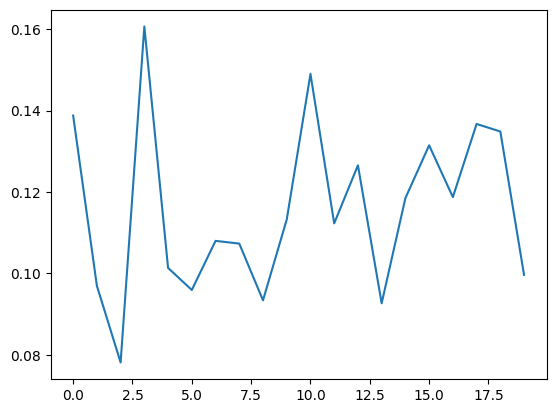

In [2]:
import matplotlib.pyplot as plt
plt.plot(evaluation_results)

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(evaluation_results)

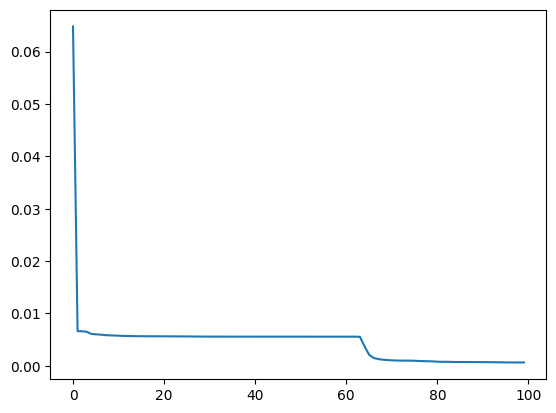

In [4]:
plt.plot(history.history['loss'])

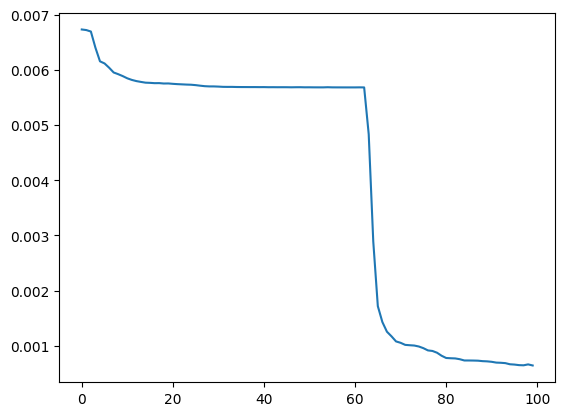

In [5]:
plt.plot(history.history['val_loss'])